In [1]:
# Imports
import os
import sys
import yaml
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.cuda.amp import GradScaler
from tqdm import tqdm
from pathlib import Path
from torch.utils.data import DataLoader

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.train import Trainer

In [2]:
class TrainingMonitor:
    """Utility class for monitoring and visualizing training progress."""
    
    @staticmethod
    def plot_training_history(trainer, save_path=None):
        """Plot training and validation metrics."""
        if not hasattr(trainer, 'train_losses') or not hasattr(trainer, 'val_losses'):
            print("No training history found to plot.")
            return
            
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
        
        # Plot losses
        ax1.plot(trainer.train_losses, label='Train Loss')
        ax1.plot(trainer.val_losses, label='Validation Loss')
        ax1.set_title('Training and Validation Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)
        
        # Plot accuracies if available
        if hasattr(trainer, 'train_accuracies'):
            ax2.plot(trainer.train_accuracies, label='Train Accuracy')
            ax2.plot(trainer.val_accuracies, label='Validation Accuracy')
            ax2.set_title('Training and Validation Accuracy')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Accuracy')
            ax2.legend()
            ax2.grid(True)
        
        plt.tight_layout()
        if save_path:
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

Initializing trainer...
Using device: cuda

Building model...


2025-08-27 06:37:29,491 - INFO - Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
2025-08-27 06:37:30,213 - INFO - [timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2025-08-27 06:37:30,819 - INFO - Model parameters: {'total': 16145476, 'trainable': 16145476, 'non_trainable': 0}



Preparing data...


2025-08-27 06:37:32,481 - INFO - Class distribution: {0: 84, 1: 35}
2025-08-27 06:37:32,483 - INFO - Using effective class weights: [0.5983625054359436, 1.4016374349594116]
2025-08-27 06:37:32,526 - INFO - Class distribution: {0: 84, 1: 35}
2025-08-27 06:37:32,527 - INFO - Using effective class weights: [0.5983625054359436, 1.4016374349594116]
2025-08-27 06:37:32,528 - INFO - 
2025-08-27 06:37:32,529 - INFO - DATASET SUMMARY
2025-08-27 06:37:32,530 - INFO - ==================================================
2025-08-27 06:37:32,531 - INFO - Total samples: 119
2025-08-27 06:37:32,532 - INFO - Class distribution:
2025-08-27 06:37:32,533 - INFO -   - Benign: 84 samples
2025-08-27 06:37:32,534 - INFO -   - Malignant: 35 samples
2025-08-27 06:37:32,541 - INFO - 
--------------------------------------------------
2025-08-27 06:37:32,542 - INFO - Training samples: 95
2025-08-27 06:37:32,543 - INFO - Validation samples: 24
2025-08-27 06:37:32,544 - INFO - ---------------------------------------


DataFrame loaded with columns: ['Image', 'Left', 'Right', 'Weight (Kg)', 'Height(cm)', 'Temp(°C)', 'Age(years)', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'left_label', 'right_label', 'label', 'combined_label']
Sample data:
     Image Left Right combined_label
0  IIR0001   PB     N         Benign
1  IIR0002    N    PB         Benign
2  IIR0003    N    PB         Benign
3  IIR0004   PB     N         Benign
4  IIR0005   PB     N         Benign

Creating datasets...

Processing 95 samples...


Processing:   0%|                                                                                                    | 0/95 [00:00<?, ?it/s]


Error processing IIR0100: single positional indexer is out-of-bounds


Processing:   3%|██▉                                                                                         | 3/95 [00:00<00:03, 28.09it/s]


Error processing IIR0117: single positional indexer is out-of-bounds


Processing:   6%|█████▊                                                                                      | 6/95 [00:00<00:03, 27.73it/s]


Error processing IIR0111: single positional indexer is out-of-bounds


Processing:   9%|████████▋                                                                                   | 9/95 [00:00<00:03, 27.73it/s]


Error processing IIR0119: single positional indexer is out-of-bounds


Processing:  13%|███████████▍                                                                               | 12/95 [00:00<00:02, 27.70it/s]


Error processing IIR0112: single positional indexer is out-of-bounds


Processing:  17%|███████████████▎                                                                           | 16/95 [00:00<00:02, 30.93it/s]


Error processing IIR0114: single positional indexer is out-of-bounds


Processing:  21%|███████████████████▏                                                                       | 20/95 [00:00<00:02, 32.55it/s]


Error processing IIR0102: single positional indexer is out-of-bounds

Error processing IIR0098: single positional indexer is out-of-bounds

Error processing IIR0099: single positional indexer is out-of-bounds


Processing:  25%|██████████████████████▉                                                                    | 24/95 [00:00<00:03, 21.12it/s]


Error processing IIR0096: single positional indexer is out-of-bounds


Processing:  47%|███████████████████████████████████████████                                                | 45/95 [00:01<00:00, 55.78it/s]


Error processing IIR0103: single positional indexer is out-of-bounds


Processing:  55%|█████████████████████████████████████████████████▊                                         | 52/95 [00:01<00:00, 57.03it/s]


Error processing IIR0101: single positional indexer is out-of-bounds


Processing:  62%|████████████████████████████████████████████████████████▌                                  | 59/95 [00:01<00:00, 57.94it/s]


Error processing IIR0105: single positional indexer is out-of-bounds


Processing:  69%|███████████████████████████████████████████████████████████████▏                           | 66/95 [00:01<00:00, 58.50it/s]


Error processing IIR0118: single positional indexer is out-of-bounds


Processing:  77%|█████████████████████████████████████████████████████████████████████▉                     | 73/95 [00:01<00:00, 58.97it/s]


Error processing IIR0115: single positional indexer is out-of-bounds


Processing:  84%|████████████████████████████████████████████████████████████████████████████▋              | 80/95 [00:01<00:00, 59.53it/s]


Error processing IIR0110: single positional indexer is out-of-bounds


Processing:  92%|███████████████████████████████████████████████████████████████████████████████████▎       | 87/95 [00:01<00:00, 59.79it/s]


Error processing IIR0116: single positional indexer is out-of-bounds

Error processing IIR0108: single positional indexer is out-of-bounds

Error processing IIR0104: single positional indexer is out-of-bounds


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:02<00:00, 44.73it/s]
2025-08-27 06:37:34,722 - INFO - Processed data saved successfully.
2025-08-27 06:37:34,725 - INFO - 
DATA LOADER CONFIGURATION:
2025-08-27 06:37:34,726 - INFO - Batch size: 4
2025-08-27 06:37:34,727 - INFO - Number of workers: 4
2025-08-27 06:37:34,728 - INFO - CUDA available: True
2025-08-27 06:37:34,729 - INFO - 
2025-08-27 06:37:34,730 - INFO - DATASET CREATION COMPLETE
2025-08-27 06:37:34,731 - INFO - ==================================================




Processing complete!
  - Processed: 76/95 samples
  - Errors: 19
  - Time taken: 2.13 seconds


Processed data saved to: /mnt/d/ML/Projects/Breast-Thermography/data/processed

Training samples: 95
Validation samples: 24

Initializing optimizer and scaler...

Starting training...


Epoch 1/100:   0%|                                                                                                   | 0/23 [00:00<?, ?it/s]2025-08-27 06:37:34,785 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:37:34,799 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:37:34,810 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:37:34,819 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/100:   4%|██▋                                                          | 1/23 [00:03<01:12,  3.31s/it, Loss=1.0259, Avg Loss=1.0259]2025-08-27 06:37:38,051 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:37:38,068 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:37:38,076 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:37:38,088 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 1/100:   9%|█████▎                                                       | 2/23 [00:03<00:30,  1.47s/it, Loss=0.9178, Avg Loss=0.9718]2025-08-27 06:37:38,239 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:37:38,250 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:37:38,271 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:37:38,281 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/100:  13%|███████▉                                                     | 3/23 [00:03<00:17,  1.16it/s, Loss=0.9242, Avg Loss=0.9560]2025-08-27 06:37:38,365 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:37:38,379 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:37:38,385 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:37:38,393 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 1/100:  17%|██████████▌                                                  | 4/23 [00:03<00:10,  1.77it/s, Loss=0.8595, Avg Loss=0.9318]2025-08-27 06:37:38,482 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:37:38,490 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:37:38,496 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:37:38,502 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 1/100:  17%|██████████▌                                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/100:  26%|███████████████▉                                             | 6/23 [00:03<00:05,  3.16it/s, Loss=0.8962, Avg Loss=0.9057]2025-08-27 06:37:38,670 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:37:38,678 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:37:38,683 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:37:38,690 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 1/100:  26%|███████████████▉                                             | 6/23 [00:04<00:05,  3.16it/s, Loss=0.4163, Avg Loss=0.8358]2025-08-27 06:37:38,754 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:37:38,760 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:37:38,765 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:37:38,776 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 1/100:  35%|█████████████████████▏                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/100:  39%|███████████████████████▊                                     | 9/23 [00:04<00:02,  5.15it/s, Loss=0.8698, Avg Loss=0.8379]2025-08-27 06:37:38,976 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:37:38,982 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:37:38,994 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:37:39,001 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 1/100:  43%|██████████████████████████                                  | 10/23 [00:04<00:02,  5.71it/s, Loss=1.3348, Avg Loss=0.8876]2025-08-27 06:37:39,082 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:37:39,089 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:37:39,096 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:37:39,105 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 1/100:  43%|██████████████████████████                    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/100:  52%|███████████████████████████████▎                            | 12/23 [00:04<00:01,  7.09it/s, Loss=0.4308, Avg Loss=0.8895]2025-08-27 06:37:39,269 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:37:39,277 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:37:39,284 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:37:39,292 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 1/100:  52%|███████████████████████████████▎                            | 12/23 [00:04<00:01,  7.09it/s, Loss=0.4602, Avg Loss=0.8564]2025-08-27 06:37:39,356 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:37:39,364 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:37:39,371 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:37:39,379 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 1/100:  61%|████████████████████████████████████▌         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/100:  61%|████████████████████████████████████▌                       | 14/23 [00:04<00:01,  8.19it/s, Loss=1.8241, Avg Loss=0.9178]2025-08-27 06:37:39,542 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:37:39,548 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:37:39,553 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:37:39,558 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 1/100:  70%|█████████████████████████████████████████▋                  | 16/23 [00:04<00:00,  8.99it/s, Loss=0.2882, Avg Loss=0.8785]2025-08-27 06:37:39,633 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:37:39,640 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:37:39,644 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:37:39,650 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 1/100:  70%|█████████████████████████████████████████▋    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/100:  78%|██████████████████████████████████████████████▉             | 18/23 [00:05<00:00,  9.40it/s, Loss=1.5293, Avg Loss=0.9475]2025-08-27 06:37:39,824 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:37:39,831 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:37:39,837 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:37:39,843 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 1/100:  78%|██████████████████████████████████████████████▉             | 18/23 [00:05<00:00,  9.40it/s, Loss=0.9199, Avg Loss=0.9460]2025-08-27 06:37:39,915 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:37:39,920 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:37:39,928 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:37:39,935 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 1/100:  87%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/100:  87%|████████████████████████████████████████████████████▏       | 20/23 [00:05<00:00,  9.92it/s, Loss=1.9918, Avg Loss=0.9890]2025-08-27 06:37:40,096 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:37:40,101 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:37:40,111 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:37:40,119 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 1/100:  96%|█████████████████████████████████████████████████████████▍  | 22/23 [00:05<00:00,  9.88it/s, Loss=1.3452, Avg Loss=1.0052]2025-08-27 06:37:40,206 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:37:40,211 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:37:40,219 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:37:40,227 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 1/100: 100%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:37:40,301 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:37:40,305 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:37:40,308 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:37:40,312 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:37:40,342 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:37:40,346 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:37:40,350 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:37:40,353 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:37:40,375 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:37:40,379 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:37:40,385 - WARNING - Pati

Epoch 1/100 - Train Loss: 0.9971, Train Acc: 69.57% - Val Loss: 0.9256, Val Acc: 70.83%


Epoch 2/100:   0%|                                                                                                   | 0/23 [00:00<?, ?it/s]2025-08-27 06:37:40,525 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:37:40,531 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:37:40,540 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:37:40,546 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 2/100:   0%|                                                                     | 0/23 [00:00<?, ?it/s, Loss=0.8501, Avg Loss=0.8501]2025-08-27 06:37:40,607 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:37:40,614 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:37:40,621 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:37:40,628 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 2/100:   9%|█████▎                                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:40,723 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:37:40,732 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:37:40,737 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/100:   9%|█████▎                                                       | 2/23 [00:00<00:01, 10.57it/s, Loss=1.2591, Avg Loss=0.9663]2025-08-27 06:37:40,798 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:37:40,805 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:37:40,812 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:37:40,815 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 2/100:  17%|██████████▌                                                  | 4/23 [00:00<00:01, 11.67it/s, Loss=1.1436, Avg Loss=1.0106]2025-08-27 06:37:40,876 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:37:40,883 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:37:40,890 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:37:40,898 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/100:  17%|██████████▌                                                  | 4/23 [00:00<00:01, 11.67it/s, Loss=1.1208, Avg Loss=1.0327]2025-08-27 06:37:41,000 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:37:41,006 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:37:41,012 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:37:41,020 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 2/100:  26%|███████████████▉                                             | 6/23 [00:00<00:01, 10.51it/s, Loss=0.7150, Avg Loss=0.9797]2025-08-27 06:37:41,085 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:37:41,094 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:37:41,103 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:37:41,115 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 2/100:  26%|███████████████▉                              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/100:  35%|█████████████████████▏                                       | 8/23 [00:00<00:01, 10.46it/s, Loss=0.6913, Avg Loss=0.9352]2025-08-27 06:37:41,282 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:37:41,287 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:37:41,295 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:37:41,299 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 2/100:  35%|█████████████████████▏                                       | 8/23 [00:00<00:01, 10.46it/s, Loss=1.0941, Avg Loss=0.9529]2025-08-27 06:37:41,364 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:37:41,371 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:37:41,379 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:37:41,384 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 2/100:  43%|██████████████████████████                    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/100:  43%|██████████████████████████                                  | 10/23 [00:01<00:01, 10.99it/s, Loss=0.6344, Avg Loss=0.9626]2025-08-27 06:37:41,530 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:37:41,536 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:37:41,541 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:37:41,547 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
Epoch 2/100:  52%|███████████████████████████████▎                            | 12/23 [00:01<00:00, 11.42it/s, Loss=0.6060, Avg Loss=0.9329]2025-08-27 06:37:41,606 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:37:41,617 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:37:41,627 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:37:41,633 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 2/100:  52%|███████████████████████████████▎              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/100:  61%|████████████████████████████████████▌                       | 14/23 [00:01<00:00, 11.06it/s, Loss=1.4406, Avg Loss=0.9434]2025-08-27 06:37:41,800 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:37:41,807 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:37:41,812 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:37:41,816 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 2/100:  61%|████████████████████████████████████▌                       | 14/23 [00:01<00:00, 11.06it/s, Loss=0.8149, Avg Loss=0.9348]2025-08-27 06:37:41,890 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:37:41,899 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:37:41,907 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:37:41,911 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 2/100:  70%|█████████████████████████████████████████▋    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/100:  70%|█████████████████████████████████████████▋                  | 16/23 [00:01<00:00, 10.99it/s, Loss=0.8459, Avg Loss=0.9065]2025-08-27 06:37:42,071 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:37:42,082 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:37:42,092 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:37:42,099 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 2/100:  78%|██████████████████████████████████████████████▉             | 18/23 [00:01<00:00, 10.67it/s, Loss=0.9107, Avg Loss=0.9068]2025-08-27 06:37:42,182 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:37:42,193 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:37:42,203 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:37:42,211 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 2/100:  78%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:42,308 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 2/100:  87%|████████████████████████████████████████████████████▏       | 20/23 [00:01<00:00, 10.62it/s, Loss=1.2659, Avg Loss=0.9183]2025-08-27 06:37:42,373 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:37:42,383 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:37:42,393 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:37:42,405 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 2/100:  87%|████████████████████████████████████████████████████▏       | 20/23 [00:01<00:00, 10.62it/s, Loss=1.3590, Avg Loss=0.9393]2025-08-27 06:37:42,468 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:37:42,478 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:37:42,490 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:37:42,500 - WARNING - Patient IIR0018 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/100:  96%|█████████████████████████████████████████████████████████▍  | 22/23 [00:02<00:00, 10.64it/s, Loss=1.2193, Avg Loss=0.9520]2025-08-27 06:37:42,560 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:37:42,572 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:37:42,582 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:37:42,591 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 2/100: 100%|████████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 10.83it/s, Loss=0.7884, Avg Loss=0.9449]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:37:42,652 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:37:42,658 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:37:42,661 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:37:42,665 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:37:42,684 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:37:42,688 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:37:42,691 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:37:42,694 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:37:42,719 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:37:42,723 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:37:42,726 - WARNING - Pati

Epoch 2/100 - Train Loss: 0.9449, Train Acc: 69.57% - Val Loss: 0.9083, Val Acc: 70.83%


Epoch 3/100:   0%|                                                                                                   | 0/23 [00:00<?, ?it/s]2025-08-27 06:37:42,846 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:37:42,852 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:37:42,858 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:37:42,863 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 3/100:   4%|██▋                                                          | 1/23 [00:00<00:02,  8.91it/s, Loss=1.1678, Avg Loss=1.1678]2025-08-27 06:37:42,958 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:37:42,965 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:37:42,971 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:37:42,979 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 3/100:   4%|██▋                                           

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:43,040 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:37:43,046 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:37:43,054 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:37:43,059 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  13%|███████▉                                                     | 3/23 [00:00<00:01, 10.99it/s, Loss=0.5276, Avg Loss=0.8437]2025-08-27 06:37:43,126 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:37:43,132 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:37:43,138 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:37:43,143 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 3/100:  13%|███████▉                                                     | 3/23 [00:00<00:01, 10.99it/s, Loss=1.1761, Avg Loss=0.9268]2025-08-27 06:37:43,204 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:37:43,209 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:37:43,215 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:37:43,219 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  22%|█████████████▎                                               | 5/23 [00:00<00:01, 11.91it/s, Loss=0.7846, Avg Loss=0.8984]2025-08-27 06:37:43,279 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:37:43,285 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:37:43,291 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:37:43,296 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  22%|█████████████▎                                               | 5/23 [00:00<00:01, 11.91it/s, Loss=1.4641, Avg Loss=0.9927]2025-08-27 06:37:43,364 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:37:43,372 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:37:43,379 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:37:43,385 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 3/100:  30%|██████████████████▌                                          | 7/23 [00:00<00:01, 11.89it/s, Loss=0.5284, Avg Loss=0.9264]2025-08-27 06:37:43,447 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:37:43,453 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:37:43,459 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:37:43,465 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  30%|██████████████████▌                                          | 7/23 [00:00<00:01, 11.89it/s, Loss=0.5364, Avg Loss=0.8776]2025-08-27 06:37:43,525 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:37:43,530 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:37:43,534 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:37:43,539 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  39%|███████████████████████▊                                     | 9/23 [00:00<00:01, 12.41it/s, Loss=0.5056, Avg Loss=0.8363]2025-08-27 06:37:43,596 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:37:43,602 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:37:43,609 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:37:43,614 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 3/100:  39%|███████████████████████▊                                     | 9/23 [00:00<00:01, 12.41it/s, Loss=0.4965, Avg Loss=0.8023]2025-08-27 06:37:43,674 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:37:43,681 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:37:43,686 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:37:43,694 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  48%|████████████████████████████▋                               | 11/23 [00:00<00:00, 12.61it/s, Loss=1.2189, Avg Loss=0.8402]2025-08-27 06:37:43,751 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:37:43,756 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:37:43,763 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:37:43,767 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  48%|████████████████████████████▋                               | 11/23 [00:00<00:00, 12.61it/s, Loss=1.8609, Avg Loss=0.9252]2025-08-27 06:37:43,828 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:37:43,834 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:37:43,839 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:37:43,845 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 3/100:  57%|█████████████████████████████████▉                          | 13/23 [00:01<00:00, 12.60it/s, Loss=0.8063, Avg Loss=0.9161]2025-08-27 06:37:43,910 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:37:43,917 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:37:43,922 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:37:43,926 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  57%|█████████████████████████████████▉                          | 13/23 [00:01<00:00, 12.60it/s, Loss=0.7991, Avg Loss=0.9077]2025-08-27 06:37:43,985 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:37:43,991 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:37:43,997 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:37:44,002 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  65%|███████████████████████████████████████▏                    | 15/23 [00:01<00:00, 12.64it/s, Loss=0.7687, Avg Loss=0.8985]2025-08-27 06:37:44,067 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:37:44,072 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:37:44,077 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:37:44,083 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 3/100:  65%|███████████████████████████████████████▏                    | 15/23 [00:01<00:00, 12.64it/s, Loss=0.9404, Avg Loss=0.9011]2025-08-27 06:37:44,154 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:37:44,160 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:37:44,164 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:37:44,169 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  74%|████████████████████████████████████████████▎               | 17/23 [00:01<00:00, 12.42it/s, Loss=0.3714, Avg Loss=0.8699]2025-08-27 06:37:44,236 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:37:44,242 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:37:44,247 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:37:44,253 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  74%|████████████████████████████████████████████▎               | 17/23 [00:01<00:00, 12.42it/s, Loss=1.3157, Avg Loss=0.8947]2025-08-27 06:37:44,318 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:37:44,325 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:37:44,329 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:37:44,334 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 3/100:  83%|█████████████████████████████████████████████████▌          | 19/23 [00:01<00:00, 12.54it/s, Loss=0.7426, Avg Loss=0.8867]2025-08-27 06:37:44,393 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:37:44,400 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:37:44,406 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:37:44,414 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  83%|█████████████████████████████████████████████████▌          | 19/23 [00:01<00:00, 12.54it/s, Loss=1.1831, Avg Loss=0.9015]2025-08-27 06:37:44,472 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:37:44,480 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:37:44,485 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:37:44,491 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/100:  91%|██████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.60it/s, Loss=1.3538, Avg Loss=0.9230]2025-08-27 06:37:44,549 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:37:44,554 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:37:44,562 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:37:44,568 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 3/100:  91%|██████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.60it/s, Loss=1.2264, Avg Loss=0.9368]2025-08-27 06:37:44,656 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:37:44,661 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:37:44,666 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:37:44,674 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:37:44,786 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:37:44,790 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:37:44,793 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:37:44,796 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:37:44,812 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:37:44,816 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:37:44,819 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:37:44,823 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:37:44,841 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:37:44,845 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:37:44,848 - WARNING - Pati

Epoch 3/100 - Train Loss: 0.9292, Train Acc: 69.57% - Val Loss: 0.9139, Val Acc: 70.83%


Epoch 4/100:   0%|                                                                                                   | 0/23 [00:00<?, ?it/s]2025-08-27 06:37:44,980 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:37:44,987 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:37:44,992 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:37:44,995 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 4/100:   0%|                                                                     | 0/23 [00:00<?, ?it/s, Loss=0.5089, Avg Loss=0.5089]2025-08-27 06:37:45,052 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:37:45,056 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:37:45,061 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:37:45,066 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 4/100:   9%|█████▎                                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 4/100:   9%|█████▎                                                       | 2/23 [00:00<00:01, 13.40it/s, Loss=1.0342, Avg Loss=0.8125]2025-08-27 06:37:45,205 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:37:45,211 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:37:45,218 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:37:45,222 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 4/100:  17%|██████████▌                                                  | 4/23 [00:00<00:01, 13.19it/s, Loss=1.2742, Avg Loss=0.9279]2025-08-27 06:37:45,282 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:37:45,288 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:37:45,293 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:37:45,299 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 4/100:  17%|██████████▌                                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 4/100:  26%|███████████████▉                                             | 6/23 [00:00<00:01, 12.46it/s, Loss=1.4594, Avg Loss=0.9900]2025-08-27 06:37:45,454 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:37:45,460 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:37:45,466 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:37:45,473 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 4/100:  26%|███████████████▉                                             | 6/23 [00:00<00:01, 12.46it/s, Loss=0.5662, Avg Loss=0.9294]2025-08-27 06:37:45,543 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:37:45,550 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:37:45,557 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:37:45,564 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 4/100:  35%|█████████████████████▏                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 4/100:  35%|█████████████████████▏                                       | 8/23 [00:00<00:01, 11.37it/s, Loss=1.1093, Avg Loss=0.9102]2025-08-27 06:37:45,741 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:37:45,745 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:37:45,749 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:37:45,753 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 4/100:  43%|██████████████████████████                                  | 10/23 [00:00<00:01, 11.84it/s, Loss=0.8307, Avg Loss=0.9023]2025-08-27 06:37:45,809 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:37:45,814 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:37:45,821 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:37:45,826 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 4/100:  43%|██████████████████████████                    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:45,958 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:37:45,965 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:37:45,970 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:37:45,978 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 4/100:  52%|███████████████████████████████▎                            | 12/23 [00:01<00:00, 12.44it/s, Loss=1.2861, Avg Loss=0.9471]2025-08-27 06:37:46,036 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:37:46,041 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:37:46,045 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:37:46,050 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 4/100:  61%|████████████████████████████████████▌                       | 14/23 [00:01<00:00, 12.68it/s, Loss=0.8974, Avg Loss=0.9436]2025-08-27 06:37:46,108 - WARNING - Patient IIR0050 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:46,187 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:37:46,193 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:37:46,199 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:37:46,205 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 4/100:  70%|█████████████████████████████████████████▋                  | 16/23 [00:01<00:00, 12.69it/s, Loss=0.9928, Avg Loss=0.9585]2025-08-27 06:37:46,266 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:37:46,271 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:37:46,275 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:37:46,280 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 4/100:  70%|█████████████████████████████████████████▋                  | 16/23 [00:01<00:00, 12.69it/s, Loss=1.1462, Avg Loss=0.9696]2025-08-27 06:37:46,336 - WARNING - Patient IIR0115 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:46,417 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:37:46,430 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:37:46,438 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 4/100:  78%|██████████████████████████████████████████████▉             | 18/23 [00:01<00:00, 13.11it/s, Loss=0.9041, Avg Loss=0.9443]2025-08-27 06:37:46,494 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:37:46,501 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:37:46,505 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:37:46,510 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 4/100:  87%|████████████████████████████████████████████████████▏       | 20/23 [00:01<00:00, 12.87it/s, Loss=1.0978, Avg Loss=0.9520]2025-08-27 06:37:46,567 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:37:46,573 - WARNING - Patient IIR0011 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 4/100:  87%|████████████████████████████████████████████████████▏       | 20/23 [00:01<00:00, 12.87it/s, Loss=0.6394, Avg Loss=0.9371]2025-08-27 06:37:46,668 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:37:46,674 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:37:46,681 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:37:46,687 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 4/100:  96%|█████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.36it/s, Loss=1.4149, Avg Loss=0.9588]2025-08-27 06:37:46,743 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:37:46,749 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:37:46,752 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:37:46,757 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 4/100: 100%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:37:46,826 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:37:46,830 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:37:46,833 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:37:46,836 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:37:46,854 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:37:46,857 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:37:46,860 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:37:46,864 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:37:46,886 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:37:46,889 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:37:46,892 - WARNING - Pati

Epoch 4/100 - Train Loss: 0.9438, Train Acc: 69.57% - Val Loss: 0.9093, Val Acc: 70.83%


Epoch 5/100:   0%|                                                                                                   | 0/23 [00:00<?, ?it/s]2025-08-27 06:37:47,023 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:37:47,030 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:37:47,037 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:37:47,040 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 5/100:   0%|                                                                     | 0/23 [00:00<?, ?it/s, Loss=0.8370, Avg Loss=0.8370]2025-08-27 06:37:47,111 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:37:47,121 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:37:47,127 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:37:47,135 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 5/100:   9%|█████▎                                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/100:   9%|█████▎                                                       | 2/23 [00:00<00:01, 11.53it/s, Loss=0.8494, Avg Loss=1.0533]2025-08-27 06:37:47,273 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:37:47,278 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:37:47,284 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:37:47,288 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 5/100:  17%|██████████▌                                                  | 4/23 [00:00<00:01, 12.21it/s, Loss=0.8590, Avg Loss=1.0047]2025-08-27 06:37:47,353 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:37:47,359 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:37:47,363 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:37:47,368 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 5/100:  17%|██████████▌                                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/100:  26%|███████████████▉                                             | 6/23 [00:00<00:01, 11.72it/s, Loss=0.7498, Avg Loss=0.8779]2025-08-27 06:37:47,531 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:37:47,536 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:37:47,540 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:37:47,544 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 5/100:  26%|███████████████▉                                             | 6/23 [00:00<00:01, 11.72it/s, Loss=0.4459, Avg Loss=0.8162]2025-08-27 06:37:47,602 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:37:47,607 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:37:47,614 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:37:47,617 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 5/100:  35%|█████████████████████▏                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:47,749 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:37:47,755 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:37:47,764 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:37:47,771 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 5/100:  43%|██████████████████████████                                  | 10/23 [00:00<00:01, 12.53it/s, Loss=1.9120, Avg Loss=0.8926]2025-08-27 06:37:47,835 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:37:47,843 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:37:47,847 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:37:47,853 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 5/100:  43%|██████████████████████████                                  | 10/23 [00:00<00:01, 12.53it/s, Loss=0.8649, Avg Loss=0.8901]2025-08-27 06:37:47,908 - WARNING - Patient IIR0001 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/100:  52%|███████████████████████████████▎                            | 12/23 [00:01<00:00, 11.70it/s, Loss=0.8496, Avg Loss=0.8867]2025-08-27 06:37:48,026 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:37:48,033 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:37:48,037 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:37:48,046 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 5/100:  52%|███████████████████████████████▎                            | 12/23 [00:01<00:00, 11.70it/s, Loss=0.8413, Avg Loss=0.8832]2025-08-27 06:37:48,119 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:37:48,124 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:37:48,130 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:37:48,139 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 5/100:  61%|████████████████████████████████████▌         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/100:  61%|████████████████████████████████████▌                       | 14/23 [00:01<00:00, 11.28it/s, Loss=0.3416, Avg Loss=0.8416]2025-08-27 06:37:48,297 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:37:48,302 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:37:48,306 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:37:48,311 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 5/100:  70%|█████████████████████████████████████████▋                  | 16/23 [00:01<00:00, 11.85it/s, Loss=0.3696, Avg Loss=0.8121]2025-08-27 06:37:48,371 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:37:48,374 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:37:48,380 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:37:48,387 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 5/100:  70%|█████████████████████████████████████████▋    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/100:  78%|██████████████████████████████████████████████▉             | 18/23 [00:01<00:00, 11.58it/s, Loss=1.4695, Avg Loss=0.8819]2025-08-27 06:37:48,548 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:37:48,553 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:37:48,559 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:37:48,566 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 5/100:  78%|██████████████████████████████████████████████▉             | 18/23 [00:01<00:00, 11.58it/s, Loss=0.8792, Avg Loss=0.8817]2025-08-27 06:37:48,623 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:37:48,629 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:37:48,632 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:37:48,637 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 5/100:  87%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/100:  87%|████████████████████████████████████████████████████▏       | 20/23 [00:01<00:00, 11.29it/s, Loss=0.8095, Avg Loss=0.8814]2025-08-27 06:37:48,813 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:37:48,822 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:37:48,830 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:37:48,835 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 5/100:  96%|█████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.50it/s, Loss=1.4389, Avg Loss=0.9068]2025-08-27 06:37:48,903 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:37:48,908 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:37:48,915 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:37:48,922 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 5/100: 100%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:37:48,983 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:37:48,987 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:37:48,990 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:37:48,993 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:37:49,011 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:37:49,016 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:37:49,019 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:37:49,023 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:37:49,042 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:37:49,046 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:37:49,050 - WARNING - Pati

Epoch 5/100 - Train Loss: 0.9241, Train Acc: 71.74% - Val Loss: 0.9374, Val Acc: 70.83%


Epoch 6/100:   0%|                                                                                                   | 0/23 [00:00<?, ?it/s]2025-08-27 06:37:49,168 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:37:49,173 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:37:49,179 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:37:49,185 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 6/100:   0%|                                                                     | 0/23 [00:00<?, ?it/s, Loss=1.3146, Avg Loss=1.3146]2025-08-27 06:37:49,250 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:37:49,256 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:37:49,263 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:37:49,268 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 6/100:   9%|█████▎                                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/100:   9%|█████▎                                                       | 2/23 [00:00<00:01, 12.29it/s, Loss=0.8367, Avg Loss=1.0014]2025-08-27 06:37:49,418 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:37:49,426 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:37:49,431 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:37:49,438 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 6/100:  17%|██████████▌                                                  | 4/23 [00:00<00:01, 11.61it/s, Loss=1.1472, Avg Loss=1.0379]2025-08-27 06:37:49,509 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:37:49,516 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:37:49,521 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:37:49,525 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 6/100:  17%|██████████▌                                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/100:  26%|███████████████▉                                             | 6/23 [00:00<00:01, 12.44it/s, Loss=0.7229, Avg Loss=0.8969]2025-08-27 06:37:49,655 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:37:49,660 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:37:49,665 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:37:49,670 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 6/100:  26%|███████████████▉                                             | 6/23 [00:00<00:01, 12.44it/s, Loss=0.4939, Avg Loss=0.8394]2025-08-27 06:37:49,726 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:37:49,733 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:37:49,739 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:37:49,745 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 6/100:  35%|█████████████████████▏                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/100:  35%|█████████████████████▏                                       | 8/23 [00:00<00:01, 12.81it/s, Loss=1.2010, Avg Loss=0.8366]2025-08-27 06:37:49,895 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:37:49,903 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:37:49,910 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:37:49,918 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 6/100:  43%|██████████████████████████                                  | 10/23 [00:00<00:01, 12.30it/s, Loss=1.2920, Avg Loss=0.8822]2025-08-27 06:37:49,978 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:37:49,984 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:37:49,991 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:37:49,996 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 6/100:  43%|██████████████████████████                    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/100:  52%|███████████████████████████████▎                            | 12/23 [00:00<00:00, 12.56it/s, Loss=0.8165, Avg Loss=0.8405]2025-08-27 06:37:50,132 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:37:50,138 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:37:50,144 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:37:50,149 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 6/100:  52%|███████████████████████████████▎                            | 12/23 [00:01<00:00, 12.56it/s, Loss=0.4570, Avg Loss=0.8110]2025-08-27 06:37:50,226 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:37:50,230 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:37:50,234 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:37:50,239 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 6/100:  61%|████████████████████████████████████▌         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:50,357 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 6/100:  61%|████████████████████████████████████▌                       | 14/23 [00:01<00:00, 11.36it/s, Loss=0.8384, Avg Loss=0.7850]2025-08-27 06:37:50,443 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:37:50,448 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:37:50,453 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:37:50,458 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 6/100:  70%|█████████████████████████████████████████▋                  | 16/23 [00:01<00:00, 11.39it/s, Loss=0.8738, Avg Loss=0.7905]2025-08-27 06:37:50,519 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:37:50,524 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:37:50,530 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:37:50,535 - WARNING - Patient IIR0027 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/100:  70%|█████████████████████████████████████████▋                  | 16/23 [00:01<00:00, 11.39it/s, Loss=0.7751, Avg Loss=0.7896]2025-08-27 06:37:50,590 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:37:50,595 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:37:50,602 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:37:50,608 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 6/100:  78%|██████████████████████████████████████████████▉             | 18/23 [00:01<00:00, 11.68it/s, Loss=0.9194, Avg Loss=0.7968]2025-08-27 06:37:50,681 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:37:50,688 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:37:50,694 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:37:50,699 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 6/100:  78%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/100:  87%|████████████████████████████████████████████████████▏       | 20/23 [00:01<00:00, 11.50it/s, Loss=1.3625, Avg Loss=0.8888]2025-08-27 06:37:50,860 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:37:50,867 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:37:50,875 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:37:50,881 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 6/100:  87%|████████████████████████████████████████████████████▏       | 20/23 [00:01<00:00, 11.50it/s, Loss=1.3413, Avg Loss=0.9103]2025-08-27 06:37:50,951 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:37:50,956 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:37:50,963 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:37:50,969 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 6/100:  96%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:37:51,115 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:37:51,118 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:37:51,121 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:37:51,125 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:37:51,143 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:37:51,147 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:37:51,150 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:37:51,153 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:37:51,174 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:37:51,177 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:37:51,181 - WARNING - Pati

Epoch 6/100 - Train Loss: 0.9408, Train Acc: 70.65% - Val Loss: 0.9316, Val Acc: 70.83%


Epoch 7/100:   0%|                                                                                                   | 0/23 [00:00<?, ?it/s]2025-08-27 06:37:51,350 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:37:51,357 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:37:51,364 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:37:51,371 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 7/100:   0%|                                                                     | 0/23 [00:00<?, ?it/s, Loss=1.2022, Avg Loss=1.2022]2025-08-27 06:37:51,442 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:37:51,450 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:37:51,455 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:37:51,460 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/100:   9%|█████▎                                                       | 2/23 [00:00<00:02,  9.29it/s, Loss=0.9718, Avg Loss=1.0870]2025-08-27 06:37:51,564 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:37:51,570 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:37:51,578 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:37:51,584 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 7/100:   9%|█████▎                                                       | 2/23 [00:00<00:02,  9.29it/s, Loss=1.4288, Avg Loss=1.2009]2025-08-27 06:37:51,651 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:37:51,659 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:37:51,665 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:37:51,671 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 7/100:  17%|██████████▌                                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/100:  17%|██████████▌                                                  | 4/23 [00:00<00:01, 10.53it/s, Loss=1.1008, Avg Loss=1.1219]2025-08-27 06:37:51,814 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:37:51,819 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:37:51,825 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:37:51,829 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 7/100:  26%|███████████████▉                                             | 6/23 [00:00<00:01, 10.95it/s, Loss=0.6949, Avg Loss=1.0507]2025-08-27 06:37:51,908 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:37:51,914 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:37:51,918 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:37:51,924 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 7/100:  26%|███████████████▉                              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/100:  35%|█████████████████████▏                                       | 8/23 [00:00<00:01, 11.26it/s, Loss=0.8947, Avg Loss=1.0103]2025-08-27 06:37:52,078 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:37:52,084 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:37:52,089 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:37:52,096 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 7/100:  35%|█████████████████████▏                                       | 8/23 [00:00<00:01, 11.26it/s, Loss=1.1230, Avg Loss=1.0228]2025-08-27 06:37:52,155 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:37:52,161 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:37:52,166 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:37:52,170 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 7/100:  43%|██████████████████████████                    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/100:  43%|██████████████████████████                                  | 10/23 [00:00<00:01, 11.63it/s, Loss=0.8009, Avg Loss=0.9583]2025-08-27 06:37:52,312 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:37:52,319 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:37:52,324 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:37:52,330 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 7/100:  52%|███████████████████████████████▎                            | 12/23 [00:01<00:00, 12.27it/s, Loss=0.9348, Avg Loss=0.9563]2025-08-27 06:37:52,386 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:37:52,394 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:37:52,401 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:37:52,405 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 7/100:  52%|███████████████████████████████▎              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:52,541 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:37:52,545 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:37:52,550 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 7/100:  61%|████████████████████████████████████▌                       | 14/23 [00:01<00:00, 12.65it/s, Loss=0.7857, Avg Loss=0.9452]2025-08-27 06:37:52,604 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:37:52,609 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:37:52,613 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:37:52,618 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 7/100:  70%|█████████████████████████████████████████▋                  | 16/23 [00:01<00:00, 13.15it/s, Loss=1.4948, Avg Loss=0.9795]2025-08-27 06:37:52,673 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:37:52,680 - WARNING - Patient IIR0044 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:52,760 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:37:52,766 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:37:52,770 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:37:52,775 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 7/100:  78%|██████████████████████████████████████████████▉             | 18/23 [00:01<00:00, 13.02it/s, Loss=0.5840, Avg Loss=0.9820]2025-08-27 06:37:52,829 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:37:52,835 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:37:52,842 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:37:52,846 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 7/100:  78%|██████████████████████████████████████████████▉             | 18/23 [00:01<00:00, 13.02it/s, Loss=0.5630, Avg Loss=0.9600]2025-08-27 06:37:52,906 - WARNING - Patient IIR0069 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:52,981 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:37:52,988 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 7/100:  87%|████████████████████████████████████████████████████▏       | 20/23 [00:01<00:00, 13.28it/s, Loss=0.5278, Avg Loss=0.9312]2025-08-27 06:37:53,043 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:37:53,048 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:37:53,053 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:37:53,061 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 7/100:  96%|█████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 13.19it/s, Loss=0.7159, Avg Loss=0.9214]2025-08-27 06:37:53,131 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:37:53,139 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:37:53,158 - WARNING - Patient IIR0050 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:37:53,238 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:37:53,242 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:37:53,245 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:37:53,249 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:37:53,267 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:37:53,270 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:37:53,272 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:37:53,275 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:37:53,292 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:37:53,296 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:37:53,299 - WARNING - Pati

Epoch 7/100 - Train Loss: 0.9366, Train Acc: 69.57% - Val Loss: 0.9333, Val Acc: 70.83%


Epoch 8/100:   0%|                                                                                                   | 0/23 [00:00<?, ?it/s]2025-08-27 06:37:53,435 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:37:53,440 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:37:53,445 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:37:53,449 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 8/100:   0%|                                                                     | 0/23 [00:00<?, ?it/s, Loss=0.3983, Avg Loss=0.3983]2025-08-27 06:37:53,508 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:37:53,513 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:37:53,520 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:37:53,525 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 8/100:   9%|█████▎                                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/100:   9%|█████▎                                                       | 2/23 [00:00<00:01, 13.30it/s, Loss=0.9284, Avg Loss=0.7129]2025-08-27 06:37:53,659 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:37:53,665 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:37:53,669 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:37:53,673 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
Epoch 8/100:  17%|██████████▌                                                  | 4/23 [00:00<00:01, 13.55it/s, Loss=0.3278, Avg Loss=0.6167]2025-08-27 06:37:53,728 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:37:53,734 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:37:53,741 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:37:53,746 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 8/100:  17%|██████████▌                                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/100:  26%|███████████████▉                                             | 6/23 [00:00<00:01, 13.30it/s, Loss=0.8008, Avg Loss=0.5984]2025-08-27 06:37:53,883 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:37:53,890 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:37:53,896 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:37:53,904 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 8/100:  26%|███████████████▉                                             | 6/23 [00:00<00:01, 13.30it/s, Loss=0.7958, Avg Loss=0.6266]2025-08-27 06:37:53,974 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:37:53,979 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:37:53,984 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:37:53,988 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 8/100:  35%|█████████████████████▏                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/100:  35%|█████████████████████▏                                       | 8/23 [00:00<00:01, 12.76it/s, Loss=0.9081, Avg Loss=0.6878]2025-08-27 06:37:54,126 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:37:54,134 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:37:54,142 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:37:54,149 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 8/100:  43%|██████████████████████████                                  | 10/23 [00:00<00:00, 13.04it/s, Loss=2.4869, Avg Loss=0.8677]2025-08-27 06:37:54,197 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:37:54,203 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:37:54,213 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:37:54,220 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 8/100:  43%|██████████████████████████                    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/100:  52%|███████████████████████████████▎                            | 12/23 [00:00<00:00, 11.26it/s, Loss=0.2802, Avg Loss=0.8759]2025-08-27 06:37:54,421 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:37:54,434 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:37:54,447 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:37:54,452 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 8/100:  52%|███████████████████████████████▎                            | 12/23 [00:01<00:00, 11.26it/s, Loss=1.5421, Avg Loss=0.9271]2025-08-27 06:37:54,505 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:37:54,510 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:37:54,516 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:37:54,521 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 8/100:  61%|████████████████████████████████████▌         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/100:  61%|████████████████████████████████████▌                       | 14/23 [00:01<00:00, 11.65it/s, Loss=1.6913, Avg Loss=1.0160]2025-08-27 06:37:54,665 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:37:54,673 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:37:54,683 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:37:54,689 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 8/100:  70%|█████████████████████████████████████████▋                  | 16/23 [00:01<00:00, 11.39it/s, Loss=0.2496, Avg Loss=0.9681]2025-08-27 06:37:54,767 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:37:54,775 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:37:54,782 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:37:54,790 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 8/100:  70%|█████████████████████████████████████████▋    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/100:  78%|██████████████████████████████████████████████▉             | 18/23 [00:01<00:00, 11.04it/s, Loss=0.3069, Avg Loss=1.0003]2025-08-27 06:37:54,957 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:37:54,983 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:37:55,000 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:37:55,017 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 8/100:  78%|██████████████████████████████████████████████▉             | 18/23 [00:01<00:00, 11.04it/s, Loss=0.8092, Avg Loss=0.9902]2025-08-27 06:37:55,090 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:37:55,098 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:37:55,107 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:37:55,113 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 8/100:  87%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/100:  87%|████████████████████████████████████████████████████▏       | 20/23 [00:01<00:00, 10.32it/s, Loss=1.4384, Avg Loss=1.0058]2025-08-27 06:37:55,260 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:37:55,267 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:37:55,273 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:37:55,277 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 8/100:  96%|█████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.08it/s, Loss=2.1150, Avg Loss=1.0562]2025-08-27 06:37:55,332 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:37:55,338 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:37:55,342 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:37:55,346 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 8/100: 100%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:37:55,401 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:37:55,404 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:37:55,408 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:37:55,411 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:37:55,444 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:37:55,447 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:37:55,451 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:37:55,455 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:37:55,474 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:37:55,477 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:37:55,480 - WARNING - Pati

Epoch 8/100 - Train Loss: 1.0431, Train Acc: 69.57% - Val Loss: 0.9516, Val Acc: 70.83%


Epoch 9/100:   0%|                                                                                                   | 0/23 [00:00<?, ?it/s]2025-08-27 06:37:55,624 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:37:55,632 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:37:55,638 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:37:55,643 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 9/100:   4%|██▋                                                          | 1/23 [00:00<00:02,  8.99it/s, Loss=0.8337, Avg Loss=0.8337]2025-08-27 06:37:55,738 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:37:55,745 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:37:55,758 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:37:55,767 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/100:   9%|█████▎                                                       | 2/23 [00:00<00:02,  9.22it/s, Loss=1.2912, Avg Loss=1.0624]2025-08-27 06:37:55,840 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:37:55,847 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:37:55,853 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:37:55,861 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 9/100:   9%|█████▎                                                       | 2/23 [00:00<00:02,  9.22it/s, Loss=0.8178, Avg Loss=0.9809]2025-08-27 06:37:55,922 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:37:55,929 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:37:55,938 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:37:55,944 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 9/100:  17%|██████████▌                                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/100:  17%|██████████▌                                                  | 4/23 [00:00<00:01, 10.82it/s, Loss=1.7439, Avg Loss=1.0211]2025-08-27 06:37:56,096 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:37:56,103 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:37:56,110 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:37:56,117 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 9/100:  26%|███████████████▉                                             | 6/23 [00:00<00:01, 11.28it/s, Loss=1.2871, Avg Loss=1.0654]2025-08-27 06:37:56,178 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:37:56,184 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:37:56,190 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:37:56,196 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 9/100:  26%|███████████████▉                              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/100:  35%|█████████████████████▏                                       | 8/23 [00:00<00:01, 10.47it/s, Loss=1.3379, Avg Loss=1.0630]2025-08-27 06:37:56,395 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:37:56,404 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:37:56,423 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:37:56,437 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/100:  35%|█████████████████████▏                                       | 8/23 [00:00<00:01, 10.47it/s, Loss=1.0980, Avg Loss=1.0669]2025-08-27 06:37:56,570 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:37:56,583 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:37:56,627 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:37:56,670 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 9/100:  43%|██████████████████████████                                  | 10/23 [00:01<00:01,  7.73it/s, Loss=0.8475, Avg Loss=1.0449]2025-08-27 06:37:56,763 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:37:56,773 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:37:56,782 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:37:56,789 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 9/100:  43%|██████████████████████████                    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/100:  52%|███████████████████████████████▎                            | 12/23 [00:01<00:01,  8.69it/s, Loss=0.4934, Avg Loss=0.9769]2025-08-27 06:37:56,938 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:37:56,944 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:37:56,951 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:37:56,959 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 9/100:  57%|█████████████████████████████████▉                          | 13/23 [00:01<00:01,  8.88it/s, Loss=0.5501, Avg Loss=0.9441]2025-08-27 06:37:57,040 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:37:57,046 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:37:57,057 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:37:57,063 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 9/100:  57%|█████████████████████████████████▉            

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/100:  65%|███████████████████████████████████████▏                    | 15/23 [00:01<00:00,  9.51it/s, Loss=0.5242, Avg Loss=0.9120]2025-08-27 06:37:57,225 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:37:57,234 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:37:57,241 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:37:57,249 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 9/100:  65%|███████████████████████████████████████▏                    | 15/23 [00:01<00:00,  9.51it/s, Loss=0.8017, Avg Loss=0.9051]2025-08-27 06:37:57,310 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:37:57,316 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:37:57,324 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:37:57,331 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 9/100:  74%|████████████████████████████████████████████▎ 

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/100:  74%|████████████████████████████████████████████▎               | 17/23 [00:01<00:00, 10.32it/s, Loss=1.3495, Avg Loss=0.9256]2025-08-27 06:37:57,477 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:37:57,482 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:37:57,489 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:37:57,493 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 9/100:  83%|█████████████████████████████████████████████████▌          | 19/23 [00:01<00:00, 10.66it/s, Loss=0.9776, Avg Loss=0.9284]2025-08-27 06:37:57,561 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:37:57,567 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:37:57,572 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:37:57,580 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 9/100:  83%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/100:  91%|██████████████████████████████████████████████████████▊     | 21/23 [00:02<00:00, 11.41it/s, Loss=0.7155, Avg Loss=0.9322]2025-08-27 06:37:57,710 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:37:57,714 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:37:57,720 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:37:57,726 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 9/100:  91%|██████████████████████████████████████████████████████▊     | 21/23 [00:02<00:00, 11.41it/s, Loss=0.7858, Avg Loss=0.9255]2025-08-27 06:37:57,787 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:37:57,793 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:37:57,797 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:37:57,802 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 9/100: 100%|██████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:37:57,863 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:37:57,867 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:37:57,870 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:37:57,873 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:37:57,890 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:37:57,893 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:37:57,897 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:37:57,900 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:37:57,919 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:37:57,922 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:37:57,925 - WARNING - Pati

Epoch 9/100 - Train Loss: 0.9216, Train Acc: 70.65% - Val Loss: 0.9190, Val Acc: 70.83%


Epoch 10/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:37:58,056 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:37:58,064 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:37:58,071 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:37:58,077 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 10/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.1849, Avg Loss=1.1849]2025-08-27 06:37:58,137 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:37:58,144 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:37:58,149 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:37:58,154 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 10/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.48it/s, Loss=0.4882, Avg Loss=0.7104]2025-08-27 06:37:58,294 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:37:58,298 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:37:58,307 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:37:58,313 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 10/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.22it/s, Loss=1.1020, Avg Loss=0.8083]2025-08-27 06:37:58,380 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:37:58,387 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:37:58,394 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:37:58,400 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 10/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.90it/s, Loss=0.7424, Avg Loss=0.8802]2025-08-27 06:37:58,556 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:37:58,561 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:37:58,568 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:37:58,571 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 10/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.90it/s, Loss=0.5288, Avg Loss=0.8300]2025-08-27 06:37:58,648 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:37:58,652 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:37:58,659 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:37:58,664 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 10/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.97it/s, Loss=0.8073, Avg Loss=0.8788]2025-08-27 06:37:58,810 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:37:58,815 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:37:58,822 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:37:58,828 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 10/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.88it/s, Loss=1.1540, Avg Loss=0.9063]2025-08-27 06:37:58,892 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:37:58,899 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:37:58,906 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:37:58,911 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 10/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.18it/s, Loss=0.7123, Avg Loss=0.9373]2025-08-27 06:37:59,046 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:37:59,052 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:37:59,058 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:37:59,064 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 10/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.18it/s, Loss=1.0954, Avg Loss=0.9494]2025-08-27 06:37:59,119 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:37:59,124 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:37:59,130 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:37:59,135 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 10/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.26it/s, Loss=0.9904, Avg Loss=0.9279]2025-08-27 06:37:59,299 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:37:59,304 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:37:59,308 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:37:59,316 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 10/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.40it/s, Loss=0.6812, Avg Loss=0.9125]2025-08-27 06:37:59,409 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:37:59,414 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:37:59,422 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:37:59,429 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 10/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.73it/s, Loss=1.0912, Avg Loss=0.9116]2025-08-27 06:37:59,572 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:37:59,578 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:37:59,583 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:37:59,590 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 10/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.73it/s, Loss=0.6310, Avg Loss=0.8968]2025-08-27 06:37:59,648 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:37:59,653 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:37:59,659 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:37:59,663 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 10/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:37:59,798 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:37:59,804 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:37:59,812 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 10/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.57it/s, Loss=0.6133, Avg Loss=0.8998]2025-08-27 06:37:59,870 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:37:59,877 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:37:59,882 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:37:59,887 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 10/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 12.10it/s, Loss=0.9615, Avg Loss=0.9025]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:37:59,959 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:37:59,963 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:37:59,968 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:37:59,972 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:00,001 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:00,005 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:00,008 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:00,012 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:00,035 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:00,039 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:00,043 - WARNING - Pati

Epoch 10/100 - Train Loss: 0.9025, Train Acc: 69.57% - Val Loss: 0.9360, Val Acc: 70.83%


Epoch 11/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:00,169 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:00,176 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:00,185 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:00,191 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 11/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.8787, Avg Loss=0.8787]2025-08-27 06:38:00,249 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:00,257 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:00,263 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:00,271 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 11/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.45it/s, Loss=0.5178, Avg Loss=1.1141]2025-08-27 06:38:00,404 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:00,412 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:00,418 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:00,427 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 11/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.21it/s, Loss=0.6888, Avg Loss=1.0078]2025-08-27 06:38:00,496 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:00,502 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:00,505 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:00,512 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 11/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.36it/s, Loss=1.1657, Avg Loss=0.9477]2025-08-27 06:38:00,689 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:00,695 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:00,702 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:00,712 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 11/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.36it/s, Loss=1.5663, Avg Loss=1.0361]2025-08-27 06:38:00,788 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:00,794 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:00,803 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:00,813 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 11/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.18it/s, Loss=0.6423, Avg Loss=1.0206]2025-08-27 06:38:00,959 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:00,964 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:00,969 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:00,974 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 11/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.24it/s, Loss=0.5210, Avg Loss=0.9706]2025-08-27 06:38:01,048 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:01,054 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:01,060 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:01,064 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 11/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.79it/s, Loss=0.6655, Avg Loss=0.9577]2025-08-27 06:38:01,201 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:01,209 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:01,216 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:01,223 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 11/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.79it/s, Loss=1.6184, Avg Loss=1.0085]2025-08-27 06:38:01,280 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:01,287 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:01,291 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:01,296 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 11/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.98it/s, Loss=0.4897, Avg Loss=0.9401]2025-08-27 06:38:01,453 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:01,459 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:01,467 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:01,472 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 11/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.84it/s, Loss=1.0585, Avg Loss=0.9475]2025-08-27 06:38:01,535 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:01,539 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:01,547 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:01,551 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 11/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:01,677 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 11/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.19it/s, Loss=0.6483, Avg Loss=0.9137]2025-08-27 06:38:01,734 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:01,741 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:01,745 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:01,751 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 11/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.19it/s, Loss=0.5570, Avg Loss=0.8949]2025-08-27 06:38:01,837 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:01,842 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:01,849 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:01,856 - WARNING - Patient IIR0081 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.23it/s, Loss=0.8582, Avg Loss=0.8931]2025-08-27 06:38:01,913 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:01,919 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:01,924 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:01,931 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
Epoch 11/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.23it/s, Loss=1.0866, Avg Loss=0.9023]2025-08-27 06:38:02,010 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:02,016 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:02,022 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:02,029 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 11/100:  96%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:02,187 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:02,191 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:02,195 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:02,200 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:02,223 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:02,226 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:02,230 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:02,233 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:02,251 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:02,255 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:02,258 - WARNING - Pati

Epoch 11/100 - Train Loss: 0.9200, Train Acc: 64.13% - Val Loss: 0.9342, Val Acc: 70.83%


Epoch 12/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:02,392 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:02,400 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:02,409 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:38:02,417 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 12/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.3486, Avg Loss=1.3486]2025-08-27 06:38:02,473 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:02,479 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:02,485 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:02,490 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 12/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.81it/s, Loss=1.4250, Avg Loss=1.2813]2025-08-27 06:38:02,629 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:02,635 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:02,639 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:02,645 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 12/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.98it/s, Loss=0.6653, Avg Loss=1.1273]2025-08-27 06:38:02,719 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:02,726 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:02,733 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:02,737 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 12/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.97it/s, Loss=0.6916, Avg Loss=1.0765]2025-08-27 06:38:02,888 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:02,894 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:02,900 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:02,906 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
Epoch 12/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.97it/s, Loss=0.8223, Avg Loss=1.0402]2025-08-27 06:38:02,978 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:02,983 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:02,990 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:02,995 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 12/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.99it/s, Loss=0.4982, Avg Loss=0.9112]2025-08-27 06:38:03,148 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:03,153 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:03,159 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:03,165 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 12/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.96it/s, Loss=0.6494, Avg Loss=0.8850]2025-08-27 06:38:03,222 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:03,228 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:03,233 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:03,237 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 12/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:03,370 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:03,379 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:03,386 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:03,391 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 12/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.45it/s, Loss=0.9388, Avg Loss=0.8532]2025-08-27 06:38:03,448 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:03,456 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:03,461 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:03,467 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 12/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.81it/s, Loss=1.5288, Avg Loss=0.9015]2025-08-27 06:38:03,559 - WARNING - Patient IIR0013 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.81it/s, Loss=0.4346, Avg Loss=0.8703]2025-08-27 06:38:03,638 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:03,644 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:03,650 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:03,654 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 12/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.18it/s, Loss=0.9113, Avg Loss=0.8729]2025-08-27 06:38:03,709 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:03,717 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:03,725 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:03,729 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 12/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.34it/s, Loss=1.3290, Avg Loss=0.8972]2025-08-27 06:38:03,871 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:03,877 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:03,884 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:03,891 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 12/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.34it/s, Loss=0.8660, Avg Loss=0.8956]2025-08-27 06:38:03,950 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:03,954 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:03,959 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:03,965 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 12/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.51it/s, Loss=1.7896, Avg Loss=0.9804]2025-08-27 06:38:04,102 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:04,110 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:04,114 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:04,117 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 12/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.70it/s, Loss=1.0336, Avg Loss=0.9828]2025-08-27 06:38:04,218 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:04,224 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:04,233 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:04,238 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 12/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:04,325 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:04,329 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:04,332 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:04,335 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:04,353 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:04,357 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:04,360 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:04,364 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:04,405 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:04,408 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:04,412 - WARNING - Pati

Epoch 12/100 - Train Loss: 0.9791, Train Acc: 65.22% - Val Loss: 0.9585, Val Acc: 70.83%


Epoch 13/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:04,531 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:04,536 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:04,540 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:04,544 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 13/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.5998, Avg Loss=0.5998]2025-08-27 06:38:04,603 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:04,610 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:04,616 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:04,622 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 13/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 13.48it/s, Loss=1.1487, Avg Loss=0.9679]2025-08-27 06:38:04,767 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:04,777 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:04,784 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:04,788 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 13/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.54it/s, Loss=1.1353, Avg Loss=1.0098]2025-08-27 06:38:04,846 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:04,852 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:04,857 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:04,862 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 13/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:04,994 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:04,999 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:05,004 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:05,009 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 13/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.96it/s, Loss=0.5372, Avg Loss=0.8384]2025-08-27 06:38:05,067 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:05,074 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:05,080 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:05,087 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 13/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.96it/s, Loss=1.7126, Avg Loss=0.9477]2025-08-27 06:38:05,147 - WARNING - Patient IIR0011 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.96it/s, Loss=1.0382, Avg Loss=0.9577]2025-08-27 06:38:05,222 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:05,230 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:05,237 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:05,242 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 13/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.46it/s, Loss=0.7298, Avg Loss=0.9349]2025-08-27 06:38:05,317 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:05,325 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:05,331 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:05,338 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 13/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.45it/s, Loss=0.6027, Avg Loss=0.9337]2025-08-27 06:38:05,480 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:05,486 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:05,493 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:05,500 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 13/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.45it/s, Loss=0.9118, Avg Loss=0.9320]2025-08-27 06:38:05,615 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:05,621 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:05,627 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:05,632 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 13/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:05,705 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 13/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.35it/s, Loss=0.5066, Avg Loss=0.9165]2025-08-27 06:38:05,786 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:05,793 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:05,800 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:05,805 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 13/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 10.93it/s, Loss=1.5490, Avg Loss=0.9560]2025-08-27 06:38:05,887 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:05,892 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:05,897 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:05,903 - WARNING - Patient IIR0117 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 10.93it/s, Loss=0.8693, Avg Loss=0.9509]2025-08-27 06:38:05,964 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:05,977 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:05,990 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:05,996 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 13/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.07it/s, Loss=0.8106, Avg Loss=0.9431]2025-08-27 06:38:06,062 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:06,069 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:06,074 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:06,080 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 13/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.24it/s, Loss=0.8282, Avg Loss=0.9347]2025-08-27 06:38:06,232 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:06,239 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:06,244 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:06,248 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 13/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.24it/s, Loss=0.6977, Avg Loss=0.9234]2025-08-27 06:38:06,314 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:06,319 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:06,325 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:06,330 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 13/100:  96%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:06,506 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:06,510 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:06,514 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:06,517 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:06,535 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:06,539 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:06,541 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:06,544 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:06,562 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:06,565 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:06,569 - WARNING - Pati

Epoch 13/100 - Train Loss: 0.9098, Train Acc: 67.39% - Val Loss: 0.9104, Val Acc: 70.83%


Epoch 14/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:06,691 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:06,699 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:06,709 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:06,716 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 14/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.8072, Avg Loss=0.8072]2025-08-27 06:38:06,771 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:06,777 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:06,783 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:06,789 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 14/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.87it/s, Loss=0.9716, Avg Loss=0.7609]2025-08-27 06:38:06,930 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:06,935 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:06,940 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:06,945 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 14/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.69it/s, Loss=1.2214, Avg Loss=0.8760]2025-08-27 06:38:07,007 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:07,013 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:07,017 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:07,023 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 14/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.12it/s, Loss=0.7964, Avg Loss=0.7876]2025-08-27 06:38:07,216 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:07,220 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:07,227 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:07,236 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 14/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.12it/s, Loss=1.2975, Avg Loss=0.8604]2025-08-27 06:38:07,293 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:07,299 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:38:07,306 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:07,312 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 14/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.70it/s, Loss=0.8330, Avg Loss=0.8691]2025-08-27 06:38:07,452 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:07,459 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:07,463 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:07,468 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 14/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.28it/s, Loss=0.4919, Avg Loss=0.8314]2025-08-27 06:38:07,559 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:07,564 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:07,571 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:07,576 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 14/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.87it/s, Loss=1.0866, Avg Loss=0.8562]2025-08-27 06:38:07,709 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:07,715 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:07,719 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:07,725 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 14/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.87it/s, Loss=0.5609, Avg Loss=0.8335]2025-08-27 06:38:07,804 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:07,809 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:38:07,814 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:07,823 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 14/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.67it/s, Loss=0.5332, Avg Loss=0.8057]2025-08-27 06:38:07,963 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:07,968 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:07,972 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:07,978 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 14/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.05it/s, Loss=0.6055, Avg Loss=0.7932]2025-08-27 06:38:08,040 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:08,045 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:08,052 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:08,056 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 14/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.95it/s, Loss=1.2107, Avg Loss=0.8080]2025-08-27 06:38:08,212 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:08,220 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:08,227 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:08,234 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 14/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.95it/s, Loss=1.0378, Avg Loss=0.8201]2025-08-27 06:38:08,294 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:08,299 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:08,305 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:08,313 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 14/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.70it/s, Loss=1.6366, Avg Loss=0.8686]2025-08-27 06:38:08,473 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:08,484 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:08,490 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:08,496 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 14/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.37it/s, Loss=1.5757, Avg Loss=0.9007]2025-08-27 06:38:08,581 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:08,592 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:08,600 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:08,612 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 14/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:08,678 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:08,686 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:08,694 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:08,697 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:08,718 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:08,726 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:08,729 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:08,732 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:08,752 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:08,759 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:08,762 - WARNING - Pati

Epoch 14/100 - Train Loss: 0.8889, Train Acc: 70.65% - Val Loss: 0.9514, Val Acc: 70.83%


Epoch 15/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:08,885 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:08,891 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:08,897 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:08,902 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 15/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9190, Avg Loss=0.9190]2025-08-27 06:38:08,948 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:08,954 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:38:08,961 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:08,969 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 15/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:09,082 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.45it/s, Loss=0.7510, Avg Loss=0.8030]2025-08-27 06:38:09,170 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:09,177 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:09,182 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:09,188 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 15/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.14it/s, Loss=0.6609, Avg Loss=0.7675]2025-08-27 06:38:09,244 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:09,249 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:09,254 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:09,262 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.14it/s, Loss=0.5023, Avg Loss=0.7145]2025-08-27 06:38:09,320 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:09,326 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:09,333 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:09,339 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 15/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.14it/s, Loss=0.7609, Avg Loss=0.7222]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.96it/s, Loss=0.7609, Avg Loss=0.7222]2025-08-27 06:38:09,399 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:09,406 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:09,412 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:09,416 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 15/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.96it/s, Loss=1.0878, Avg Loss=0.7744]2025-08-27 06:38:09,474 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:09,483 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:09,489 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:09,496 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.31it/s, Loss=1.0472, Avg Loss=0.8085]2025-08-27 06:38:09,556 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:09,564 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:09,571 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:09,575 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.31it/s, Loss=1.3028, Avg Loss=0.8635]2025-08-27 06:38:09,636 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:09,641 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:09,647 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:09,655 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 15/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.19it/s, Loss=0.5511, Avg Loss=0.8322]2025-08-27 06:38:09,719 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:09,726 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:09,732 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:09,738 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.19it/s, Loss=1.2157, Avg Loss=0.8671]2025-08-27 06:38:09,842 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:09,851 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:09,859 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:09,863 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 15/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.21it/s, Loss=0.3618, Avg Loss=0.8250]2025-08-27 06:38:09,927 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:09,937 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:09,950 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:09,959 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 15/100:  52%|██████████████████████████████▊              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.17it/s, Loss=0.3753, Avg Loss=0.8104]2025-08-27 06:38:10,107 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:10,119 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:10,127 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:10,134 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 15/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.17it/s, Loss=1.7707, Avg Loss=0.8744]2025-08-27 06:38:10,190 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:10,200 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:10,208 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:10,214 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 15/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.34it/s, Loss=0.9050, Avg Loss=0.8484]2025-08-27 06:38:10,370 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:10,378 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:10,386 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:10,394 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 15/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.98it/s, Loss=1.5517, Avg Loss=0.8874]2025-08-27 06:38:10,474 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:10,479 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:10,485 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:10,492 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 15/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.33it/s, Loss=1.6057, Avg Loss=0.9215]2025-08-27 06:38:10,635 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:10,644 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:10,651 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:10,655 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 15/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.33it/s, Loss=1.0168, Avg Loss=0.9261]2025-08-27 06:38:10,710 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:10,716 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:10,722 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:10,728 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 15/100:  96%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:10,874 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:10,878 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:10,882 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:10,887 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:10,905 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:10,908 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:10,911 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:10,914 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:10,932 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:10,936 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:10,939 - WARNING - Pati

Epoch 15/100 - Train Loss: 0.9267, Train Acc: 68.48% - Val Loss: 0.9454, Val Acc: 70.83%


Epoch 16/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:11,062 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:11,068 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:11,074 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:11,080 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 16/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  9.69it/s, Loss=0.5979, Avg Loss=0.5979]2025-08-27 06:38:11,166 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:11,173 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:11,178 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:11,184 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 16/100:   4%|██▌                                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:11,262 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 11.84it/s, Loss=0.9496, Avg Loss=0.7884]2025-08-27 06:38:11,324 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:11,329 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:11,336 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:11,343 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 16/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 11.84it/s, Loss=0.7289, Avg Loss=0.7735]2025-08-27 06:38:11,402 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:11,408 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:11,415 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:11,423 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 12.07it/s, Loss=0.9433, Avg Loss=0.8074]2025-08-27 06:38:11,485 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:11,493 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:11,498 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:11,503 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 12.07it/s, Loss=0.9304, Avg Loss=0.8279]2025-08-27 06:38:11,562 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:11,570 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:11,576 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:11,582 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 16/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 11.93it/s, Loss=1.3408, Avg Loss=0.9012]2025-08-27 06:38:11,655 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:11,660 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:11,667 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:11,672 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 11.93it/s, Loss=0.5448, Avg Loss=0.8567]2025-08-27 06:38:11,736 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:11,743 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:11,748 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:11,754 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 11.89it/s, Loss=1.0697, Avg Loss=0.8803]2025-08-27 06:38:11,824 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:11,831 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:11,838 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:11,843 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 16/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 11.89it/s, Loss=1.0650, Avg Loss=0.8988]2025-08-27 06:38:11,922 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:11,929 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:11,938 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:11,942 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  48%|████████████████████████████▏                              | 11/23 [00:00<00:01, 11.72it/s, Loss=1.0171, Avg Loss=0.9096]2025-08-27 06:38:11,998 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:12,006 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:12,016 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:12,019 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:01, 11.72it/s, Loss=1.2727, Avg Loss=0.9398]2025-08-27 06:38:12,119 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:12,127 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:12,132 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:12,138 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 16/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 11.14it/s, Loss=0.4900, Avg Loss=0.9052]2025-08-27 06:38:12,196 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:12,205 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:12,213 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:12,219 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 11.14it/s, Loss=0.5651, Avg Loss=0.8809]2025-08-27 06:38:12,277 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:12,282 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:12,289 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:12,295 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 10.70it/s, Loss=1.4897, Avg Loss=0.9215]2025-08-27 06:38:12,400 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:12,404 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:12,411 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:12,417 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 16/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 10.70it/s, Loss=0.9874, Avg Loss=0.9256]2025-08-27 06:38:12,475 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:12,481 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:12,489 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:12,497 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 11.25it/s, Loss=0.9146, Avg Loss=0.9250]2025-08-27 06:38:12,557 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:12,563 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:12,568 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:12,574 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 11.25it/s, Loss=0.5486, Avg Loss=0.9041]2025-08-27 06:38:12,634 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:12,639 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:12,649 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:12,656 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 11.67it/s, Loss=0.5488, Avg Loss=0.8854]2025-08-27 06:38:12,715 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:12,720 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:12,726 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:12,733 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 16/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 11.67it/s, Loss=0.5677, Avg Loss=0.8695]2025-08-27 06:38:12,790 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:12,796 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:12,803 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:12,810 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 11.52it/s, Loss=0.9963, Avg Loss=0.8755]2025-08-27 06:38:12,892 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:12,897 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:12,904 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:12,910 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 11.52it/s, Loss=0.4951, Avg Loss=0.8582]2025-08-27 06:38:12,984 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:12,991 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:12,996 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:13,003 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 16/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 11.51it/s, Loss=0.4554, Avg Loss=0.8407]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:13,065 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:13,069 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:13,072 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:13,075 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:13,094 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:13,098 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:13,101 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:13,105 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:13,124 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:13,127 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:13,130 - WARNING - Pati

Epoch 16/100 - Train Loss: 0.8407, Train Acc: 76.09% - Val Loss: 0.9293, Val Acc: 70.83%


Epoch 17/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:13,265 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:13,274 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:13,282 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:13,287 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
Epoch 17/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9428, Avg Loss=0.9428]2025-08-27 06:38:13,356 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:13,366 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:13,375 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:13,381 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 17/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:13,464 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:13,471 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.84it/s, Loss=0.4922, Avg Loss=0.9633]2025-08-27 06:38:13,527 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:13,535 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:13,540 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:13,547 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 17/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.55it/s, Loss=1.0260, Avg Loss=0.9790]2025-08-27 06:38:13,615 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:13,623 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:13,628 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:13,632 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.55it/s, Loss=0.4965, Avg Loss=0.8825]2025-08-27 06:38:13,703 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:13,710 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:13,715 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:13,720 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.85it/s, Loss=0.6812, Avg Loss=0.8489]2025-08-27 06:38:13,778 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:13,784 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:13,790 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:13,796 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 17/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.85it/s, Loss=0.7675, Avg Loss=0.8373]2025-08-27 06:38:13,872 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:13,878 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:13,883 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:13,887 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.92it/s, Loss=0.3047, Avg Loss=0.7707]2025-08-27 06:38:13,944 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:13,949 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:13,954 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:13,962 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.92it/s, Loss=1.3542, Avg Loss=0.8356]2025-08-27 06:38:14,054 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:14,059 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:14,066 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:14,071 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 17/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.36it/s, Loss=0.8986, Avg Loss=0.8419]2025-08-27 06:38:14,134 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:14,139 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:14,146 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:14,152 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.36it/s, Loss=0.8449, Avg Loss=0.8421]2025-08-27 06:38:14,223 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:14,229 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:14,236 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:14,242 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.62it/s, Loss=0.7070, Avg Loss=0.8309]2025-08-27 06:38:14,300 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:14,306 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:14,312 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:14,320 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 17/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.62it/s, Loss=0.8327, Avg Loss=0.8310]2025-08-27 06:38:14,378 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:14,383 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:14,388 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:14,394 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.84it/s, Loss=0.3717, Avg Loss=0.7982]2025-08-27 06:38:14,462 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:14,468 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:14,474 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:14,480 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.84it/s, Loss=0.4043, Avg Loss=0.7719]2025-08-27 06:38:14,554 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:14,561 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:14,568 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:14,575 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 17/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.44it/s, Loss=1.3103, Avg Loss=0.8056]2025-08-27 06:38:14,649 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:14,655 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:14,664 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:14,669 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.44it/s, Loss=0.7966, Avg Loss=0.8051]2025-08-27 06:38:14,727 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:14,735 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:14,740 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:14,747 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.87it/s, Loss=0.6699, Avg Loss=0.7976]2025-08-27 06:38:14,803 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:14,810 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:14,819 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:14,825 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 17/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.87it/s, Loss=1.2029, Avg Loss=0.8189]2025-08-27 06:38:14,882 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:14,889 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:14,895 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:14,901 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.20it/s, Loss=0.9006, Avg Loss=0.8230]2025-08-27 06:38:14,958 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:14,964 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:14,970 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:14,978 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.20it/s, Loss=1.1966, Avg Loss=0.8408]2025-08-27 06:38:15,061 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:15,067 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:15,073 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:15,082 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 17/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.78it/s, Loss=1.2758, Avg Loss=0.8605]2025-08-27 06:38:15,143 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:15,148 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:15,153 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:15,160 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:15,221 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:15,225 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:15,228 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:15,232 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:15,251 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:15,255 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:15,258 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:15,260 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:15,278 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:15,282 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:15,285 - WARNING - Pati

Epoch 17/100 - Train Loss: 0.8444, Train Acc: 73.91% - Val Loss: 0.9106, Val Acc: 70.83%


Epoch 18/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:15,415 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:15,422 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:15,430 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:15,440 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 18/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.8551, Avg Loss=0.8551]2025-08-27 06:38:15,499 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:15,506 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:15,512 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:15,520 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 18/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:15,616 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:15,621 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:15,626 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:   9%|█████▏                                                      | 2/23 [00:00<00:02, 10.43it/s, Loss=1.1006, Avg Loss=0.9719]2025-08-27 06:38:15,684 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:15,689 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:15,697 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:15,704 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 18/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.54it/s, Loss=1.3554, Avg Loss=1.0678]2025-08-27 06:38:15,767 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:15,771 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:15,780 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:15,789 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.54it/s, Loss=0.8153, Avg Loss=1.0173]2025-08-27 06:38:15,853 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:15,860 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:15,865 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:15,871 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.88it/s, Loss=0.7676, Avg Loss=0.9757]2025-08-27 06:38:15,929 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:15,938 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:15,944 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:15,952 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 18/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.88it/s, Loss=1.0172, Avg Loss=0.9816]2025-08-27 06:38:16,031 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:16,037 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:16,042 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:16,049 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.59it/s, Loss=1.0703, Avg Loss=0.9927]2025-08-27 06:38:16,108 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:16,117 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:16,123 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:16,128 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.59it/s, Loss=0.9946, Avg Loss=0.9929]2025-08-27 06:38:16,188 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:16,193 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:16,199 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:16,204 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 18/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.11it/s, Loss=1.0451, Avg Loss=0.9981]2025-08-27 06:38:16,261 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:16,269 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:38:16,275 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:16,281 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.11it/s, Loss=1.0158, Avg Loss=0.9997]2025-08-27 06:38:16,345 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:16,352 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:16,359 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:16,368 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.86it/s, Loss=1.0078, Avg Loss=1.0004]2025-08-27 06:38:16,436 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:16,442 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:16,445 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:16,449 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 18/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.86it/s, Loss=0.9222, Avg Loss=0.9944]2025-08-27 06:38:16,540 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:16,547 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:16,552 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:16,558 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.51it/s, Loss=0.5319, Avg Loss=0.9613]2025-08-27 06:38:16,622 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:16,628 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:16,634 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:16,638 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.51it/s, Loss=0.5493, Avg Loss=0.9339]2025-08-27 06:38:16,697 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:16,709 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:16,723 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:16,740 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 18/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.20it/s, Loss=0.8820, Avg Loss=0.9306]2025-08-27 06:38:16,810 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:16,816 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:16,821 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:16,832 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.20it/s, Loss=0.7485, Avg Loss=0.9199]2025-08-27 06:38:16,890 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:16,898 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:16,904 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:16,909 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.61it/s, Loss=0.8477, Avg Loss=0.9159]2025-08-27 06:38:16,969 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:16,976 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:16,982 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:16,988 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 18/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.61it/s, Loss=0.3655, Avg Loss=0.8869]2025-08-27 06:38:17,048 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:17,054 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:17,059 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:17,066 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.55it/s, Loss=1.0356, Avg Loss=0.8944]2025-08-27 06:38:17,142 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:17,147 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:17,151 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:17,156 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.55it/s, Loss=0.3716, Avg Loss=0.8695]2025-08-27 06:38:17,215 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:17,221 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:17,225 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:17,230 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 18/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.11it/s, Loss=0.8939, Avg Loss=0.8706]2025-08-27 06:38:17,289 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:17,296 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:17,301 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:17,308 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:17,374 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:17,378 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:17,382 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:17,385 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:17,404 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:17,407 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:17,410 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:17,414 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:17,433 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:17,436 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:17,440 - WARNING - Pati

Epoch 18/100 - Train Loss: 0.8801, Train Acc: 68.48% - Val Loss: 0.9773, Val Acc: 70.83%


Epoch 19/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:17,571 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:17,576 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:17,585 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:17,593 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 19/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.7664, Avg Loss=1.7664]2025-08-27 06:38:17,656 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:17,664 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:17,670 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:17,677 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 19/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.10it/s, Loss=0.9382, Avg Loss=1.3914]2025-08-27 06:38:17,809 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:17,815 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:17,822 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:17,829 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 19/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.68it/s, Loss=1.8924, Avg Loss=1.5167]2025-08-27 06:38:17,886 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:17,893 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:17,902 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:17,908 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 19/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:18,035 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:18,042 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:18,049 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:18,055 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 19/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.95it/s, Loss=0.8177, Avg Loss=1.1644]2025-08-27 06:38:18,118 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:18,125 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:18,131 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:18,138 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 19/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.47it/s, Loss=1.0622, Avg Loss=1.1516]2025-08-27 06:38:18,208 - WARNING - Patient IIR0059 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.47it/s, Loss=0.8217, Avg Loss=1.1150]2025-08-27 06:38:18,288 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:18,295 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:18,301 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:18,310 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 19/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.35it/s, Loss=0.8371, Avg Loss=1.0872]2025-08-27 06:38:18,370 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:18,375 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:18,383 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:18,390 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 19/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.04it/s, Loss=0.3972, Avg Loss=1.0097]2025-08-27 06:38:18,548 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:18,555 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:18,565 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:18,572 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 19/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.04it/s, Loss=1.2969, Avg Loss=1.0318]2025-08-27 06:38:18,638 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:18,643 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:18,648 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:18,654 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 19/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.05it/s, Loss=1.2683, Avg Loss=1.0058]2025-08-27 06:38:18,793 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:18,802 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:18,806 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:18,812 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 19/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.23it/s, Loss=0.7857, Avg Loss=0.9921]2025-08-27 06:38:18,870 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:18,877 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:18,886 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:18,895 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
Epoch 19/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.22it/s, Loss=0.4211, Avg Loss=0.9535]2025-08-27 06:38:19,034 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:19,040 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:19,046 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:19,052 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 19/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.22it/s, Loss=0.8784, Avg Loss=0.9496]2025-08-27 06:38:19,107 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:19,116 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:19,123 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:19,129 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 19/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.29it/s, Loss=0.8831, Avg Loss=0.9362]2025-08-27 06:38:19,271 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:19,276 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:19,281 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:19,286 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 19/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.36it/s, Loss=1.4580, Avg Loss=0.9600]2025-08-27 06:38:19,353 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:19,359 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:19,363 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:19,368 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 19/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:19,431 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:19,436 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:19,439 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:19,444 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:19,463 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:19,467 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:19,470 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:19,473 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:19,495 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:19,498 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:19,502 - WARNING - Pati

Epoch 19/100 - Train Loss: 0.9382, Train Acc: 70.65% - Val Loss: 0.9332, Val Acc: 70.83%


Epoch 20/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:19,635 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:19,643 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:19,648 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:19,653 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 20/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.3761, Avg Loss=0.3761]2025-08-27 06:38:19,710 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:19,717 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:19,722 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:19,727 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 20/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.64it/s, Loss=0.7904, Avg Loss=0.8218]2025-08-27 06:38:19,866 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:19,873 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:19,881 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:19,887 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 20/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 13.15it/s, Loss=2.2135, Avg Loss=1.1698]2025-08-27 06:38:19,943 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:19,948 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:19,957 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:19,963 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
Epoch 20/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 13.08it/s, Loss=0.8428, Avg Loss=1.1306]2025-08-27 06:38:20,096 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:20,103 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:20,109 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:20,116 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 20/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 13.08it/s, Loss=0.8732, Avg Loss=1.0938]2025-08-27 06:38:20,172 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:20,178 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:20,183 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:20,188 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 20/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 13.15it/s, Loss=1.2946, Avg Loss=1.0893]2025-08-27 06:38:20,333 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:20,339 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:20,342 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:20,351 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 20/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.78it/s, Loss=1.0640, Avg Loss=1.0867]2025-08-27 06:38:20,411 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:20,417 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:20,423 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:20,430 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 20/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.77it/s, Loss=1.4836, Avg Loss=1.0696]2025-08-27 06:38:20,569 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:20,577 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:20,584 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:20,589 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 20/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.77it/s, Loss=0.6005, Avg Loss=1.0335]2025-08-27 06:38:20,646 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:20,651 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:20,656 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:20,664 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 20/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.87it/s, Loss=1.0622, Avg Loss=1.0314]2025-08-27 06:38:20,801 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:20,807 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:20,811 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:20,816 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
Epoch 20/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.97it/s, Loss=0.6510, Avg Loss=1.0076]2025-08-27 06:38:20,872 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:20,877 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:20,884 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:20,890 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 20/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.56it/s, Loss=0.8873, Avg Loss=0.9983]2025-08-27 06:38:21,042 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:21,049 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:21,054 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:21,058 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 20/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.56it/s, Loss=0.6820, Avg Loss=0.9817]2025-08-27 06:38:21,118 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:21,124 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:21,130 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:21,134 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 20/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.84it/s, Loss=0.5817, Avg Loss=0.9530]2025-08-27 06:38:21,271 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:21,278 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:21,284 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:21,289 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 20/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.78it/s, Loss=0.7191, Avg Loss=0.9423]2025-08-27 06:38:21,349 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:21,354 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:38:21,360 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:21,366 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 20/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:21,434 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:21,443 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:21,447 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:21,452 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:21,472 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:21,476 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:21,479 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:21,482 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:21,501 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:21,505 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:21,508 - WARNING - Pati

Epoch 20/100 - Train Loss: 0.9389, Train Acc: 68.48% - Val Loss: 0.9214, Val Acc: 70.83%


Epoch 21/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:21,642 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:21,650 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:21,657 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:21,664 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 21/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.7543, Avg Loss=0.7543]2025-08-27 06:38:21,727 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:21,735 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:21,744 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:21,754 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 21/100:   0%|                                             

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:   9%|█████▏                                                      | 2/23 [00:00<00:02, 10.02it/s, Loss=1.1555, Avg Loss=0.9549]2025-08-27 06:38:21,839 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:21,847 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:21,852 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:21,859 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:   9%|█████▏                                                      | 2/23 [00:00<00:02, 10.02it/s, Loss=0.4854, Avg Loss=0.7984]2025-08-27 06:38:21,918 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:21,923 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:21,931 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:21,937 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 21/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.13it/s, Loss=0.7261, Avg Loss=0.7803]2025-08-27 06:38:22,004 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:22,010 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:22,018 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:22,024 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.13it/s, Loss=0.9218, Avg Loss=0.8086]2025-08-27 06:38:22,092 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:22,097 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:22,103 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:22,108 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.35it/s, Loss=1.6960, Avg Loss=0.9565]2025-08-27 06:38:22,176 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:22,183 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:22,189 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:22,195 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 21/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.35it/s, Loss=0.3735, Avg Loss=0.8732]2025-08-27 06:38:22,256 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:22,267 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:22,275 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:22,279 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.61it/s, Loss=1.1786, Avg Loss=0.9114]2025-08-27 06:38:22,342 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:22,350 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:22,358 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:22,362 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.61it/s, Loss=0.4262, Avg Loss=0.8575]2025-08-27 06:38:22,425 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:22,432 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:22,437 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:22,442 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 21/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.94it/s, Loss=1.0957, Avg Loss=0.8813]2025-08-27 06:38:22,502 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:22,510 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:22,515 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:22,523 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.94it/s, Loss=1.1804, Avg Loss=0.9085]2025-08-27 06:38:22,583 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:22,589 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:22,595 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:22,602 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.06it/s, Loss=1.0266, Avg Loss=0.9183]2025-08-27 06:38:22,665 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:22,670 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:22,675 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:22,681 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 21/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.06it/s, Loss=0.3149, Avg Loss=0.8719]2025-08-27 06:38:22,745 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:22,752 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:22,757 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:22,763 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.24it/s, Loss=0.8838, Avg Loss=0.8728]2025-08-27 06:38:22,822 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:22,828 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:22,832 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:22,838 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.24it/s, Loss=0.9295, Avg Loss=0.8766]2025-08-27 06:38:22,901 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:22,907 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:22,912 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:22,918 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 21/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.29it/s, Loss=1.4035, Avg Loss=0.9095]2025-08-27 06:38:22,985 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:22,988 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:22,997 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:23,002 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.29it/s, Loss=0.8315, Avg Loss=0.9049]2025-08-27 06:38:23,061 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:23,066 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:23,072 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:23,078 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.59it/s, Loss=1.4138, Avg Loss=0.9332]2025-08-27 06:38:23,134 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:23,140 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:23,147 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:23,154 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 21/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.59it/s, Loss=0.4045, Avg Loss=0.9053]2025-08-27 06:38:23,209 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:23,215 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:23,222 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:23,228 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 21/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:23,285 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:23,293 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:23,297 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:23,303 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 21/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.79it/s, Loss=0.9035, Avg Loss=0.9215]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:23,362 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:23,368 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:23,375 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:23,380 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 21/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.83it/s, Loss=0.4408, Avg Loss=0.8996]2025-08-27 06:38:23,442 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:23,449 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:23,454 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:23,461 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:23,525 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:23,529 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:23,532 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:23,536 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:23,556 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:23,559 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:23,562 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:23,564 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:23,583 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:23,588 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:23,591 - WARNING - Pati

Epoch 21/100 - Train Loss: 0.9165, Train Acc: 71.74% - Val Loss: 0.9324, Val Acc: 70.83%


Epoch 22/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:23,716 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:23,726 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:23,735 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:23,740 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 22/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.3974, Avg Loss=1.3974]2025-08-27 06:38:23,799 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:23,805 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:23,812 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:23,819 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 22/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.42it/s, Loss=0.7567, Avg Loss=1.1526]2025-08-27 06:38:23,951 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:23,956 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:23,962 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:23,968 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 22/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.92it/s, Loss=0.4506, Avg Loss=0.9771]2025-08-27 06:38:24,027 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:24,034 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:24,040 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:24,047 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 22/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.89it/s, Loss=0.9757, Avg Loss=1.0192]2025-08-27 06:38:24,183 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:24,188 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:24,192 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:24,202 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 22/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.89it/s, Loss=1.2437, Avg Loss=1.0513]2025-08-27 06:38:24,268 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:24,276 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:24,284 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:24,291 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 22/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.58it/s, Loss=0.5545, Avg Loss=0.9662]2025-08-27 06:38:24,418 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:24,424 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:24,430 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:24,435 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 22/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.95it/s, Loss=0.8995, Avg Loss=0.9595]2025-08-27 06:38:24,494 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:24,499 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:24,504 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:24,508 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 22/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:24,645 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:24,650 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:24,654 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:24,663 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 22/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 13.07it/s, Loss=1.1621, Avg Loss=0.9244]2025-08-27 06:38:24,720 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:24,725 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:24,730 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:24,736 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 22/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.97it/s, Loss=0.7668, Avg Loss=0.9131]2025-08-27 06:38:24,802 - WARNING - Patient IIR0034 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.97it/s, Loss=0.8592, Avg Loss=0.9095]2025-08-27 06:38:24,879 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:24,886 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:24,894 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:24,901 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 22/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.89it/s, Loss=1.2475, Avg Loss=0.9307]2025-08-27 06:38:24,960 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:24,966 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:24,972 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:24,977 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 22/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.94it/s, Loss=0.8084, Avg Loss=0.9365]2025-08-27 06:38:25,111 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:25,116 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:25,123 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:25,129 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 22/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.94it/s, Loss=0.4821, Avg Loss=0.9126]2025-08-27 06:38:25,189 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:25,195 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:25,201 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:25,206 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 22/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.79it/s, Loss=1.2927, Avg Loss=0.9230]2025-08-27 06:38:25,353 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:25,358 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:25,364 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:25,370 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 22/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.78it/s, Loss=1.1752, Avg Loss=0.9344]2025-08-27 06:38:25,427 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:25,436 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:25,441 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:25,445 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 22/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:25,506 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:25,511 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:25,515 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:25,518 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:25,537 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:25,541 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:25,546 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:25,549 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:25,571 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:25,575 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:25,579 - WARNING - Pati

Epoch 22/100 - Train Loss: 0.9160, Train Acc: 70.65% - Val Loss: 0.9245, Val Acc: 70.83%


Epoch 23/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:25,719 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:25,723 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:25,741 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:25,782 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 23/100:   4%|██▌                                                         | 1/23 [00:00<00:03,  6.24it/s, Loss=0.9308, Avg Loss=0.9308]2025-08-27 06:38:25,881 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:25,889 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:25,899 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:25,906 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/100:   4%|██▌                                                         | 1/23 [00:00<00:03,  6.24it/s, Loss=0.9118, Avg Loss=0.9213]2025-08-27 06:38:25,973 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:25,980 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:25,988 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:25,994 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 23/100:  13%|███████▊                                                    | 3/23 [00:00<00:02,  9.44it/s, Loss=0.7609, Avg Loss=0.8678]2025-08-27 06:38:26,054 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:26,061 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:26,069 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:26,078 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 23/100:  13%|███████▊                                     

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 10.61it/s, Loss=0.7425, Avg Loss=0.8581]2025-08-27 06:38:26,222 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:26,230 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:26,237 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:26,243 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 23/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 10.61it/s, Loss=1.5789, Avg Loss=0.9782]2025-08-27 06:38:26,305 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:26,311 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:26,322 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:26,329 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 23/100:  30%|██████████████████▎                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 10.91it/s, Loss=0.8401, Avg Loss=0.9384]2025-08-27 06:38:26,489 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:26,498 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:26,507 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:26,514 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 23/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 10.89it/s, Loss=0.9374, Avg Loss=0.9383]2025-08-27 06:38:26,580 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:26,587 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:26,594 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:26,601 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 23/100:  39%|███████████████████████▍                     

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:01, 10.89it/s, Loss=1.0206, Avg Loss=0.9073]2025-08-27 06:38:26,765 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:26,775 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:26,783 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:26,790 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 23/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:01, 10.89it/s, Loss=0.8708, Avg Loss=0.9043]2025-08-27 06:38:26,856 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:26,861 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:26,868 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:26,876 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 23/100:  57%|█████████████████████████████████▎           

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 11.03it/s, Loss=0.8217, Avg Loss=0.8826]2025-08-27 06:38:27,027 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:27,036 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:27,042 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:27,049 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 23/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 11.13it/s, Loss=0.7920, Avg Loss=0.8766]2025-08-27 06:38:27,119 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:27,124 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:27,132 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:27,146 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 23/100:  65%|██████████████████████████████████████▍      

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 10.97it/s, Loss=1.1992, Avg Loss=0.9198]2025-08-27 06:38:27,306 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:27,312 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:27,317 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:27,327 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 23/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 10.97it/s, Loss=0.4637, Avg Loss=0.8944]2025-08-27 06:38:27,413 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:27,417 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:27,422 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:27,427 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 23/100:  83%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 11.04it/s, Loss=1.2134, Avg Loss=0.9059]2025-08-27 06:38:27,558 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:27,563 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:27,567 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:27,572 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 23/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 11.80it/s, Loss=0.4434, Avg Loss=0.8839]2025-08-27 06:38:27,627 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:27,633 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:27,639 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:27,645 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 23/100:  91%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:27,809 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:27,812 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:27,815 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:27,818 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:27,835 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:27,839 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:27,842 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:27,844 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:27,860 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:27,864 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:27,868 - WARNING - Pati

Epoch 23/100 - Train Loss: 0.8934, Train Acc: 70.65% - Val Loss: 0.9250, Val Acc: 70.83%


Epoch 24/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:27,988 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:27,992 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:27,998 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:28,003 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 24/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.0295, Avg Loss=1.0295]2025-08-27 06:38:28,057 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:28,065 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:28,073 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:28,078 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 24/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 24/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 13.42it/s, Loss=0.7060, Avg Loss=1.1588]2025-08-27 06:38:28,206 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:28,213 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:38:28,221 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:28,228 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
Epoch 24/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 13.50it/s, Loss=0.5313, Avg Loss=1.0019]2025-08-27 06:38:28,283 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:28,288 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:28,292 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:28,300 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 24/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:28,438 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:28,444 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:28,451 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 24/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 13.59it/s, Loss=0.7270, Avg Loss=0.9765]2025-08-27 06:38:28,508 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:28,516 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:28,521 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:28,526 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 24/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 13.40it/s, Loss=1.1248, Avg Loss=0.9951]2025-08-27 06:38:28,581 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:28,586 - WARNING - Patient IIR0052 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:28,662 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:28,668 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 24/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:00, 13.59it/s, Loss=0.5985, Avg Loss=0.9713]2025-08-27 06:38:28,724 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:28,729 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:28,735 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:28,742 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 24/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:00, 13.59it/s, Loss=0.6108, Avg Loss=0.9385]2025-08-27 06:38:28,799 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:28,804 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:28,809 - WARNING - Patient IIR0053 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 24/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.77it/s, Loss=0.9638, Avg Loss=0.9406]2025-08-27 06:38:28,899 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:28,906 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:28,912 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:28,919 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 24/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.77it/s, Loss=0.9311, Avg Loss=0.9399]2025-08-27 06:38:29,001 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:29,009 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:29,014 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:29,020 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 24/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 24/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.25it/s, Loss=1.0229, Avg Loss=0.9446]2025-08-27 06:38:29,152 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:29,159 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:29,166 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:29,172 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 24/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.13it/s, Loss=0.9952, Avg Loss=0.9478]2025-08-27 06:38:29,244 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:29,251 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:29,258 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:29,263 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 24/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 24/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.00it/s, Loss=0.7569, Avg Loss=0.9499]2025-08-27 06:38:29,415 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:29,420 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:29,426 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:29,432 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 24/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.00it/s, Loss=0.4861, Avg Loss=0.9255]2025-08-27 06:38:29,490 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:29,496 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:29,503 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:29,508 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 24/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:29,641 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:29,645 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:29,650 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:29,656 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 24/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.17it/s, Loss=1.0582, Avg Loss=0.9112]2025-08-27 06:38:29,736 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:29,743 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:29,747 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:29,752 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 24/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 12.61it/s, Loss=0.6206, Avg Loss=0.8985]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:29,814 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:29,817 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:29,820 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:29,824 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:29,842 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:29,846 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:29,848 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:29,851 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:29,867 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:29,871 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:29,875 - WARNING - Pati

Epoch 24/100 - Train Loss: 0.8985, Train Acc: 70.65% - Val Loss: 0.9266, Val Acc: 70.83%


Epoch 25/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:30,020 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:30,026 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:30,035 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:30,043 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 25/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  9.83it/s, Loss=1.0354, Avg Loss=1.0354]2025-08-27 06:38:30,122 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:30,131 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:30,137 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:30,143 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 25/100:   4%|██▌                                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:30,215 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:30,221 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 11.65it/s, Loss=0.6894, Avg Loss=0.9547]2025-08-27 06:38:30,281 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:30,287 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:30,293 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:30,298 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 25/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 11.65it/s, Loss=0.4793, Avg Loss=0.8359]2025-08-27 06:38:30,366 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:30,372 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:30,378 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:30,382 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 12.08it/s, Loss=0.6283, Avg Loss=0.7944]2025-08-27 06:38:30,443 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:30,448 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:30,456 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:30,464 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 12.08it/s, Loss=1.1950, Avg Loss=0.8611]2025-08-27 06:38:30,518 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:30,524 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:30,531 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:30,539 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 25/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 12.53it/s, Loss=0.9783, Avg Loss=0.8779]2025-08-27 06:38:30,593 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:30,599 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:30,604 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:30,610 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 25/100:  30%|██████████████████▎                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:30,671 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:30,680 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:30,685 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:30,691 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 12.43it/s, Loss=1.2414, Avg Loss=0.8603]2025-08-27 06:38:30,756 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:30,762 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:30,767 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:30,774 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 25/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 12.43it/s, Loss=1.0745, Avg Loss=0.8817]2025-08-27 06:38:30,833 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:30,839 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:30,847 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:30,853 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  48%|████████████████████████████▏                              | 11/23 [00:00<00:00, 12.41it/s, Loss=0.5608, Avg Loss=0.8525]2025-08-27 06:38:30,919 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:30,925 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:30,931 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:30,938 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  48%|████████████████████████████▏                              | 11/23 [00:00<00:00, 12.41it/s, Loss=0.5864, Avg Loss=0.8303]2025-08-27 06:38:31,004 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:31,010 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:31,014 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:31,018 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 25/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 12.39it/s, Loss=0.9055, Avg Loss=0.8361]2025-08-27 06:38:31,081 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:31,087 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:31,093 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:31,098 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 12.39it/s, Loss=1.5335, Avg Loss=0.8859]2025-08-27 06:38:31,154 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:31,159 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:31,165 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:31,173 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 12.57it/s, Loss=0.7208, Avg Loss=0.8749]2025-08-27 06:38:31,235 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:31,241 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:38:31,250 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:31,256 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 25/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 12.57it/s, Loss=0.9631, Avg Loss=0.8804]2025-08-27 06:38:31,321 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:31,329 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:31,334 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:31,340 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 12.52it/s, Loss=0.5900, Avg Loss=0.8633]2025-08-27 06:38:31,395 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:31,403 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:31,409 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:31,416 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 12.52it/s, Loss=0.5525, Avg Loss=0.8461]2025-08-27 06:38:31,480 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:31,487 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:31,494 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:31,501 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 25/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.38it/s, Loss=0.4718, Avg Loss=0.8264]2025-08-27 06:38:31,561 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:31,567 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:31,574 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:31,579 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.38it/s, Loss=0.8724, Avg Loss=0.8287]2025-08-27 06:38:31,645 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:31,650 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:31,654 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:31,662 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.29it/s, Loss=0.9113, Avg Loss=0.8326]2025-08-27 06:38:31,727 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:31,733 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:31,741 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:31,752 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 25/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.29it/s, Loss=1.0219, Avg Loss=0.8412]2025-08-27 06:38:31,809 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:31,815 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:31,822 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:31,827 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:31,889 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:31,893 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:31,897 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:31,900 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:31,917 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:31,921 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:31,923 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:31,926 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:31,944 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:31,948 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:31,951 - WARNING - Pati

Epoch 25/100 - Train Loss: 0.8236, Train Acc: 71.74% - Val Loss: 0.9994, Val Acc: 70.83%


Epoch 26/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:32,080 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:32,086 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:32,091 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:32,097 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 26/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.5316, Avg Loss=0.5316]2025-08-27 06:38:32,175 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:32,182 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:32,187 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:32,193 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 26/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 26/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.68it/s, Loss=0.9294, Avg Loss=0.5772]2025-08-27 06:38:32,331 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:32,338 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:32,345 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:32,349 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 26/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.50it/s, Loss=0.5303, Avg Loss=0.5655]2025-08-27 06:38:32,427 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:32,436 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:32,443 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:32,448 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 26/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.50it/s, Loss=0.4230, Avg Loss=0.5370]2025-08-27 06:38:32,513 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:32,520 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:32,527 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:32,532 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 26/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.84it/s, Loss=0.8731, Avg Loss=0.5930]2025-08-27 06:38:32,589 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:32,595 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:32,601 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:32,608 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 26/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.84it/s, Loss=1.5784, Avg Loss=0.7338]2025-08-27 06:38:32,663 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:32,670 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:32,678 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:32,684 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 26/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:32,739 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:32,743 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:32,749 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:32,754 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 26/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.37it/s, Loss=0.2922, Avg Loss=0.7737]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:32,814 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:32,820 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:32,825 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:32,830 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 26/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.85it/s, Loss=1.2825, Avg Loss=0.8246]2025-08-27 06:38:32,888 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:32,894 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:38:32,901 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:32,907 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 26/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.85it/s, Loss=0.5334, Avg Loss=0.7981]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:32,966 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:32,970 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:32,976 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:38:32,983 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
Epoch 26/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.85it/s, Loss=0.6539, Avg Loss=0.7861]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 26/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.92it/s, Loss=0.6539, Avg Loss=0.7861]2025-08-27 06:38:33,039 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:33,046 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:33,056 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:33,062 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 26/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.92it/s, Loss=1.0808, Avg Loss=0.8087]2025-08-27 06:38:33,118 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:33,125 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:33,130 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:33,134 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 26/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.90it/s, Loss=0.8885, Avg Loss=0.8144]2025-08-27 06:38:33,194 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:33,199 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:33,206 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:33,211 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 26/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.90it/s, Loss=1.2314, Avg Loss=0.8422]2025-08-27 06:38:33,260 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:33,265 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:33,271 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:33,277 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 26/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 13.33it/s, Loss=0.3226, Avg Loss=0.8098]2025-08-27 06:38:33,333 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:33,341 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:33,346 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:33,356 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 26/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 13.33it/s, Loss=1.0073, Avg Loss=0.8214]2025-08-27 06:38:33,414 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:33,419 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:33,427 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:33,432 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 26/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 13.12it/s, Loss=0.7688, Avg Loss=0.8185]2025-08-27 06:38:33,491 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:33,496 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:33,506 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:33,511 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 26/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 13.12it/s, Loss=0.4026, Avg Loss=0.7966]2025-08-27 06:38:33,576 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:33,582 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:33,588 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:33,596 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 26/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.83it/s, Loss=0.8333, Avg Loss=0.7984]2025-08-27 06:38:33,655 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:33,663 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:33,667 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:33,671 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 26/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.83it/s, Loss=1.3865, Avg Loss=0.8264]2025-08-27 06:38:33,734 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:33,741 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:33,749 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:33,756 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 26/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.78it/s, Loss=1.1605, Avg Loss=0.8416]2025-08-27 06:38:33,813 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:33,819 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:33,826 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:33,832 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:33,899 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:33,903 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:33,906 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:33,910 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:33,928 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:33,931 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:33,934 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:33,936 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:33,955 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:33,959 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:33,961 - WARNING - Pati

Epoch 26/100 - Train Loss: 0.8787, Train Acc: 70.65% - Val Loss: 0.9309, Val Acc: 70.83%


Epoch 27/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:34,109 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:34,115 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:34,122 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:34,126 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 27/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.0073, Avg Loss=1.0073]2025-08-27 06:38:34,183 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:34,190 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:34,196 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:34,204 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 27/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 27/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.97it/s, Loss=0.5163, Avg Loss=1.0319]2025-08-27 06:38:34,333 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:34,340 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:34,346 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:34,351 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 27/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 13.23it/s, Loss=1.0996, Avg Loss=1.0488]2025-08-27 06:38:34,411 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:34,417 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:34,422 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:34,430 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 27/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 27/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.15it/s, Loss=0.6179, Avg Loss=0.9895]2025-08-27 06:38:34,589 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:34,596 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:34,601 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:34,607 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 27/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.15it/s, Loss=0.7827, Avg Loss=0.9600]2025-08-27 06:38:34,664 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:38:34,671 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:34,675 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:34,682 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 27/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 27/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.41it/s, Loss=0.5889, Avg Loss=0.9042]2025-08-27 06:38:34,826 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:34,832 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:34,838 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:34,844 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 27/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.36it/s, Loss=1.0656, Avg Loss=0.9203]2025-08-27 06:38:34,909 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:34,913 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:34,919 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:34,925 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 27/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 27/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.57it/s, Loss=0.6212, Avg Loss=0.8787]2025-08-27 06:38:35,065 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:35,071 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:35,077 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:35,081 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 27/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.57it/s, Loss=0.5945, Avg Loss=0.8568]2025-08-27 06:38:35,144 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:35,151 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:35,157 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:35,162 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 27/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 27/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.31it/s, Loss=1.2663, Avg Loss=0.8846]2025-08-27 06:38:35,309 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:35,316 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:35,321 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:35,329 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 27/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.50it/s, Loss=1.0719, Avg Loss=0.8963]2025-08-27 06:38:35,387 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:35,393 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:35,399 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:35,404 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 27/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 27/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.72it/s, Loss=0.6129, Avg Loss=0.8519]2025-08-27 06:38:35,539 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:35,545 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:35,552 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:35,558 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 27/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.72it/s, Loss=2.2478, Avg Loss=0.9254]2025-08-27 06:38:35,616 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:35,624 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:35,630 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:35,636 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 27/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 27/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.81it/s, Loss=0.4166, Avg Loss=0.9464]2025-08-27 06:38:35,776 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:35,784 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:35,789 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:35,793 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 27/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.73it/s, Loss=0.4305, Avg Loss=0.9230]2025-08-27 06:38:35,853 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:35,858 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:35,866 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:35,870 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 27/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:35,931 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:35,935 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:35,938 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:35,941 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:35,996 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:36,000 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:36,004 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:36,018 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
Validation:  33%|███████████████████████████████                                                              | 2/6 [00:00<00:00, 17.54it/s]2025-08-27 06:38:36,046 - WARNING - Patient IIR0026 is missing 3

Epoch 27/100 - Train Loss: 0.9272, Train Acc: 71.74% - Val Loss: 0.9798, Val Acc: 70.83%


Epoch 28/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:36,189 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:36,195 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:36,200 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:36,204 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 28/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.4419, Avg Loss=0.4419]2025-08-27 06:38:36,262 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:36,269 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:36,275 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:36,281 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 28/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 28/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 13.22it/s, Loss=1.7336, Avg Loss=1.1943]2025-08-27 06:38:36,426 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:36,435 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:36,442 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:38:36,447 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 28/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.00it/s, Loss=0.3485, Avg Loss=0.9829]2025-08-27 06:38:36,517 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:36,525 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:36,529 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:36,534 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 28/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 28/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.31it/s, Loss=0.3713, Avg Loss=0.8788]2025-08-27 06:38:36,673 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:36,676 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:36,683 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:36,692 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 28/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.31it/s, Loss=0.8655, Avg Loss=0.8769]2025-08-27 06:38:36,747 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:36,753 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:36,760 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:36,764 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 28/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:36,897 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:36,902 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:36,913 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:36,918 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 28/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.84it/s, Loss=0.9694, Avg Loss=0.8695]2025-08-27 06:38:36,976 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:36,983 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:36,988 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:36,994 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 28/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.84it/s, Loss=0.9440, Avg Loss=0.8763]2025-08-27 06:38:37,072 - WARNING - Patient IIR0070 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 28/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.56it/s, Loss=0.7765, Avg Loss=0.8680]2025-08-27 06:38:37,144 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:37,153 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:37,159 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:37,163 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 28/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.56it/s, Loss=0.8574, Avg Loss=0.8671]2025-08-27 06:38:37,225 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:37,232 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:37,240 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:37,246 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 28/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 28/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.14it/s, Loss=0.9514, Avg Loss=0.8957]2025-08-27 06:38:37,404 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:37,408 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:37,412 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:37,417 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 28/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.17it/s, Loss=0.8481, Avg Loss=0.8927]2025-08-27 06:38:37,482 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:37,488 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:37,493 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:37,500 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 28/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 28/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.25it/s, Loss=0.8254, Avg Loss=0.9395]2025-08-27 06:38:37,642 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:37,647 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:37,652 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:37,658 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 28/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.25it/s, Loss=0.3866, Avg Loss=0.9104]2025-08-27 06:38:37,715 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:37,720 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:37,725 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:37,729 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 28/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:37,867 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:37,872 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:37,880 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 28/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.48it/s, Loss=0.8535, Avg Loss=0.9060]2025-08-27 06:38:37,955 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:37,960 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:37,967 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:37,975 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 28/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 12.45it/s, Loss=1.1735, Avg Loss=0.9176]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:38,038 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:38,041 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:38,045 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:38,048 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:38,067 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:38,070 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:38,073 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:38,076 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:38,097 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:38,101 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:38,104 - WARNING - Pati

Epoch 28/100 - Train Loss: 0.9176, Train Acc: 71.74% - Val Loss: 0.9220, Val Acc: 70.83%


Epoch 29/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:38,226 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:38,232 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:38,240 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:38,245 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 29/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.2446, Avg Loss=1.2446]2025-08-27 06:38:38,320 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:38,327 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:38,333 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:38,339 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 29/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:38,420 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:38,424 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:38,429 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.52it/s, Loss=0.4713, Avg Loss=0.9873]2025-08-27 06:38:38,490 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:38,499 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:38,507 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:38,511 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 29/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.88it/s, Loss=0.4719, Avg Loss=0.8585]2025-08-27 06:38:38,568 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:38,577 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:38,583 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:38,587 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.88it/s, Loss=1.0856, Avg Loss=0.9039]2025-08-27 06:38:38,653 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:38,658 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:38,665 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:38,672 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.36it/s, Loss=1.7233, Avg Loss=1.0405]2025-08-27 06:38:38,751 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:38,759 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:38,764 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:38,770 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 29/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.36it/s, Loss=0.8645, Avg Loss=1.0153]2025-08-27 06:38:38,837 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:38,843 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:38,849 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:38,856 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.64it/s, Loss=0.5152, Avg Loss=0.9528]2025-08-27 06:38:38,919 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:38,927 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:38:38,933 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:38,941 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.64it/s, Loss=1.4731, Avg Loss=1.0106]2025-08-27 06:38:39,008 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:39,014 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:39,022 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:39,030 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 29/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.64it/s, Loss=1.6150, Avg Loss=1.0711]2025-08-27 06:38:39,090 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:39,097 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:39,105 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:39,115 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.64it/s, Loss=0.9819, Avg Loss=1.0630]2025-08-27 06:38:39,197 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:39,205 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:39,210 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:39,218 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.96it/s, Loss=0.5401, Avg Loss=1.0194]2025-08-27 06:38:39,292 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:39,299 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:39,303 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:39,307 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 29/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.96it/s, Loss=0.8775, Avg Loss=1.0085]2025-08-27 06:38:39,374 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:39,380 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:39,384 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:39,391 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.96it/s, Loss=0.4994, Avg Loss=0.9721]2025-08-27 06:38:39,475 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:39,482 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:39,487 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:39,491 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.96it/s, Loss=0.8542, Avg Loss=0.9643]2025-08-27 06:38:39,548 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:39,553 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:39,559 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:39,567 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 29/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.59it/s, Loss=1.2062, Avg Loss=0.9794]2025-08-27 06:38:39,628 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:39,634 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:39,640 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:39,645 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.59it/s, Loss=0.8492, Avg Loss=0.9717]2025-08-27 06:38:39,700 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:39,706 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:39,713 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:39,719 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.04it/s, Loss=0.4751, Avg Loss=0.9441]2025-08-27 06:38:39,780 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:39,786 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:39,791 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:39,798 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
Epoch 29/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.04it/s, Loss=0.4768, Avg Loss=0.9195]2025-08-27 06:38:39,856 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:39,862 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:39,868 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:39,873 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.39it/s, Loss=0.8473, Avg Loss=0.9159]2025-08-27 06:38:39,929 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:39,935 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:39,941 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:39,947 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 29/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.39it/s, Loss=0.4148, Avg Loss=0.8921]2025-08-27 06:38:40,016 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:40,023 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:40,030 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:40,037 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 29/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.09it/s, Loss=0.7917, Avg Loss=0.8875]2025-08-27 06:38:40,105 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:40,112 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:40,118 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:40,127 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:40,197 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:40,202 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:40,205 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:40,209 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:40,227 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:40,231 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:40,233 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:40,236 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:40,255 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:40,258 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:40,262 - WARNING - Pati

Epoch 29/100 - Train Loss: 0.8861, Train Acc: 71.74% - Val Loss: 0.9419, Val Acc: 70.83%


Epoch 30/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:40,400 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:40,411 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:40,416 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:40,422 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 30/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.8344, Avg Loss=0.8344]2025-08-27 06:38:40,489 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:40,495 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:40,501 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:40,507 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 30/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 30/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.94it/s, Loss=1.3525, Avg Loss=1.1715]2025-08-27 06:38:40,647 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:40,655 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:40,660 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:40,666 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 30/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.45it/s, Loss=0.8362, Avg Loss=1.0877]2025-08-27 06:38:40,724 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:40,730 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:40,737 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:40,742 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 30/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 30/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.85it/s, Loss=0.4198, Avg Loss=0.8568]2025-08-27 06:38:40,904 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:40,909 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:40,914 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:40,921 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 30/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.85it/s, Loss=0.8514, Avg Loss=0.8560]2025-08-27 06:38:40,995 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:41,002 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:41,010 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:41,016 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 30/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 30/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.78it/s, Loss=0.8375, Avg Loss=0.8543]2025-08-27 06:38:41,155 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:41,162 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:41,171 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:41,176 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 30/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.85it/s, Loss=0.3855, Avg Loss=0.8075]2025-08-27 06:38:41,241 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:41,248 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:41,257 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:41,263 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 30/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 30/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.65it/s, Loss=0.8617, Avg Loss=0.8415]2025-08-27 06:38:41,418 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:41,423 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:41,429 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:41,434 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 30/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.65it/s, Loss=0.8484, Avg Loss=0.8420]2025-08-27 06:38:41,500 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:41,508 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:41,517 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:41,525 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 30/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 30/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.61it/s, Loss=2.0104, Avg Loss=0.9207]2025-08-27 06:38:41,688 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:41,696 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:41,704 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:41,715 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 30/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.29it/s, Loss=0.3614, Avg Loss=0.8858]2025-08-27 06:38:41,781 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:41,788 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:41,795 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:41,806 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 30/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 30/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.70it/s, Loss=1.7702, Avg Loss=0.9526]2025-08-27 06:38:41,991 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:41,999 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:42,007 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:42,012 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 30/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.70it/s, Loss=0.5292, Avg Loss=0.9304]2025-08-27 06:38:42,089 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:42,096 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:42,105 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:42,115 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 30/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 30/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.60it/s, Loss=0.8457, Avg Loss=0.9223]2025-08-27 06:38:42,272 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:42,277 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:42,285 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:42,292 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 30/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 10.86it/s, Loss=0.9195, Avg Loss=0.9222]2025-08-27 06:38:42,353 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:42,358 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:42,366 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:42,373 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 30/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:42,442 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:42,446 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:42,449 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:42,453 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:42,473 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:42,477 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:42,479 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:42,482 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:42,501 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:42,505 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:42,509 - WARNING - Pati

Epoch 30/100 - Train Loss: 0.9198, Train Acc: 71.74% - Val Loss: 0.9158, Val Acc: 70.83%


Epoch 31/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:42,642 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:42,649 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:42,653 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:42,660 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 31/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.2278, Avg Loss=1.2278]2025-08-27 06:38:42,724 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:42,730 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:42,738 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:42,745 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 31/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 31/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.90it/s, Loss=0.5351, Avg Loss=1.2706]2025-08-27 06:38:42,887 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:42,892 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:42,897 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:42,906 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 31/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.02it/s, Loss=0.5098, Avg Loss=1.0804]2025-08-27 06:38:42,974 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:42,979 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:42,987 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:42,995 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 31/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 31/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.10it/s, Loss=0.4642, Avg Loss=0.9335]2025-08-27 06:38:43,170 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:43,178 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:43,185 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:43,191 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 31/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.10it/s, Loss=0.8854, Avg Loss=0.9266]2025-08-27 06:38:43,253 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:43,261 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:43,269 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:43,276 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 31/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 31/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.49it/s, Loss=0.9699, Avg Loss=0.9404]2025-08-27 06:38:43,425 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:43,433 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:43,440 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:43,447 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 31/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.59it/s, Loss=1.7390, Avg Loss=1.0203]2025-08-27 06:38:43,508 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:43,514 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:43,522 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:43,530 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 31/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 31/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.56it/s, Loss=0.4669, Avg Loss=0.9632]2025-08-27 06:38:43,682 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:43,692 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:43,701 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:43,709 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 31/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.56it/s, Loss=0.8100, Avg Loss=0.9514]2025-08-27 06:38:43,777 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:43,785 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:43,792 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:43,798 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 31/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 31/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.43it/s, Loss=0.4062, Avg Loss=0.8822]2025-08-27 06:38:43,950 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:43,956 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:43,965 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:43,971 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 31/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.36it/s, Loss=0.4820, Avg Loss=0.8572]2025-08-27 06:38:44,037 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:44,043 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:44,050 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:44,057 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 31/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 31/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.31it/s, Loss=0.8322, Avg Loss=0.8495]2025-08-27 06:38:44,216 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:44,223 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:44,230 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:44,237 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 31/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.31it/s, Loss=0.4067, Avg Loss=0.8262]2025-08-27 06:38:44,295 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:44,302 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:44,310 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:44,315 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 31/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 31/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.69it/s, Loss=0.8150, Avg Loss=0.8034]2025-08-27 06:38:44,475 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:44,484 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:44,491 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:44,501 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 31/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.22it/s, Loss=0.9588, Avg Loss=0.8105]2025-08-27 06:38:44,567 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:44,576 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:44,584 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:44,591 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 31/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:44,675 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:44,679 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:44,683 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:44,688 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:44,707 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:44,710 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:44,713 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:44,715 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:44,735 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:44,740 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:44,743 - WARNING - Pati

Epoch 31/100 - Train Loss: 0.8366, Train Acc: 76.09% - Val Loss: 0.9639, Val Acc: 70.83%


Epoch 32/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:44,872 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:44,879 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:44,884 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:44,889 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 32/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.8713, Avg Loss=0.8713]2025-08-27 06:38:44,948 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:44,954 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:44,962 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:44,968 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 32/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 32/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.16it/s, Loss=0.8283, Avg Loss=1.1660]2025-08-27 06:38:45,117 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:45,123 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:45,129 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:45,136 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 32/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.07it/s, Loss=0.8732, Avg Loss=1.0928]2025-08-27 06:38:45,201 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:45,208 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:45,215 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:45,221 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 32/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 32/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.75it/s, Loss=0.3450, Avg Loss=0.9934]2025-08-27 06:38:45,377 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:45,382 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:45,389 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:45,397 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 32/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.75it/s, Loss=0.8456, Avg Loss=0.9723]2025-08-27 06:38:45,472 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:45,479 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:45,485 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:45,493 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 32/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 32/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.60it/s, Loss=0.4915, Avg Loss=0.8977]2025-08-27 06:38:45,638 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:45,645 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:45,651 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:45,659 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 32/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.55it/s, Loss=0.7712, Avg Loss=0.8850]2025-08-27 06:38:45,726 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:45,733 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:45,743 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:45,752 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 32/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 32/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.59it/s, Loss=0.4589, Avg Loss=0.9220]2025-08-27 06:38:45,897 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:45,903 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:45,911 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:45,916 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 32/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.59it/s, Loss=0.8490, Avg Loss=0.9163]2025-08-27 06:38:45,976 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:45,982 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:45,988 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:45,992 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 32/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 32/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.90it/s, Loss=0.3874, Avg Loss=0.8752]2025-08-27 06:38:46,137 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:46,145 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:46,150 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:46,156 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 32/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.93it/s, Loss=0.8866, Avg Loss=0.8759]2025-08-27 06:38:46,225 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:46,231 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:46,237 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:46,242 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 32/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 32/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.83it/s, Loss=0.8859, Avg Loss=0.8523]2025-08-27 06:38:46,398 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:46,405 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:46,412 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:46,416 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 32/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.83it/s, Loss=0.7960, Avg Loss=0.8493]2025-08-27 06:38:46,473 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:46,482 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:46,487 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:46,505 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 32/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:46,627 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 32/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.17it/s, Loss=1.8683, Avg Loss=0.8997]2025-08-27 06:38:46,695 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:46,701 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:46,707 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:38:46,715 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 32/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.11it/s, Loss=0.8605, Avg Loss=0.8979]2025-08-27 06:38:46,779 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:46,786 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:46,793 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:46,801 - WARNING - Patient IIR0036 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:46,879 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:46,882 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:46,886 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:46,889 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:46,913 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:46,916 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:46,920 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:46,923 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:46,939 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:46,943 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:46,947 - WARNING - Pati

Epoch 32/100 - Train Loss: 0.9366, Train Acc: 70.65% - Val Loss: 0.9233, Val Acc: 70.83%


Epoch 33/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:47,071 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:47,080 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:47,090 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:47,100 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 33/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.6543, Avg Loss=1.6543]2025-08-27 06:38:47,164 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:47,171 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:47,177 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:47,185 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 33/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.53it/s, Loss=1.2854, Avg Loss=1.5578]2025-08-27 06:38:47,322 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:47,328 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:47,334 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:47,340 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 33/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.03it/s, Loss=0.8302, Avg Loss=1.3759]2025-08-27 06:38:47,405 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:47,410 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:47,415 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:47,421 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.03it/s, Loss=0.4635, Avg Loss=1.1934]2025-08-27 06:38:47,486 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:47,495 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:47,501 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:47,505 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.26it/s, Loss=0.8738, Avg Loss=1.1401]2025-08-27 06:38:47,567 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:47,573 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:47,582 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:47,588 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 33/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.26it/s, Loss=0.8805, Avg Loss=1.1031]2025-08-27 06:38:47,649 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:47,654 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:47,660 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:47,666 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.11it/s, Loss=0.6256, Avg Loss=1.0434]2025-08-27 06:38:47,734 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:47,742 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:47,748 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:47,755 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.11it/s, Loss=0.8183, Avg Loss=1.0184]2025-08-27 06:38:47,815 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:47,823 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:47,828 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:47,834 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 33/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.07it/s, Loss=0.5575, Avg Loss=0.9723]2025-08-27 06:38:47,900 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:47,908 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:47,917 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:47,922 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.07it/s, Loss=0.8081, Avg Loss=0.9574]2025-08-27 06:38:47,984 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:47,990 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:47,997 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:48,006 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.07it/s, Loss=0.7802, Avg Loss=0.9426]2025-08-27 06:38:48,068 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:38:48,073 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:48,080 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:48,087 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
Epoch 33/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.07it/s, Loss=0.8620, Avg Loss=0.9364]2025-08-27 06:38:48,148 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:48,154 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:48,158 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:48,164 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.10it/s, Loss=0.5122, Avg Loss=0.9061]2025-08-27 06:38:48,230 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:48,235 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:48,240 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:48,245 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.10it/s, Loss=0.4891, Avg Loss=0.8783]2025-08-27 06:38:48,306 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:48,316 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:48,323 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:48,327 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 33/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.32it/s, Loss=0.9407, Avg Loss=0.8822]2025-08-27 06:38:48,388 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:48,395 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:48,402 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:48,412 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.32it/s, Loss=1.2252, Avg Loss=0.9024]2025-08-27 06:38:48,474 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:48,483 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:48,491 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:38:48,501 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.13it/s, Loss=0.9273, Avg Loss=0.9038]2025-08-27 06:38:48,559 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:48,565 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:48,574 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:48,585 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 33/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.13it/s, Loss=1.4068, Avg Loss=0.9302]2025-08-27 06:38:48,646 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:48,654 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:48,661 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:48,667 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.62it/s, Loss=0.8770, Avg Loss=0.9276]2025-08-27 06:38:48,749 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:48,757 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:48,764 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:48,769 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 33/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.62it/s, Loss=0.4479, Avg Loss=0.9047]2025-08-27 06:38:48,830 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:48,836 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:48,841 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:48,848 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 33/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.86it/s, Loss=0.8867, Avg Loss=0.9039]2025-08-27 06:38:48,908 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:48,916 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:48,923 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:48,929 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:49,006 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:49,009 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:49,013 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:49,017 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:49,040 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:49,044 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:49,047 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:49,049 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:49,067 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:49,070 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:49,074 - WARNING - Pati

Epoch 33/100 - Train Loss: 0.8844, Train Acc: 75.00% - Val Loss: 0.9215, Val Acc: 70.83%


Epoch 34/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:49,204 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:49,211 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:49,220 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:49,226 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 34/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.4395, Avg Loss=0.4395]2025-08-27 06:38:49,288 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:49,297 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:49,302 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:49,313 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 34/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:49,402 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:49,408 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:49,417 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.62it/s, Loss=0.8932, Avg Loss=0.8768]2025-08-27 06:38:49,482 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:49,489 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:49,495 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:49,502 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 34/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.17it/s, Loss=1.0254, Avg Loss=0.9140]2025-08-27 06:38:49,565 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:49,573 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:49,578 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:49,584 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.17it/s, Loss=1.2906, Avg Loss=0.9893]2025-08-27 06:38:49,645 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:49,652 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:49,656 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:49,661 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.05it/s, Loss=0.4135, Avg Loss=0.8934]2025-08-27 06:38:49,748 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:49,756 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:49,763 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:49,771 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 34/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.05it/s, Loss=0.8432, Avg Loss=0.8862]2025-08-27 06:38:49,856 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:49,860 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:49,865 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:49,873 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 34/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 10.83it/s, Loss=0.8592, Avg Loss=0.8828]2025-08-27 06:38:49,940 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:49,944 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:49,950 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:38:49,958 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 10.83it/s, Loss=0.8356, Avg Loss=0.8776]2025-08-27 06:38:50,018 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:50,025 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:50,033 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:50,040 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.20it/s, Loss=1.3072, Avg Loss=0.9205]2025-08-27 06:38:50,104 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:50,110 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:50,118 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:50,126 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 34/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.20it/s, Loss=0.8595, Avg Loss=0.9150]2025-08-27 06:38:50,185 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:50,189 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:50,193 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:50,199 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.60it/s, Loss=0.4010, Avg Loss=0.8721]2025-08-27 06:38:50,267 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:50,272 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:50,276 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:50,284 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.60it/s, Loss=0.8535, Avg Loss=0.8707]2025-08-27 06:38:50,340 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:50,347 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:50,353 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:38:50,359 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 34/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.21it/s, Loss=0.5052, Avg Loss=0.8446]2025-08-27 06:38:50,456 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:50,461 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:50,471 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:50,476 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.21it/s, Loss=0.7901, Avg Loss=0.8410]2025-08-27 06:38:50,536 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:50,541 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:50,548 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:50,555 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.45it/s, Loss=1.0553, Avg Loss=0.8544]2025-08-27 06:38:50,627 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:50,635 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:50,646 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:50,651 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 34/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.45it/s, Loss=0.7927, Avg Loss=0.8507]2025-08-27 06:38:50,705 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:50,712 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:50,719 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:50,727 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.62it/s, Loss=0.9048, Avg Loss=0.8537]2025-08-27 06:38:50,789 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:50,793 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:50,801 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:50,807 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.62it/s, Loss=1.2236, Avg Loss=0.8732]2025-08-27 06:38:50,865 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:50,874 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:50,884 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:50,891 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 34/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.78it/s, Loss=1.7901, Avg Loss=0.9191]2025-08-27 06:38:50,955 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:50,964 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:50,971 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:50,977 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.78it/s, Loss=0.5839, Avg Loss=0.9031]2025-08-27 06:38:51,051 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:51,058 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:51,062 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:38:51,066 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 34/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 10.90it/s, Loss=1.1296, Avg Loss=0.9134]2025-08-27 06:38:51,168 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:51,175 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:51,181 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:51,185 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 34/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 11.27it/s, Loss=1.1230, Avg Loss=0.9225]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:51,248 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:51,252 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:51,256 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:51,260 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:51,281 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:51,284 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:51,287 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:51,289 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:51,313 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:51,317 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:51,321 - WARNING - Pati

Epoch 34/100 - Train Loss: 0.9225, Train Acc: 71.74% - Val Loss: 0.9095, Val Acc: 70.83%


Epoch 35/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:51,453 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:51,458 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:51,463 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:51,473 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 35/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.8534, Avg Loss=0.8534]2025-08-27 06:38:51,531 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:51,539 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:51,547 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:51,553 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 35/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 35/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.41it/s, Loss=0.8244, Avg Loss=0.9452]2025-08-27 06:38:51,692 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:51,697 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:51,708 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:38:51,714 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 35/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.72it/s, Loss=0.8135, Avg Loss=0.9123]2025-08-27 06:38:51,793 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:51,799 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:51,807 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:51,813 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 35/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 35/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.91it/s, Loss=1.0918, Avg Loss=0.9294]2025-08-27 06:38:51,955 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:51,963 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:51,969 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:51,975 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 35/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.91it/s, Loss=0.4545, Avg Loss=0.8615]2025-08-27 06:38:52,060 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:52,066 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:52,071 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:52,078 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 35/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 35/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.52it/s, Loss=0.7915, Avg Loss=0.9002]2025-08-27 06:38:52,229 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:38:52,235 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:52,243 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:52,251 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 35/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.25it/s, Loss=0.4421, Avg Loss=0.8544]2025-08-27 06:38:52,325 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:52,331 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:52,340 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:52,348 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 35/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 35/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.72it/s, Loss=0.4647, Avg Loss=0.8156]2025-08-27 06:38:52,525 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:52,530 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:52,536 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:52,545 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 35/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.72it/s, Loss=0.4290, Avg Loss=0.7858]2025-08-27 06:38:52,646 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:52,652 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:38:52,659 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:52,664 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 35/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 35/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.43it/s, Loss=0.8133, Avg Loss=0.7676]2025-08-27 06:38:52,802 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:52,809 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:38:52,814 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:52,820 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 35/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.13it/s, Loss=0.7857, Avg Loss=0.7687]2025-08-27 06:38:52,883 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:52,890 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:52,895 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:52,903 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 35/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 35/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.63it/s, Loss=1.4214, Avg Loss=0.7850]2025-08-27 06:38:53,038 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:53,045 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:53,049 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:53,055 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
Epoch 35/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.63it/s, Loss=0.8028, Avg Loss=0.7859]2025-08-27 06:38:53,127 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:53,134 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:53,141 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:53,148 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 35/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 35/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.46it/s, Loss=0.8969, Avg Loss=0.7916]2025-08-27 06:38:53,304 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:53,313 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:53,320 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:53,326 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 35/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.54it/s, Loss=0.8806, Avg Loss=0.7956]2025-08-27 06:38:53,389 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:53,399 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:53,408 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:53,417 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 35/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:53,489 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:53,493 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:53,498 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:53,502 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:53,522 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:53,532 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:53,537 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:53,542 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:53,563 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:53,567 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:53,570 - WARNING - Pati

Epoch 35/100 - Train Loss: 0.8005, Train Acc: 77.17% - Val Loss: 0.9669, Val Acc: 70.83%


Epoch 36/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:53,706 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:53,711 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:53,716 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:53,725 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 36/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9571, Avg Loss=0.9571]2025-08-27 06:38:53,786 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:53,792 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:53,798 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:53,805 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 36/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 36/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.19it/s, Loss=0.9058, Avg Loss=1.0566]2025-08-27 06:38:53,961 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:53,969 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:53,975 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:53,981 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 36/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.81it/s, Loss=1.9413, Avg Loss=1.2778]2025-08-27 06:38:54,044 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:38:54,050 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:54,057 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:54,060 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 36/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 36/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.88it/s, Loss=1.3124, Avg Loss=1.2032]2025-08-27 06:38:54,210 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:54,218 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:54,225 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:54,232 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 36/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.88it/s, Loss=0.3956, Avg Loss=1.0878]2025-08-27 06:38:54,290 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:54,296 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:54,302 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:54,306 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 36/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:54,442 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:54,449 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:38:54,456 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:38:54,467 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 36/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.27it/s, Loss=2.1411, Avg Loss=1.2238]2025-08-27 06:38:54,531 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:54,536 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:38:54,542 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:54,547 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 36/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.27it/s, Loss=0.7968, Avg Loss=1.1850]2025-08-27 06:38:54,604 - WARNING - Patient IIR0034 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 36/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.60it/s, Loss=0.7941, Avg Loss=1.1524]2025-08-27 06:38:54,681 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:38:54,686 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:54,693 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:54,698 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 36/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.60it/s, Loss=0.6510, Avg Loss=1.1139]2025-08-27 06:38:54,762 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:38:54,766 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:38:54,772 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:54,776 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 36/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 36/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.28it/s, Loss=0.8748, Avg Loss=1.0509]2025-08-27 06:38:54,930 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:54,936 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:54,942 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:54,948 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 36/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.14it/s, Loss=0.4578, Avg Loss=1.0138]2025-08-27 06:38:55,020 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:55,028 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:55,035 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:55,043 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 36/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 36/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.23it/s, Loss=0.5304, Avg Loss=0.9555]2025-08-27 06:38:55,230 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:55,240 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:55,248 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:55,253 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 36/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.23it/s, Loss=1.2272, Avg Loss=0.9698]2025-08-27 06:38:55,307 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:38:55,315 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:55,323 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:55,330 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 36/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.45it/s, Loss=1.8947, Avg Loss=1.0161]2025-08-27 06:38:55,394 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:55,401 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:55,410 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:55,417 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 36/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.45it/s, Loss=0.4942, Avg Loss=0.9912]2025-08-27 06:38:55,484 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:55,490 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:55,496 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:38:55,503 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 36/100:  96%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:55,638 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:55,642 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:55,645 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:55,648 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:55,667 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:55,670 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:55,673 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:55,675 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:55,693 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:55,697 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:55,702 - WARNING - Pati

Epoch 36/100 - Train Loss: 0.9444, Train Acc: 69.57% - Val Loss: 0.9495, Val Acc: 70.83%


Epoch 37/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:55,828 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:55,835 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:55,841 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:38:55,847 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
Epoch 37/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.0657, Avg Loss=1.0657]2025-08-27 06:38:55,908 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:38:55,913 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:38:55,921 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:55,931 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 37/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:56,026 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.67it/s, Loss=1.0943, Avg Loss=1.0038]2025-08-27 06:38:56,107 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:38:56,114 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:56,119 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:56,130 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 37/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.85it/s, Loss=1.2765, Avg Loss=1.0720]2025-08-27 06:38:56,192 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:56,200 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:38:56,204 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:38:56,210 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.85it/s, Loss=0.3868, Avg Loss=0.9349]2025-08-27 06:38:56,279 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:38:56,287 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:38:56,295 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:56,300 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.50it/s, Loss=0.9424, Avg Loss=0.9362]2025-08-27 06:38:56,391 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:38:56,396 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:56,402 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:56,407 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 37/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.50it/s, Loss=1.2461, Avg Loss=0.9805]2025-08-27 06:38:56,464 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:38:56,472 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:56,481 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:38:56,487 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.19it/s, Loss=0.3547, Avg Loss=0.9022]2025-08-27 06:38:56,552 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:56,560 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:56,568 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:38:56,576 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.19it/s, Loss=0.8775, Avg Loss=0.8995]2025-08-27 06:38:56,656 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:38:56,663 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:56,669 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:56,675 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 37/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 10.99it/s, Loss=1.8160, Avg Loss=0.9911]2025-08-27 06:38:56,740 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:38:56,749 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:38:56,754 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:56,759 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 10.99it/s, Loss=0.9898, Avg Loss=0.9910]2025-08-27 06:38:56,820 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:56,825 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:56,831 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:56,840 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.07it/s, Loss=0.7326, Avg Loss=0.9695]2025-08-27 06:38:56,917 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:38:56,926 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:38:56,935 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:38:56,942 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 37/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.07it/s, Loss=0.8213, Avg Loss=0.9581]2025-08-27 06:38:57,005 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:57,012 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:57,023 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:38:57,029 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.87it/s, Loss=0.8271, Avg Loss=0.9487]2025-08-27 06:38:57,110 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:57,120 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:57,128 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:38:57,139 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.87it/s, Loss=1.2095, Avg Loss=0.9661]2025-08-27 06:38:57,225 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:57,234 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:57,243 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:38:57,253 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 37/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 10.28it/s, Loss=0.5739, Avg Loss=0.9416]2025-08-27 06:38:57,324 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:57,329 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:38:57,335 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:57,344 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 10.28it/s, Loss=0.4466, Avg Loss=0.9125]2025-08-27 06:38:57,407 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:38:57,414 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:57,420 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:38:57,429 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.64it/s, Loss=0.4577, Avg Loss=0.8872]2025-08-27 06:38:57,502 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:57,509 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:38:57,518 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:38:57,525 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.64it/s, Loss=1.2485, Avg Loss=0.9062]2025-08-27 06:38:57,592 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:38:57,598 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:38:57,604 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:38:57,610 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 37/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.89it/s, Loss=0.3422, Avg Loss=0.8780]2025-08-27 06:38:57,673 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:38:57,678 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:57,684 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:57,690 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.89it/s, Loss=0.6773, Avg Loss=0.8685]2025-08-27 06:38:57,750 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:38:57,759 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:38:57,767 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:57,772 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 37/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:02<00:00, 11.09it/s, Loss=1.3122, Avg Loss=0.8886]2025-08-27 06:38:57,847 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:57,856 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:57,865 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:38:57,876 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 37/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 10.73it/s, Loss=1.2408, Avg Loss=0.9039]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:57,976 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:57,980 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:57,984 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:57,989 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:58,007 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:58,010 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:58,013 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:58,016 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:58,035 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:58,039 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:58,043 - WARNING - Pati

Epoch 37/100 - Train Loss: 0.9039, Train Acc: 70.65% - Val Loss: 0.9479, Val Acc: 70.83%


Epoch 38/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:38:58,164 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:38:58,170 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:38:58,178 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:38:58,183 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 38/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9270, Avg Loss=0.9270]2025-08-27 06:38:58,242 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:38:58,253 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:38:58,259 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:38:58,265 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 38/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 38/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.11it/s, Loss=1.2537, Avg Loss=1.3168]2025-08-27 06:38:58,406 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:38:58,412 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:38:58,417 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:38:58,423 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 38/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.85it/s, Loss=0.8256, Avg Loss=1.1940]2025-08-27 06:38:58,479 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:38:58,488 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:38:58,493 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:38:58,499 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 38/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:58,630 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:38:58,636 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:38:58,642 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:38:58,647 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 38/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.95it/s, Loss=0.6055, Avg Loss=1.0773]2025-08-27 06:38:58,703 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:38:58,710 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:38:58,715 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:38:58,721 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 38/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 13.23it/s, Loss=0.6502, Avg Loss=1.0239]2025-08-27 06:38:58,777 - WARNING - Patient IIR0091 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 38/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 13.23it/s, Loss=0.9225, Avg Loss=1.0126]2025-08-27 06:38:58,856 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:38:58,861 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:38:58,866 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:38:58,872 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 38/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:00, 13.01it/s, Loss=0.5432, Avg Loss=0.9657]2025-08-27 06:38:58,934 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:38:58,939 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:38:58,944 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:38:58,951 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 38/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 38/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 13.16it/s, Loss=1.2510, Avg Loss=0.9711]2025-08-27 06:38:59,084 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:38:59,089 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:38:59,095 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:38:59,100 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
Epoch 38/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 13.16it/s, Loss=0.9095, Avg Loss=0.9664]2025-08-27 06:38:59,155 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:38:59,161 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:38:59,169 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:38:59,175 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 38/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 38/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 13.32it/s, Loss=0.9126, Avg Loss=0.9714]2025-08-27 06:38:59,322 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:38:59,330 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:38:59,338 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:38:59,343 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 38/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.81it/s, Loss=0.8745, Avg Loss=0.9654]2025-08-27 06:38:59,400 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:38:59,406 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:38:59,413 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:38:59,418 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 38/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 38/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.83it/s, Loss=0.5330, Avg Loss=0.9366]2025-08-27 06:38:59,556 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:38:59,561 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:38:59,565 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:38:59,571 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 38/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.83it/s, Loss=0.7709, Avg Loss=0.9279]2025-08-27 06:38:59,627 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:38:59,632 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:38:59,638 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:38:59,644 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 38/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:38:59,781 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:38:59,786 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:38:59,792 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:38:59,799 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 38/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 13.07it/s, Loss=0.8675, Avg Loss=0.9208]2025-08-27 06:38:59,855 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:38:59,863 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:38:59,869 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:38:59,875 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 38/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 13.01it/s, Loss=0.8228, Avg Loss=0.9165]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:38:59,935 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:38:59,939 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:38:59,943 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:38:59,947 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:38:59,965 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:38:59,968 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:38:59,972 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:38:59,975 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:38:59,992 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:38:59,996 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:38:59,999 - WARNING - Pati

Epoch 38/100 - Train Loss: 0.9165, Train Acc: 70.65% - Val Loss: 0.9155, Val Acc: 70.83%


Epoch 39/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:00,133 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:00,137 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:00,144 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:00,149 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 39/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.8589, Avg Loss=0.8589]2025-08-27 06:39:00,207 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:00,214 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:00,225 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:00,232 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 39/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:00,330 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.33it/s, Loss=0.4425, Avg Loss=0.5863]2025-08-27 06:39:00,404 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:00,410 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:00,418 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:00,426 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 39/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.15it/s, Loss=0.7175, Avg Loss=0.6191]2025-08-27 06:39:00,491 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:00,496 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:00,504 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:00,509 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.15it/s, Loss=0.4179, Avg Loss=0.5788]2025-08-27 06:39:00,566 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:00,574 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:00,580 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:00,587 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.75it/s, Loss=0.9593, Avg Loss=0.6422]2025-08-27 06:39:00,652 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:00,659 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:00,666 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:00,671 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 39/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.75it/s, Loss=1.6068, Avg Loss=0.7800]2025-08-27 06:39:00,728 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:00,734 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:00,738 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:00,745 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.17it/s, Loss=1.2977, Avg Loss=0.8447]2025-08-27 06:39:00,806 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:00,811 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:00,817 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:00,828 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.17it/s, Loss=0.3991, Avg Loss=0.7952]2025-08-27 06:39:00,895 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:00,902 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:00,907 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:00,913 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 39/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.14it/s, Loss=1.3316, Avg Loss=0.8489]2025-08-27 06:39:00,973 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:00,983 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:00,990 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:00,997 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.14it/s, Loss=1.2773, Avg Loss=0.8878]2025-08-27 06:39:01,065 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:01,072 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:01,079 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:01,086 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.89it/s, Loss=0.8472, Avg Loss=0.8844]2025-08-27 06:39:01,147 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:01,153 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:01,158 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:01,168 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 39/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.89it/s, Loss=1.1907, Avg Loss=0.9080]2025-08-27 06:39:01,231 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:01,236 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:01,243 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:01,249 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.07it/s, Loss=0.4158, Avg Loss=0.8728]2025-08-27 06:39:01,307 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:01,313 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:01,319 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:01,327 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.07it/s, Loss=0.6941, Avg Loss=0.8609]2025-08-27 06:39:01,386 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:01,393 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:01,404 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:01,409 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 39/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.10it/s, Loss=1.3580, Avg Loss=0.8920]2025-08-27 06:39:01,472 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:01,478 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:01,486 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:01,490 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.10it/s, Loss=0.9060, Avg Loss=0.8928]2025-08-27 06:39:01,547 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:01,552 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:01,558 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:01,566 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.33it/s, Loss=0.4261, Avg Loss=0.8669]2025-08-27 06:39:01,626 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:01,635 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:01,640 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:01,653 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 39/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.33it/s, Loss=0.3682, Avg Loss=0.8406]2025-08-27 06:39:01,741 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:01,751 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:01,762 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:01,767 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.32it/s, Loss=1.4295, Avg Loss=0.8701]2025-08-27 06:39:01,840 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:01,848 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:39:01,858 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:01,867 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 39/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.32it/s, Loss=0.5711, Avg Loss=0.8558]2025-08-27 06:39:01,931 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:01,938 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:01,944 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:01,951 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 39/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.39it/s, Loss=0.8332, Avg Loss=0.8548]2025-08-27 06:39:02,009 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:02,015 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:02,023 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:02,031 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:02,091 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:02,094 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:02,097 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:02,100 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:02,119 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:02,123 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:02,126 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:02,128 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:02,145 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:02,148 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:02,152 - WARNING - Pati

Epoch 39/100 - Train Loss: 0.8517, Train Acc: 72.83% - Val Loss: 0.9438, Val Acc: 70.83%


Epoch 40/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:02,303 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:02,310 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:02,316 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:02,323 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 40/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9804, Avg Loss=0.9804]2025-08-27 06:39:02,385 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:02,392 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:02,398 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:02,406 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 40/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 40/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.28it/s, Loss=0.9284, Avg Loss=0.9137]2025-08-27 06:39:02,556 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:02,563 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:02,569 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:02,575 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 40/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.97it/s, Loss=1.3337, Avg Loss=1.0187]2025-08-27 06:39:02,636 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:02,646 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:02,653 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:02,660 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 40/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 40/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.46it/s, Loss=0.8872, Avg Loss=0.9101]2025-08-27 06:39:02,787 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:02,794 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:02,801 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:02,809 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 40/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.46it/s, Loss=0.8028, Avg Loss=0.8948]2025-08-27 06:39:02,864 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:02,870 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:02,875 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:02,880 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 40/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:03,018 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:03,024 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:03,032 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 40/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.14it/s, Loss=0.4098, Avg Loss=0.7999]2025-08-27 06:39:03,117 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:03,121 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:03,128 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:03,137 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 40/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.14it/s, Loss=0.7925, Avg Loss=0.7992]2025-08-27 06:39:03,213 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:03,217 - WARNING - Patient IIR0079 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 40/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.03it/s, Loss=0.8105, Avg Loss=0.8002]2025-08-27 06:39:03,289 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:03,294 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:03,300 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:03,306 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 40/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.03it/s, Loss=0.7337, Avg Loss=0.7951]2025-08-27 06:39:03,374 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:03,382 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:03,392 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:03,397 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 40/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 40/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.86it/s, Loss=0.4439, Avg Loss=0.7666]2025-08-27 06:39:03,554 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:03,559 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:03,566 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:03,572 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 40/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.81it/s, Loss=1.1150, Avg Loss=0.7884]2025-08-27 06:39:03,633 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:03,639 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:03,643 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:03,650 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 40/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 40/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.04it/s, Loss=1.2367, Avg Loss=0.7968]2025-08-27 06:39:03,793 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:03,802 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:03,810 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:03,815 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 40/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.04it/s, Loss=1.3931, Avg Loss=0.8282]2025-08-27 06:39:03,875 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:03,882 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:03,891 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:03,899 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 40/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 40/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.89it/s, Loss=1.2210, Avg Loss=0.8286]2025-08-27 06:39:04,040 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:04,045 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:04,051 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:04,056 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 40/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.22it/s, Loss=0.9295, Avg Loss=0.8332]2025-08-27 06:39:04,115 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:04,119 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:04,124 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:04,130 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 40/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:04,200 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:04,204 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:04,207 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:04,210 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:04,228 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:04,231 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:04,234 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:04,237 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:04,256 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:04,259 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:04,262 - WARNING - Pati

Epoch 40/100 - Train Loss: 0.8154, Train Acc: 76.09% - Val Loss: 0.9396, Val Acc: 70.83%


Epoch 41/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:04,393 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:04,401 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:04,409 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:04,416 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 41/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9533, Avg Loss=0.9533]2025-08-27 06:39:04,474 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:04,480 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:04,484 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:04,487 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 41/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:04,596 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:04,605 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.88it/s, Loss=0.3355, Avg Loss=0.5885]2025-08-27 06:39:04,683 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:04,693 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:04,705 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:04,715 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 41/100:  17%|██████████▍                                                 | 4/23 [00:00<00:02,  9.48it/s, Loss=1.1974, Avg Loss=0.7407]2025-08-27 06:39:04,807 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:04,815 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:04,821 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:04,827 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 41/100:  17%|██████████▍                                                 | 4/23 [00:00<00:02,  9.48it/s, Loss=1.5654, Avg Loss=0.9056]2025-08-27 06:39:04,882 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:04,888 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:04,896 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:04,902 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.67it/s, Loss=1.1120, Avg Loss=0.9400]2025-08-27 06:39:04,965 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:04,971 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:04,976 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:04,981 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.67it/s, Loss=0.8746, Avg Loss=0.9307]2025-08-27 06:39:05,048 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:05,056 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:05,062 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:05,066 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 41/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.39it/s, Loss=0.4651, Avg Loss=0.8725]2025-08-27 06:39:05,124 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:05,129 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:05,135 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:05,142 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.39it/s, Loss=0.7939, Avg Loss=0.8638]2025-08-27 06:39:05,198 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:05,203 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:05,211 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:05,218 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.79it/s, Loss=0.8244, Avg Loss=0.8598]2025-08-27 06:39:05,285 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:05,292 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:05,301 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:05,306 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 41/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.79it/s, Loss=0.9934, Avg Loss=0.8720]2025-08-27 06:39:05,363 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:05,373 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:05,381 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:05,389 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.66it/s, Loss=0.9879, Avg Loss=0.8816]2025-08-27 06:39:05,459 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:05,465 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:39:05,470 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:05,475 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.66it/s, Loss=0.3569, Avg Loss=0.8413]2025-08-27 06:39:05,533 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:05,538 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:05,542 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:05,550 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 41/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.62it/s, Loss=0.6477, Avg Loss=0.8275]2025-08-27 06:39:05,631 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:05,638 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:05,643 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:05,648 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.62it/s, Loss=0.7157, Avg Loss=0.8200]2025-08-27 06:39:05,717 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:05,723 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:05,729 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:05,734 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.89it/s, Loss=0.3330, Avg Loss=0.7896]2025-08-27 06:39:05,793 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:05,800 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:05,810 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:05,815 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 41/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.89it/s, Loss=1.1279, Avg Loss=0.8095]2025-08-27 06:39:05,873 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:05,882 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:05,888 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:05,894 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.09it/s, Loss=0.7257, Avg Loss=0.8048]2025-08-27 06:39:05,948 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:05,956 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:05,961 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:05,967 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.09it/s, Loss=1.0276, Avg Loss=0.8165]2025-08-27 06:39:06,039 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:06,043 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:06,050 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:06,055 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 41/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.19it/s, Loss=1.6159, Avg Loss=0.8565]2025-08-27 06:39:06,112 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:06,120 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:06,124 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:06,131 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.19it/s, Loss=2.1596, Avg Loss=0.9186]2025-08-27 06:39:06,204 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:06,208 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:06,214 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:06,223 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 41/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.66it/s, Loss=0.7231, Avg Loss=0.9097]2025-08-27 06:39:06,300 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:06,307 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:06,311 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:06,316 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 41/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 11.44it/s, Loss=0.4188, Avg Loss=0.8883]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:06,405 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:06,409 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:06,412 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:06,416 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:06,440 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:06,444 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:06,447 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:06,450 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:06,470 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:06,474 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:06,478 - WARNING - Pati

Epoch 41/100 - Train Loss: 0.8883, Train Acc: 70.65% - Val Loss: 0.9953, Val Acc: 70.83%


Epoch 42/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:06,633 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:06,639 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:39:06,648 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:06,657 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 42/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9558, Avg Loss=0.9558]2025-08-27 06:39:06,729 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:06,737 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:06,743 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:06,750 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 42/100:   9%|█████▏                                                      | 2/23 [00:00<00:02,  9.62it/s, Loss=0.7514, Avg Loss=0.8536]2025-08-27 06:39:06,844 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:39:06,849 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:06,854 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:06,859 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 42/100:   9%|█████▏                                                      | 2/23 [00:00<00:02,  9.62it/s, Loss=0.4065, Avg Loss=0.7046]2025-08-27 06:39:06,920 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:06,930 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:06,936 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:06,943 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 42/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 42/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.15it/s, Loss=0.8541, Avg Loss=0.7990]2025-08-27 06:39:07,084 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:07,091 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:07,095 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:07,100 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 42/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.79it/s, Loss=1.0006, Avg Loss=0.8326]2025-08-27 06:39:07,193 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:07,198 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:07,205 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:07,213 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 42/100:  26%|███████████████▋                             

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 42/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.23it/s, Loss=0.9061, Avg Loss=0.8174]2025-08-27 06:39:07,361 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:07,370 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:07,379 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:07,386 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 42/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.23it/s, Loss=0.8246, Avg Loss=0.8182]2025-08-27 06:39:07,450 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:07,458 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:07,466 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:07,473 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 42/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.38it/s, Loss=0.4961, Avg Loss=0.7860]2025-08-27 06:39:07,531 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:07,537 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:07,541 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:07,549 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 42/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.38it/s, Loss=0.4090, Avg Loss=0.7517]2025-08-27 06:39:07,613 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:07,619 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:07,625 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:07,630 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 42/100:  52%|██████████████████████████████▊              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 42/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.30it/s, Loss=0.8306, Avg Loss=0.7664]2025-08-27 06:39:07,833 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:07,837 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:07,841 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:07,849 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 42/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.95it/s, Loss=0.6152, Avg Loss=0.7556]2025-08-27 06:39:07,906 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:07,913 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:07,917 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:07,924 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 42/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 42/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.45it/s, Loss=1.0697, Avg Loss=0.8112]2025-08-27 06:39:08,063 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:08,069 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:08,076 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:08,083 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 42/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.45it/s, Loss=1.1477, Avg Loss=0.8310]2025-08-27 06:39:08,150 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:08,155 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:08,159 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:08,168 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 42/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 42/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.56it/s, Loss=0.5944, Avg Loss=0.7926]2025-08-27 06:39:08,332 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:08,337 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:08,345 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:08,353 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 42/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.43it/s, Loss=1.0652, Avg Loss=0.8063]2025-08-27 06:39:08,411 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:08,418 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:08,422 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:08,426 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 42/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 42/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.86it/s, Loss=1.2672, Avg Loss=0.8163]2025-08-27 06:39:08,565 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:08,575 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:08,581 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:08,586 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 42/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 11.34it/s, Loss=0.5632, Avg Loss=0.8053]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:08,668 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:08,672 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:08,677 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:08,680 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:08,701 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:08,708 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:08,712 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:08,716 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:08,738 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:08,743 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:08,747 - WARNING - Pati

Epoch 42/100 - Train Loss: 0.8053, Train Acc: 71.74% - Val Loss: 0.9530, Val Acc: 70.83%


Epoch 43/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:08,880 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:08,885 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:08,890 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:08,899 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 43/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.4938, Avg Loss=0.4938]2025-08-27 06:39:08,961 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:08,965 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:08,973 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:08,980 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 43/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 43/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.78it/s, Loss=0.5380, Avg Loss=0.4962]2025-08-27 06:39:09,116 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:09,121 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:09,127 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:09,134 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 43/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.85it/s, Loss=0.8867, Avg Loss=0.5938]2025-08-27 06:39:09,193 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:09,199 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:09,208 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:09,216 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 43/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 43/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.28it/s, Loss=1.1754, Avg Loss=0.7132]2025-08-27 06:39:09,363 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:09,372 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:09,378 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:09,383 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 43/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.28it/s, Loss=1.0601, Avg Loss=0.7628]2025-08-27 06:39:09,440 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:09,449 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:09,455 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:09,461 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 43/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:09,590 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:09,596 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:09,604 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:09,609 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 43/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.79it/s, Loss=0.4700, Avg Loss=0.8052]2025-08-27 06:39:09,669 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:09,673 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:09,680 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:09,684 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 43/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.79it/s, Loss=1.2030, Avg Loss=0.8414]2025-08-27 06:39:09,742 - WARNING - Patient IIR0044 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:09,822 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:09,827 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:09,834 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 43/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 13.13it/s, Loss=0.5291, Avg Loss=0.8350]2025-08-27 06:39:09,892 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:09,897 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:09,905 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:09,911 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 43/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 13.06it/s, Loss=1.1200, Avg Loss=0.8553]2025-08-27 06:39:09,967 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:09,974 - WARNING - Patient IIR0031 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 43/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 13.06it/s, Loss=0.6107, Avg Loss=0.8390]2025-08-27 06:39:10,046 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:10,051 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:10,058 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:10,063 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 43/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 13.08it/s, Loss=0.7455, Avg Loss=0.8332]2025-08-27 06:39:10,121 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:10,128 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:39:10,133 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:10,139 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 43/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 43/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 13.07it/s, Loss=1.2020, Avg Loss=0.8373]2025-08-27 06:39:10,274 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:10,278 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:10,287 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:10,294 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 43/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 13.07it/s, Loss=1.2741, Avg Loss=0.8603]2025-08-27 06:39:10,358 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:10,365 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:10,371 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:10,378 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
Epoch 43/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 43/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.70it/s, Loss=1.5633, Avg Loss=0.9128]2025-08-27 06:39:10,516 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:10,522 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:10,528 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:10,536 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 43/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.85it/s, Loss=0.8098, Avg Loss=0.9081]2025-08-27 06:39:10,592 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:39:10,597 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:10,602 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:10,607 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 43/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:10,674 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:10,678 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:10,682 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:10,685 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:10,704 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:10,708 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:10,711 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:10,714 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:10,731 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:10,734 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:10,738 - WARNING - Pati

Epoch 43/100 - Train Loss: 0.8927, Train Acc: 72.83% - Val Loss: 0.9219, Val Acc: 70.83%


Epoch 44/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:10,862 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:10,868 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:10,877 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:10,884 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 44/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.6046, Avg Loss=0.6046]2025-08-27 06:39:10,939 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:10,945 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:10,951 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:10,955 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 44/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 44/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 13.29it/s, Loss=0.6688, Avg Loss=0.6138]2025-08-27 06:39:11,087 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:11,096 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:11,101 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:11,106 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 44/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.86it/s, Loss=0.8229, Avg Loss=0.6660]2025-08-27 06:39:11,171 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:11,181 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:11,185 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:11,191 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 44/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 44/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.03it/s, Loss=0.8476, Avg Loss=0.7128]2025-08-27 06:39:11,350 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:11,356 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:11,364 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:11,371 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 44/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.03it/s, Loss=0.4504, Avg Loss=0.6753]2025-08-27 06:39:11,431 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:11,436 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:11,442 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:11,448 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 44/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 44/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.28it/s, Loss=0.4792, Avg Loss=0.6351]2025-08-27 06:39:11,592 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:11,599 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:11,603 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:39:11,609 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 44/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.07it/s, Loss=0.4255, Avg Loss=0.6141]2025-08-27 06:39:11,678 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:11,685 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:11,690 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:11,694 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 44/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 44/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 11.89it/s, Loss=1.4217, Avg Loss=0.6784]2025-08-27 06:39:11,854 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:11,862 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:11,872 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:11,880 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 44/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.89it/s, Loss=1.5823, Avg Loss=0.7480]2025-08-27 06:39:11,937 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:11,944 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:11,953 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:11,958 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 44/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 44/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.31it/s, Loss=0.4969, Avg Loss=0.7711]2025-08-27 06:39:12,117 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:12,124 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:12,128 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:12,137 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 44/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.74it/s, Loss=0.8240, Avg Loss=0.7744]2025-08-27 06:39:12,203 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:12,209 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:12,215 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:12,222 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 44/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 44/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.10it/s, Loss=0.6723, Avg Loss=0.8025]2025-08-27 06:39:12,358 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:12,366 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:12,373 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:12,381 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 44/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.10it/s, Loss=1.3215, Avg Loss=0.8298]2025-08-27 06:39:12,439 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:12,445 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:12,454 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:12,459 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 44/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 44/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.13it/s, Loss=0.7811, Avg Loss=0.8196]2025-08-27 06:39:12,598 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:12,604 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:12,610 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:12,618 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 44/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.94it/s, Loss=0.7536, Avg Loss=0.8166]2025-08-27 06:39:12,695 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:12,703 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:12,711 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:12,719 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 44/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:12,798 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:12,801 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:12,805 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:12,808 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:12,825 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:12,829 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:12,832 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:12,835 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:12,866 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:12,870 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:12,873 - WARNING - Pati

Epoch 44/100 - Train Loss: 0.8158, Train Acc: 79.35% - Val Loss: 0.9534, Val Acc: 70.83%


Epoch 45/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:13,011 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:13,016 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:13,024 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:13,030 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 45/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.6892, Avg Loss=0.6892]2025-08-27 06:39:13,089 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:13,096 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:13,104 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:13,111 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 45/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:13,208 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:13,212 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:39:13,217 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:   9%|█████▏                                                      | 2/23 [00:00<00:02, 10.40it/s, Loss=0.8935, Avg Loss=1.0747]2025-08-27 06:39:13,276 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:39:13,282 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:13,292 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:13,299 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 45/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.55it/s, Loss=0.4994, Avg Loss=0.9309]2025-08-27 06:39:13,362 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:13,368 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:13,376 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:13,380 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.55it/s, Loss=0.9396, Avg Loss=0.9326]2025-08-27 06:39:13,438 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:13,447 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:13,453 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:13,458 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.54it/s, Loss=0.9359, Avg Loss=0.9332]2025-08-27 06:39:13,537 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:13,543 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:13,551 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:13,557 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 45/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.54it/s, Loss=0.9863, Avg Loss=0.9408]2025-08-27 06:39:13,612 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:13,620 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:13,625 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:13,632 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.09it/s, Loss=0.9196, Avg Loss=0.9381]2025-08-27 06:39:13,691 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:13,699 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:13,709 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:13,717 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.09it/s, Loss=1.4302, Avg Loss=0.9928]2025-08-27 06:39:13,777 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:13,785 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:13,793 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:13,799 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 45/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.03it/s, Loss=1.4290, Avg Loss=1.0364]2025-08-27 06:39:13,857 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:13,862 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:13,867 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:13,873 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.03it/s, Loss=1.4704, Avg Loss=1.0759]2025-08-27 06:39:13,934 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:13,941 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:13,949 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:13,956 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.26it/s, Loss=0.7750, Avg Loss=1.0508]2025-08-27 06:39:14,015 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:14,022 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:14,027 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:14,034 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 45/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.26it/s, Loss=0.7029, Avg Loss=1.0240]2025-08-27 06:39:14,092 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:14,097 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:14,104 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:14,111 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.46it/s, Loss=1.3572, Avg Loss=1.0478]2025-08-27 06:39:14,171 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:14,179 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:14,188 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:14,193 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.46it/s, Loss=1.4207, Avg Loss=1.0727]2025-08-27 06:39:14,251 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:14,257 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:14,262 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:14,270 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 45/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.50it/s, Loss=0.9433, Avg Loss=1.0646]2025-08-27 06:39:14,329 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:14,335 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:14,342 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:14,349 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.50it/s, Loss=0.7202, Avg Loss=1.0443]2025-08-27 06:39:14,404 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:14,411 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:14,416 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:14,423 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.68it/s, Loss=0.9257, Avg Loss=1.0378]2025-08-27 06:39:14,481 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:14,488 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:14,495 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:14,504 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 45/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.68it/s, Loss=1.2634, Avg Loss=1.0496]2025-08-27 06:39:14,562 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:14,567 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:14,572 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:14,577 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.69it/s, Loss=0.5737, Avg Loss=1.0258]2025-08-27 06:39:14,639 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:14,645 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:14,649 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:14,655 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 45/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.69it/s, Loss=0.9731, Avg Loss=1.0233]2025-08-27 06:39:14,726 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:14,731 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:14,738 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:14,742 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 45/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.53it/s, Loss=1.2257, Avg Loss=1.0325]2025-08-27 06:39:14,803 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:14,808 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:14,813 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:14,817 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:14,880 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:14,885 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:14,889 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:14,893 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:14,913 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:14,916 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:14,919 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:14,922 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:14,940 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:14,945 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:14,948 - WARNING - Pati

Epoch 45/100 - Train Loss: 1.0201, Train Acc: 65.22% - Val Loss: 0.9255, Val Acc: 70.83%


Epoch 46/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:15,072 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:15,078 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:15,085 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:15,095 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 46/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.1168, Avg Loss=1.1168]2025-08-27 06:39:15,157 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:15,166 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:15,172 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:15,179 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 46/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 46/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.96it/s, Loss=1.3989, Avg Loss=1.0468]2025-08-27 06:39:15,315 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:15,322 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:15,326 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:15,334 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 46/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.52it/s, Loss=0.5484, Avg Loss=0.9222]2025-08-27 06:39:15,393 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:15,401 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:15,406 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:15,411 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 46/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 46/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.57it/s, Loss=0.7322, Avg Loss=0.9420]2025-08-27 06:39:15,580 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:15,584 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:15,590 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:15,594 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 46/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.57it/s, Loss=0.6646, Avg Loss=0.9024]2025-08-27 06:39:15,659 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:15,665 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:15,671 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:15,676 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 46/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 46/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.00it/s, Loss=0.6198, Avg Loss=0.8320]2025-08-27 06:39:15,811 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:15,817 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:15,824 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:15,829 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 46/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.49it/s, Loss=0.5218, Avg Loss=0.8010]2025-08-27 06:39:15,886 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:15,890 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:15,894 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:15,899 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
Epoch 46/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 46/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.51it/s, Loss=0.6296, Avg Loss=0.7581]2025-08-27 06:39:16,087 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:16,093 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:16,099 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:16,106 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 46/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.51it/s, Loss=1.4272, Avg Loss=0.8095]2025-08-27 06:39:16,170 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:16,174 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:16,179 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:16,187 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 46/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 46/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.48it/s, Loss=1.0577, Avg Loss=0.8103]2025-08-27 06:39:16,351 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:16,356 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:16,362 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:16,368 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 46/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.29it/s, Loss=1.2729, Avg Loss=0.8392]2025-08-27 06:39:16,445 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:16,450 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:16,457 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:16,461 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 46/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 46/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.87it/s, Loss=0.5549, Avg Loss=0.8260]2025-08-27 06:39:16,595 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:16,599 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:16,607 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:16,614 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 46/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.87it/s, Loss=0.5382, Avg Loss=0.8108]2025-08-27 06:39:16,682 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:16,689 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:16,695 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:16,702 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 46/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:16,819 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:16,824 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 46/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.07it/s, Loss=2.2648, Avg Loss=0.9217]2025-08-27 06:39:16,881 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:16,886 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:16,892 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:16,897 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 46/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.17it/s, Loss=0.3294, Avg Loss=0.8948]2025-08-27 06:39:16,979 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:16,985 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:16,992 - WARNING - Patient IIR0110 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:17,056 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:17,060 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:17,064 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:17,067 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:17,094 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:17,097 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:17,100 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:17,102 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:17,121 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:17,124 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:17,128 - WARNING - Pati

Epoch 46/100 - Train Loss: 0.9196, Train Acc: 69.57% - Val Loss: 0.9781, Val Acc: 70.83%


Epoch 47/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:17,256 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:17,263 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:17,270 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:17,278 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 47/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.4288, Avg Loss=1.4288]2025-08-27 06:39:17,337 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:39:17,344 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:17,352 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:17,357 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 47/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:17,448 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:17,457 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 47/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.67it/s, Loss=0.5302, Avg Loss=0.9930]2025-08-27 06:39:17,527 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:17,532 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:17,540 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:17,544 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 47/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.58it/s, Loss=1.1552, Avg Loss=1.0336]2025-08-27 06:39:17,631 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:17,638 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:17,644 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:39:17,653 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 47/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.58it/s, Loss=1.6679, Avg Loss=1.1604]2025-08-27 06:39:17,735 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:17,741 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:17,746 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:17,750 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 47/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.72it/s, Loss=0.5038, Avg Loss=1.0510]2025-08-27 06:39:17,815 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:17,820 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:17,825 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:17,832 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 47/100:  26%|███████████████▋                             

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 47/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.03it/s, Loss=0.9411, Avg Loss=0.9855]2025-08-27 06:39:17,987 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:17,993 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:18,000 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:18,008 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 47/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.03it/s, Loss=0.9441, Avg Loss=0.9809]2025-08-27 06:39:18,075 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:18,082 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:18,090 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:18,095 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 47/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 47/100:  43%|█████████████████████████▋                                 | 10/23 [00:01<00:01, 11.40it/s, Loss=1.0143, Avg Loss=0.9856]2025-08-27 06:39:18,269 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:18,275 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:18,287 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:18,298 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 47/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.45it/s, Loss=1.5773, Avg Loss=1.0349]2025-08-27 06:39:18,378 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:18,383 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:18,393 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:18,400 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 47/100:  52%|██████████████████████████████▊              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:18,508 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
Epoch 47/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.39it/s, Loss=0.4567, Avg Loss=0.9943]2025-08-27 06:39:18,571 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:18,578 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:18,586 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:18,596 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 47/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.39it/s, Loss=1.1309, Avg Loss=1.0034]2025-08-27 06:39:18,658 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:18,662 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:18,667 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:18,671 - WARNING - Patient IIR0066 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 47/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.02it/s, Loss=0.6092, Avg Loss=0.9788]2025-08-27 06:39:18,730 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:18,737 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:18,741 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:18,746 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 47/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.02it/s, Loss=1.0707, Avg Loss=0.9842]2025-08-27 06:39:18,831 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:18,835 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:18,842 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:18,848 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 47/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 47/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.77it/s, Loss=0.5526, Avg Loss=0.9470]2025-08-27 06:39:18,999 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:19,007 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:19,014 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:19,020 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 47/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.04it/s, Loss=0.5642, Avg Loss=0.9279]2025-08-27 06:39:19,092 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:19,101 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:19,107 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:19,113 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 47/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 47/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:02<00:00, 10.96it/s, Loss=0.9418, Avg Loss=0.9163]2025-08-27 06:39:19,279 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:19,284 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:19,289 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:19,295 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 47/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 10.95it/s, Loss=0.3665, Avg Loss=0.8924]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:19,356 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:19,359 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:19,363 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:19,367 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:19,399 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:19,403 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:19,407 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:19,411 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:19,433 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:19,436 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:19,440 - WARNING - Pati

Epoch 47/100 - Train Loss: 0.8924, Train Acc: 70.65% - Val Loss: 0.9374, Val Acc: 70.83%


Epoch 48/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:19,565 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:19,578 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:19,585 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:19,592 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 48/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.1528, Avg Loss=1.1528]2025-08-27 06:39:19,653 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:19,659 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:19,664 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:19,671 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 48/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:19,765 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:19,775 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:19,782 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:   9%|█████▏                                                      | 2/23 [00:00<00:02, 10.33it/s, Loss=0.5655, Avg Loss=0.8840]2025-08-27 06:39:19,850 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:19,856 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:19,866 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:19,872 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 48/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01,  9.93it/s, Loss=0.5376, Avg Loss=0.7974]2025-08-27 06:39:19,965 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:19,971 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:19,978 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:19,983 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01,  9.93it/s, Loss=0.3656, Avg Loss=0.7111]2025-08-27 06:39:20,047 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:20,053 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:20,060 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:20,064 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.78it/s, Loss=1.3551, Avg Loss=0.8184]2025-08-27 06:39:20,133 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:20,139 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:20,145 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:20,152 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 48/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.78it/s, Loss=1.3798, Avg Loss=0.8986]2025-08-27 06:39:20,215 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:20,219 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:20,224 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:20,228 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.41it/s, Loss=1.2642, Avg Loss=0.9443]2025-08-27 06:39:20,290 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:20,301 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:20,307 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:20,314 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.41it/s, Loss=0.9888, Avg Loss=0.9492]2025-08-27 06:39:20,393 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:20,400 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:20,407 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:20,413 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
Epoch 48/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 10.93it/s, Loss=0.4743, Avg Loss=0.9017]2025-08-27 06:39:20,488 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:20,494 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:20,501 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:20,506 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  43%|█████████████████████████▋                                 | 10/23 [00:01<00:01, 10.93it/s, Loss=0.7832, Avg Loss=0.8910]2025-08-27 06:39:20,571 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:20,577 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:20,585 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:20,590 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.23it/s, Loss=1.0982, Avg Loss=0.9082]2025-08-27 06:39:20,655 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:20,663 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:20,671 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:20,677 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 48/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.23it/s, Loss=0.7925, Avg Loss=0.8993]2025-08-27 06:39:20,767 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:20,772 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:20,779 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:20,789 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.93it/s, Loss=0.9342, Avg Loss=0.9018]2025-08-27 06:39:20,850 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:20,857 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:20,863 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:20,868 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.93it/s, Loss=0.7089, Avg Loss=0.8890]2025-08-27 06:39:20,934 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:20,943 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:20,948 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:20,955 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 48/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.11it/s, Loss=0.5522, Avg Loss=0.8679]2025-08-27 06:39:21,023 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:21,029 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:21,035 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:21,041 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.11it/s, Loss=0.4119, Avg Loss=0.8411]2025-08-27 06:39:21,104 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:21,108 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:21,113 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:21,119 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.61it/s, Loss=0.8367, Avg Loss=0.8408]2025-08-27 06:39:21,183 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:21,189 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:21,198 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:21,206 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 48/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.61it/s, Loss=0.9152, Avg Loss=0.8448]2025-08-27 06:39:21,266 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:39:21,270 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:21,276 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:21,283 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.47it/s, Loss=0.3937, Avg Loss=0.8222]2025-08-27 06:39:21,356 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:21,362 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:21,368 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:21,373 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 48/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.47it/s, Loss=0.5069, Avg Loss=0.8072]2025-08-27 06:39:21,452 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:21,460 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:21,464 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:21,469 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 48/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.57it/s, Loss=0.8042, Avg Loss=0.8071]2025-08-27 06:39:21,526 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:21,531 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:21,538 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:21,548 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:21,628 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:21,632 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:21,635 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:21,638 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:21,655 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:21,658 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:21,662 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:21,665 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:21,682 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:21,685 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:21,689 - WARNING - Pati

Epoch 48/100 - Train Loss: 0.8052, Train Acc: 73.91% - Val Loss: 0.9547, Val Acc: 70.83%


Epoch 49/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:21,849 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:21,857 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:21,862 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:21,872 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 49/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.1289, Avg Loss=1.1289]2025-08-27 06:39:21,932 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:39:21,938 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:21,945 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:21,951 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 49/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:22,047 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 49/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.34it/s, Loss=0.4133, Avg Loss=0.7283]2025-08-27 06:39:22,107 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:22,113 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:22,124 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:22,132 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 49/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.27it/s, Loss=0.4930, Avg Loss=0.6695]2025-08-27 06:39:22,203 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:22,209 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:22,215 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:22,220 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 49/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.27it/s, Loss=0.3530, Avg Loss=0.6062]2025-08-27 06:39:22,323 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:22,329 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:22,333 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:22,338 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 49/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.40it/s, Loss=0.2676, Avg Loss=0.5498]2025-08-27 06:39:22,413 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:22,423 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:22,428 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:22,435 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 49/100:  26%|███████████████▋                             

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 49/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.04it/s, Loss=0.8935, Avg Loss=0.5716]2025-08-27 06:39:22,577 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:22,583 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:22,591 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:22,597 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 49/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.04it/s, Loss=1.1938, Avg Loss=0.6407]2025-08-27 06:39:22,702 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:22,712 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:22,719 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:22,725 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 49/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:22,804 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:22,810 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 49/100:  43%|█████████████████████████▋                                 | 10/23 [00:01<00:01, 10.34it/s, Loss=0.7487, Avg Loss=0.6744]2025-08-27 06:39:22,869 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:22,874 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:22,880 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:22,886 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 49/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.11it/s, Loss=1.9093, Avg Loss=0.7773]2025-08-27 06:39:22,947 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:22,952 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:22,958 - WARNING - Patient IIR0081 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 49/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.11it/s, Loss=1.1337, Avg Loss=0.8048]2025-08-27 06:39:23,025 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:23,029 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:23,036 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:23,040 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 49/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.68it/s, Loss=0.9070, Avg Loss=0.8121]2025-08-27 06:39:23,100 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:23,106 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:23,112 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:23,117 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 49/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 49/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.09it/s, Loss=0.3528, Avg Loss=0.7486]2025-08-27 06:39:23,253 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:23,260 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:23,267 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:23,271 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 49/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.09it/s, Loss=0.5524, Avg Loss=0.7370]2025-08-27 06:39:23,330 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:23,337 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:23,343 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:23,350 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 49/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 49/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.12it/s, Loss=0.5527, Avg Loss=0.7484]2025-08-27 06:39:23,500 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:23,506 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:23,512 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:23,519 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 49/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.20it/s, Loss=0.8548, Avg Loss=0.7537]2025-08-27 06:39:23,579 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:23,586 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:23,592 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:23,599 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 49/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 49/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.46it/s, Loss=0.3560, Avg Loss=0.7646]2025-08-27 06:39:23,777 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:23,783 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:23,787 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:23,796 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 49/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 11.47it/s, Loss=0.3151, Avg Loss=0.7451]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:23,858 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:23,861 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:23,864 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:23,867 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:23,885 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:23,889 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:23,892 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:23,896 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:23,915 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:23,918 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:23,921 - WARNING - Pati

Epoch 49/100 - Train Loss: 0.7451, Train Acc: 79.35% - Val Loss: 1.0643, Val Acc: 70.83%


Epoch 50/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:24,048 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:24,054 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:24,060 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:24,066 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 50/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.3667, Avg Loss=0.3667]2025-08-27 06:39:24,123 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:24,129 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:24,135 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:24,141 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 50/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 50/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.40it/s, Loss=0.9428, Avg Loss=0.5020]2025-08-27 06:39:24,285 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:24,292 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:24,302 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:24,308 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 50/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.54it/s, Loss=2.3257, Avg Loss=0.9579]2025-08-27 06:39:24,367 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:24,377 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:24,389 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:24,400 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 50/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 50/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.08it/s, Loss=0.3870, Avg Loss=0.7827]2025-08-27 06:39:24,539 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:24,549 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:24,559 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:24,569 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 50/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.08it/s, Loss=0.8695, Avg Loss=0.7951]2025-08-27 06:39:24,631 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:24,638 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:24,645 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:24,651 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 50/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 50/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.83it/s, Loss=0.1848, Avg Loss=0.7629]2025-08-27 06:39:24,788 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:24,797 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:24,806 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:24,815 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 50/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.89it/s, Loss=2.5441, Avg Loss=0.9410]2025-08-27 06:39:24,881 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:24,887 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:24,890 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:39:24,898 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 50/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 50/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.88it/s, Loss=1.3670, Avg Loss=1.0443]2025-08-27 06:39:25,048 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:25,054 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:25,058 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:25,065 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 50/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.88it/s, Loss=0.7856, Avg Loss=1.0244]2025-08-27 06:39:25,121 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:25,129 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:25,133 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:25,137 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 50/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 50/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.40it/s, Loss=0.2646, Avg Loss=0.9668]2025-08-27 06:39:25,278 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:25,285 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:39:25,292 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:25,299 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 50/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.17it/s, Loss=0.2141, Avg Loss=0.9198]2025-08-27 06:39:25,365 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:25,370 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:25,377 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:25,382 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
Epoch 50/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 50/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.16it/s, Loss=1.2143, Avg Loss=0.9007]2025-08-27 06:39:25,530 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:25,535 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:25,540 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:25,543 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 50/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.16it/s, Loss=0.3799, Avg Loss=0.8733]2025-08-27 06:39:25,600 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:25,607 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:25,614 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:25,621 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 50/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 50/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.56it/s, Loss=1.0836, Avg Loss=0.9128]2025-08-27 06:39:25,764 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:25,770 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:25,778 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:25,783 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 50/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.46it/s, Loss=0.7956, Avg Loss=0.9075]2025-08-27 06:39:25,843 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:25,848 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:25,855 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:25,866 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 50/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:25,929 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:25,935 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:25,939 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:25,945 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:25,970 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:25,974 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:25,979 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:25,984 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:26,006 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:26,012 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:26,017 - WARNING - Pati

Epoch 50/100 - Train Loss: 0.9119, Train Acc: 73.91% - Val Loss: 1.1021, Val Acc: 70.83%


Epoch 51/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:26,160 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:26,167 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:26,174 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:26,180 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 51/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.6086, Avg Loss=0.6086]2025-08-27 06:39:26,247 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:26,252 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:26,257 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:39:26,261 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 51/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 51/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.57it/s, Loss=0.3126, Avg Loss=0.6271]2025-08-27 06:39:26,423 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:26,433 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:26,439 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:26,446 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 51/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.44it/s, Loss=0.2863, Avg Loss=0.5419]2025-08-27 06:39:26,507 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:26,513 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:26,520 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:26,528 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 51/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 51/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.11it/s, Loss=2.1249, Avg Loss=0.9729]2025-08-27 06:39:26,695 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:26,703 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:26,712 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:26,720 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 51/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.11it/s, Loss=1.7991, Avg Loss=1.0909]2025-08-27 06:39:26,799 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:26,808 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:26,813 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:26,819 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 51/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 51/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 10.98it/s, Loss=1.0223, Avg Loss=1.0725]2025-08-27 06:39:26,963 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:26,969 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:26,976 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:26,985 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 51/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.33it/s, Loss=0.9400, Avg Loss=1.0592]2025-08-27 06:39:27,045 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:27,049 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:27,056 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:27,064 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 51/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 51/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.70it/s, Loss=0.2165, Avg Loss=0.9635]2025-08-27 06:39:27,205 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:27,213 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:27,218 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:27,224 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 51/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.70it/s, Loss=0.3004, Avg Loss=0.9125]2025-08-27 06:39:27,287 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:27,297 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:27,305 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:27,313 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 51/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 51/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.60it/s, Loss=0.4859, Avg Loss=0.8424]2025-08-27 06:39:27,465 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:27,473 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:27,483 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:27,491 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 51/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.41it/s, Loss=2.0669, Avg Loss=0.9189]2025-08-27 06:39:27,562 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:27,570 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:27,578 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:27,585 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 51/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 51/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.76it/s, Loss=1.2859, Avg Loss=0.9448]2025-08-27 06:39:27,719 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:27,725 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:27,731 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:27,736 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
Epoch 51/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.76it/s, Loss=0.3318, Avg Loss=0.9126]2025-08-27 06:39:27,794 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:27,801 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:27,806 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:27,812 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 51/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 51/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.19it/s, Loss=1.0352, Avg Loss=0.9167]2025-08-27 06:39:27,947 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:27,952 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:27,957 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:27,965 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 51/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.45it/s, Loss=0.2716, Avg Loss=0.8874]2025-08-27 06:39:28,022 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:28,027 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:28,033 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:28,037 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 51/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:28,097 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:28,101 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:28,104 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:28,107 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:28,126 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:28,130 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:28,133 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:28,135 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:28,152 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:28,156 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:28,160 - WARNING - Pati

Epoch 51/100 - Train Loss: 0.8605, Train Acc: 76.09% - Val Loss: 1.0592, Val Acc: 70.83%


Epoch 52/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:28,319 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:28,325 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:28,332 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:28,338 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 52/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.4758, Avg Loss=1.4758]2025-08-27 06:39:28,399 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:28,405 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:28,412 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:28,419 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 52/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 52/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.59it/s, Loss=0.9499, Avg Loss=0.8903]2025-08-27 06:39:28,572 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:28,579 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:28,585 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:28,591 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
Epoch 52/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.25it/s, Loss=1.2370, Avg Loss=0.9770]2025-08-27 06:39:28,672 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:28,678 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:28,685 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:28,691 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 52/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 52/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.19it/s, Loss=1.5711, Avg Loss=0.9606]2025-08-27 06:39:28,847 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:28,852 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:28,856 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:28,863 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 52/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.19it/s, Loss=0.3259, Avg Loss=0.8699]2025-08-27 06:39:28,923 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:28,928 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:28,932 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:28,937 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 52/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 52/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.98it/s, Loss=0.2894, Avg Loss=0.7339]2025-08-27 06:39:29,102 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:29,108 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:29,113 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:29,119 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 52/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.36it/s, Loss=0.2115, Avg Loss=0.6817]2025-08-27 06:39:29,189 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:29,195 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:29,204 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:29,211 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 52/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 52/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.09it/s, Loss=1.5668, Avg Loss=0.7998]2025-08-27 06:39:29,376 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:29,383 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:29,391 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:29,397 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 52/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.09it/s, Loss=0.9501, Avg Loss=0.8113]2025-08-27 06:39:29,472 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:29,481 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:29,489 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:29,498 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 52/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 52/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.98it/s, Loss=0.7157, Avg Loss=0.8514]2025-08-27 06:39:29,640 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:29,648 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:29,655 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:29,663 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 52/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.30it/s, Loss=0.9498, Avg Loss=0.8575]2025-08-27 06:39:29,730 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:29,736 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:29,740 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:29,749 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 52/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 52/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.45it/s, Loss=1.0528, Avg Loss=0.9072]2025-08-27 06:39:29,900 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:29,907 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:29,915 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:29,925 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 52/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.45it/s, Loss=2.1448, Avg Loss=0.9723]2025-08-27 06:39:30,003 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:30,010 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:30,018 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:30,024 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 52/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 52/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.97it/s, Loss=0.2553, Avg Loss=0.9391]2025-08-27 06:39:30,190 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:30,194 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:30,200 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:30,205 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 52/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 10.97it/s, Loss=1.3711, Avg Loss=0.9588]2025-08-27 06:39:30,281 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:30,288 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:30,293 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:30,299 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 52/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:30,365 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:30,369 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:30,372 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:30,375 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:30,395 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:30,399 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:30,402 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:30,407 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:30,424 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:30,428 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:30,432 - WARNING - Pati

Epoch 52/100 - Train Loss: 0.9847, Train Acc: 72.83% - Val Loss: 1.0643, Val Acc: 70.83%


Epoch 53/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:30,562 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:30,569 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:30,575 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:30,581 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 53/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.8761, Avg Loss=0.8761]2025-08-27 06:39:30,659 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:30,664 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:30,670 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:30,676 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 53/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:30,762 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.42it/s, Loss=1.6679, Avg Loss=0.9443]2025-08-27 06:39:30,821 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:30,827 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:30,833 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:30,839 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 53/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.80it/s, Loss=1.5532, Avg Loss=1.0966]2025-08-27 06:39:30,906 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:30,912 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:30,916 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:30,922 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.80it/s, Loss=1.4840, Avg Loss=1.1740]2025-08-27 06:39:30,980 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:30,986 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:30,992 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:31,001 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.84it/s, Loss=0.9015, Avg Loss=1.1286]2025-08-27 06:39:31,109 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:31,115 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:31,127 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:31,136 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 53/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.84it/s, Loss=1.3451, Avg Loss=1.1595]2025-08-27 06:39:31,193 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:31,199 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:31,208 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:31,213 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 53/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.34it/s, Loss=1.8935, Avg Loss=1.2513]2025-08-27 06:39:31,272 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:31,278 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:31,283 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:39:31,291 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.34it/s, Loss=1.4737, Avg Loss=1.2760]2025-08-27 06:39:31,355 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:31,362 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:31,368 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:31,375 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.36it/s, Loss=1.2320, Avg Loss=1.2716]2025-08-27 06:39:31,445 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:31,451 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:31,458 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:39:31,463 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
Epoch 53/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.36it/s, Loss=0.2955, Avg Loss=1.1829]2025-08-27 06:39:31,522 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:31,527 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:31,532 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:31,538 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.79it/s, Loss=0.9979, Avg Loss=1.1675]2025-08-27 06:39:31,603 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:31,609 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:31,613 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:31,620 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.79it/s, Loss=1.3403, Avg Loss=1.1808]2025-08-27 06:39:31,676 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:31,681 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:31,687 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:31,696 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 53/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.21it/s, Loss=0.7910, Avg Loss=1.1529]2025-08-27 06:39:31,754 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:31,760 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:31,769 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:31,772 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 53/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:31,827 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:31,832 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:31,838 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:39:31,842 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.00it/s, Loss=0.3258, Avg Loss=1.0740]2025-08-27 06:39:31,927 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:31,934 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:31,942 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:31,946 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 53/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.00it/s, Loss=0.8633, Avg Loss=1.0616]2025-08-27 06:39:32,018 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:32,027 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:32,032 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:32,038 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.85it/s, Loss=0.3317, Avg Loss=1.0211]2025-08-27 06:39:32,100 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:32,106 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:32,111 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:32,117 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.85it/s, Loss=0.3758, Avg Loss=0.9871]2025-08-27 06:39:32,191 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:32,197 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:32,203 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:32,213 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 53/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.69it/s, Loss=1.2445, Avg Loss=1.0000]2025-08-27 06:39:32,278 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:32,282 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:32,286 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:32,290 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.69it/s, Loss=0.7200, Avg Loss=0.9866]2025-08-27 06:39:32,347 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:32,355 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:32,359 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:32,365 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 53/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.69it/s, Loss=0.7421, Avg Loss=0.9755]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 53/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.26it/s, Loss=0.7421, Avg Loss=0.9755]2025-08-27 06:39:32,422 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:32,427 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:32,434 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:32,441 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 53/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 11.80it/s, Loss=0.3278, Avg Loss=0.9474]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:32,515 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:32,519 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:32,523 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:32,527 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:32,544 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:32,548 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:32,551 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:32,554 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:32,573 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:32,576 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:32,579 - WARNING - Pati

Epoch 53/100 - Train Loss: 0.9474, Train Acc: 70.65% - Val Loss: 0.9725, Val Acc: 70.83%


Epoch 54/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:32,696 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:32,703 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:32,709 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:32,715 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 54/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  9.17it/s, Loss=1.2136, Avg Loss=1.2136]2025-08-27 06:39:32,802 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:32,809 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:32,814 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:32,824 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 54/100:   4%|██▌                                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:32,893 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:32,900 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:32,904 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 10.43it/s, Loss=1.3748, Avg Loss=1.0878]2025-08-27 06:39:32,985 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:32,992 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:32,998 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:33,005 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 54/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 10.43it/s, Loss=0.3493, Avg Loss=0.9032]2025-08-27 06:39:33,061 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:33,067 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:33,076 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:33,081 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 11.55it/s, Loss=1.3570, Avg Loss=0.9940]2025-08-27 06:39:33,141 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:33,149 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:33,157 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:33,164 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 11.55it/s, Loss=1.3390, Avg Loss=1.0515]2025-08-27 06:39:33,221 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:33,227 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:33,232 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:33,237 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 54/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 11.85it/s, Loss=0.8293, Avg Loss=1.0197]2025-08-27 06:39:33,305 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:39:33,312 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:33,318 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:33,327 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 11.85it/s, Loss=0.8916, Avg Loss=1.0037]2025-08-27 06:39:33,384 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:33,387 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:33,394 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:33,398 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 12.16it/s, Loss=0.5078, Avg Loss=0.9486]2025-08-27 06:39:33,461 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:33,466 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:33,474 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:33,480 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 54/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 12.16it/s, Loss=0.8019, Avg Loss=0.9339]2025-08-27 06:39:33,550 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:33,556 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:33,562 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:33,567 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  48%|████████████████████████████▏                              | 11/23 [00:00<00:00, 12.26it/s, Loss=0.3219, Avg Loss=0.8783]2025-08-27 06:39:33,622 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:33,631 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:33,638 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:33,643 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:00, 12.26it/s, Loss=1.8094, Avg Loss=0.9559]2025-08-27 06:39:33,707 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:33,713 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:33,719 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:33,725 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 54/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 12.34it/s, Loss=1.8226, Avg Loss=1.0226]2025-08-27 06:39:33,782 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:33,787 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:33,792 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:33,797 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 12.34it/s, Loss=0.6491, Avg Loss=0.9959]2025-08-27 06:39:33,863 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:33,869 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:33,873 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:33,877 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 12.37it/s, Loss=0.4299, Avg Loss=0.9582]2025-08-27 06:39:33,944 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:33,949 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:33,954 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:33,959 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 54/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 12.37it/s, Loss=0.3630, Avg Loss=0.9210]2025-08-27 06:39:34,017 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:34,023 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:34,031 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:34,037 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 12.43it/s, Loss=0.5861, Avg Loss=0.9013]2025-08-27 06:39:34,102 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:34,107 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:34,113 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:34,119 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 12.43it/s, Loss=0.6397, Avg Loss=0.8867]2025-08-27 06:39:34,178 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:34,183 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:34,188 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:34,194 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 54/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.46it/s, Loss=1.5151, Avg Loss=0.9198]2025-08-27 06:39:34,261 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:34,266 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:34,273 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:39:34,280 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.46it/s, Loss=0.4797, Avg Loss=0.8978]2025-08-27 06:39:34,344 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:34,351 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:34,358 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:34,363 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 54/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.50it/s, Loss=0.9274, Avg Loss=0.8992]2025-08-27 06:39:34,420 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:34,425 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:34,431 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:34,436 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 54/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.50it/s, Loss=0.9245, Avg Loss=0.9004]2025-08-27 06:39:34,500 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:34,506 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:34,512 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:34,518 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:34,577 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:34,580 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:34,584 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:34,587 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:34,605 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:34,609 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:34,612 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:34,615 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:34,634 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:34,637 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:34,641 - WARNING - Pati

Epoch 54/100 - Train Loss: 0.9249, Train Acc: 69.57% - Val Loss: 0.9666, Val Acc: 70.83%


Epoch 55/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:34,772 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:34,781 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:34,790 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:34,796 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 55/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  8.54it/s, Loss=1.6566, Avg Loss=1.6566]2025-08-27 06:39:34,887 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:34,894 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:34,901 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:34,906 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 55/100:   4%|██▌                                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:34,970 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:34,975 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:34,983 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:34,988 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 11.30it/s, Loss=0.9820, Avg Loss=1.1987]2025-08-27 06:39:35,044 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:35,053 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:35,061 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:35,066 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 55/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 11.30it/s, Loss=0.9553, Avg Loss=1.1379]2025-08-27 06:39:35,125 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:35,131 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:35,140 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:35,145 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 12.01it/s, Loss=0.8403, Avg Loss=1.0784]2025-08-27 06:39:35,203 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:35,209 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:35,216 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:35,224 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 12.01it/s, Loss=1.0213, Avg Loss=1.0689]2025-08-27 06:39:35,291 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:35,297 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:35,305 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:35,312 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 55/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 11.10it/s, Loss=0.5070, Avg Loss=0.9886]2025-08-27 06:39:35,400 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:35,407 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:35,413 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:35,419 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 11.10it/s, Loss=1.9138, Avg Loss=1.1042]2025-08-27 06:39:35,478 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:35,485 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:35,490 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:35,498 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 11.73it/s, Loss=1.4263, Avg Loss=1.1400]2025-08-27 06:39:35,556 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:35,563 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:35,569 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:35,575 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 55/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 11.73it/s, Loss=0.4270, Avg Loss=1.0687]2025-08-27 06:39:35,646 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:35,651 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:35,659 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:39:35,666 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  48%|████████████████████████████▏                              | 11/23 [00:00<00:01, 11.79it/s, Loss=0.8763, Avg Loss=1.0512]2025-08-27 06:39:35,723 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:35,729 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:35,738 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:35,742 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:01, 11.79it/s, Loss=1.1418, Avg Loss=1.0588]2025-08-27 06:39:35,800 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:35,805 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:35,811 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:35,817 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 55/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 12.06it/s, Loss=1.3343, Avg Loss=1.0800]2025-08-27 06:39:35,881 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:35,887 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:35,893 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:35,901 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 12.06it/s, Loss=0.4488, Avg Loss=1.0349]2025-08-27 06:39:35,958 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:35,964 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:35,972 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:35,982 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 12.28it/s, Loss=1.3145, Avg Loss=1.0535]2025-08-27 06:39:36,039 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:36,045 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:36,051 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:36,058 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 55/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 12.28it/s, Loss=0.8020, Avg Loss=1.0378]2025-08-27 06:39:36,122 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:36,127 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:36,132 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:36,139 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 12.17it/s, Loss=0.4576, Avg Loss=1.0037]2025-08-27 06:39:36,205 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:36,214 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:36,221 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:36,229 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 12.17it/s, Loss=0.7669, Avg Loss=0.9905]2025-08-27 06:39:36,299 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:36,303 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:36,308 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:36,315 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 55/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.08it/s, Loss=1.1662, Avg Loss=0.9998]2025-08-27 06:39:36,374 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:36,380 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:36,383 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:36,388 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.08it/s, Loss=0.4071, Avg Loss=0.9701]2025-08-27 06:39:36,444 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:36,451 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:36,458 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:36,462 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 55/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.12it/s, Loss=0.8848, Avg Loss=0.9661]2025-08-27 06:39:36,537 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:36,544 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:36,549 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:36,553 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 55/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.12it/s, Loss=0.4129, Avg Loss=0.9409]2025-08-27 06:39:36,613 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:36,618 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:36,624 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:36,634 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:36,699 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:36,702 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:36,705 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:36,709 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:36,727 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:36,731 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:36,734 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:36,736 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:36,772 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:36,775 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:36,778 - WARNING - Pati

Epoch 55/100 - Train Loss: 0.9304, Train Acc: 69.57% - Val Loss: 0.9597, Val Acc: 70.83%


Epoch 56/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:36,899 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:36,905 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:36,913 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:39:36,918 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 56/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.3422, Avg Loss=0.3422]2025-08-27 06:39:36,983 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:36,993 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:36,998 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:37,006 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 56/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:37,099 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.98it/s, Loss=1.7057, Avg Loss=1.0738]2025-08-27 06:39:37,158 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:37,164 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:37,171 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:37,177 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 56/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.91it/s, Loss=1.8055, Avg Loss=1.2568]2025-08-27 06:39:37,238 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:37,245 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:37,252 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:37,258 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.91it/s, Loss=0.7585, Avg Loss=1.1571]2025-08-27 06:39:37,315 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:37,322 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:37,329 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:37,334 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.85it/s, Loss=0.3609, Avg Loss=1.0244]2025-08-27 06:39:37,408 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:37,415 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:37,421 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:37,425 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 56/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.85it/s, Loss=0.3638, Avg Loss=0.9300]2025-08-27 06:39:37,485 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:37,492 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:37,499 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:39:37,504 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.32it/s, Loss=0.3666, Avg Loss=0.8596]2025-08-27 06:39:37,561 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:37,568 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:37,575 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:37,583 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.32it/s, Loss=1.4823, Avg Loss=0.9288]2025-08-27 06:39:37,650 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:37,656 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:37,664 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:37,673 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 56/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.00it/s, Loss=0.6790, Avg Loss=0.9038]2025-08-27 06:39:37,735 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:37,740 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:37,746 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:37,751 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.00it/s, Loss=0.6974, Avg Loss=0.8851]2025-08-27 06:39:37,830 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:37,836 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:37,843 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:37,850 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.69it/s, Loss=1.4918, Avg Loss=0.9356]2025-08-27 06:39:37,914 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:37,921 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:37,931 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:37,937 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 56/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.69it/s, Loss=1.1194, Avg Loss=0.9498]2025-08-27 06:39:38,003 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:38,007 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:38,013 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:38,020 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.75it/s, Loss=0.3055, Avg Loss=0.9037]2025-08-27 06:39:38,084 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:38,093 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:38,098 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:38,103 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.75it/s, Loss=1.1104, Avg Loss=0.9175]2025-08-27 06:39:38,161 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:38,166 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:38,171 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:38,175 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 56/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.19it/s, Loss=0.3149, Avg Loss=0.8799]2025-08-27 06:39:38,234 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:38,240 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:38,249 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:38,255 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 56/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:38,312 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:38,318 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:38,325 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:38,332 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.41it/s, Loss=0.3121, Avg Loss=0.8327]2025-08-27 06:39:38,390 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:38,398 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:38,405 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:38,410 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 56/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.41it/s, Loss=1.8815, Avg Loss=0.8879]2025-08-27 06:39:38,471 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:38,477 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:38,485 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:38,494 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.30it/s, Loss=1.5053, Avg Loss=0.9188]2025-08-27 06:39:38,555 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:38,560 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:38,567 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:38,574 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 56/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.30it/s, Loss=0.8923, Avg Loss=0.9175]2025-08-27 06:39:38,632 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:38,638 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:38,644 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:38,649 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 56/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.54it/s, Loss=0.3928, Avg Loss=0.8937]2025-08-27 06:39:38,708 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:38,713 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:38,718 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:38,727 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:38,790 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:38,793 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:38,797 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:38,802 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:38,823 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:38,827 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:38,830 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:38,835 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:38,856 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:38,859 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:38,863 - WARNING - Pati

Epoch 56/100 - Train Loss: 0.8983, Train Acc: 70.65% - Val Loss: 0.9888, Val Acc: 70.83%


Epoch 57/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:39,003 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:39,012 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:39,019 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:39,026 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 57/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.6130, Avg Loss=1.6130]2025-08-27 06:39:39,088 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:39,093 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:39,100 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:39,106 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 57/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 57/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.73it/s, Loss=1.0034, Avg Loss=0.9863]2025-08-27 06:39:39,258 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:39,264 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:39,272 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:39,276 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 57/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.96it/s, Loss=0.9479, Avg Loss=0.9767]2025-08-27 06:39:39,337 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:39,343 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:39,349 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:39,356 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 57/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 57/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.40it/s, Loss=1.7739, Avg Loss=1.1447]2025-08-27 06:39:39,524 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:39,530 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:39,537 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:39,544 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 57/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.40it/s, Loss=0.5961, Avg Loss=1.0663]2025-08-27 06:39:39,609 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:39,618 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:39,626 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:39,630 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 57/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 57/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.48it/s, Loss=0.4178, Avg Loss=1.1203]2025-08-27 06:39:39,768 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:39,777 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:39,780 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:39,785 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 57/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.00it/s, Loss=1.0255, Avg Loss=1.1108]2025-08-27 06:39:39,846 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:39,854 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:39,860 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:39,867 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 57/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 57/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.61it/s, Loss=0.4659, Avg Loss=1.0712]2025-08-27 06:39:40,030 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:40,035 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:40,039 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:40,044 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 57/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.61it/s, Loss=0.3408, Avg Loss=1.0150]2025-08-27 06:39:40,101 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:40,106 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:40,112 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:40,117 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 57/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 57/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.12it/s, Loss=0.8463, Avg Loss=0.9579]2025-08-27 06:39:40,256 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:40,261 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:40,269 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:40,274 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 57/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.35it/s, Loss=0.8397, Avg Loss=0.9505]2025-08-27 06:39:40,337 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:40,346 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:40,355 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:40,360 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 57/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 57/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.41it/s, Loss=0.6465, Avg Loss=0.9358]2025-08-27 06:39:40,542 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:40,552 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:40,557 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:40,563 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 57/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.41it/s, Loss=0.3933, Avg Loss=0.9072]2025-08-27 06:39:40,629 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:40,634 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:40,639 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:40,644 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 57/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 57/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.73it/s, Loss=1.0356, Avg Loss=0.8851]2025-08-27 06:39:40,783 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:40,787 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:40,792 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:40,801 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 57/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.88it/s, Loss=0.3511, Avg Loss=0.8608]2025-08-27 06:39:40,863 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:40,869 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:40,877 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:40,884 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 57/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:40,950 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:40,953 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:40,958 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:40,961 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:40,979 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:40,982 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:40,986 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:40,989 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:41,006 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:41,010 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:41,013 - WARNING - Pati

Epoch 57/100 - Train Loss: 0.8599, Train Acc: 76.09% - Val Loss: 0.9789, Val Acc: 70.83%


Epoch 58/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:41,143 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:41,151 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:41,160 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:41,166 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 58/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.4341, Avg Loss=0.4341]2025-08-27 06:39:41,236 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:41,244 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:41,250 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:41,256 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 58/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:41,346 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:41,352 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:41,356 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.57it/s, Loss=1.0958, Avg Loss=0.8855]2025-08-27 06:39:41,415 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:41,423 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:41,429 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:41,435 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 58/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.98it/s, Loss=1.4711, Avg Loss=1.0319]2025-08-27 06:39:41,512 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:41,518 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:41,523 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:41,530 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.98it/s, Loss=0.5335, Avg Loss=0.9322]2025-08-27 06:39:41,593 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:41,599 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:41,605 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:41,611 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.28it/s, Loss=0.3869, Avg Loss=0.8413]2025-08-27 06:39:41,679 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:41,685 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:41,691 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:41,696 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 58/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.28it/s, Loss=0.2638, Avg Loss=0.7588]2025-08-27 06:39:41,755 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:41,761 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:41,767 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:41,772 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.94it/s, Loss=0.3440, Avg Loss=0.7070]2025-08-27 06:39:41,832 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:41,839 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:41,847 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:41,853 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.94it/s, Loss=1.3359, Avg Loss=0.7768]2025-08-27 06:39:41,941 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:41,948 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:41,957 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:41,964 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 58/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.21it/s, Loss=0.3449, Avg Loss=0.7336]2025-08-27 06:39:42,030 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:42,038 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:42,045 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:42,050 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.21it/s, Loss=0.8480, Avg Loss=0.7440]2025-08-27 06:39:42,109 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:42,117 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:42,121 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:42,127 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.54it/s, Loss=1.0220, Avg Loss=0.7672]2025-08-27 06:39:42,192 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:42,197 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:42,203 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:42,208 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 58/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.54it/s, Loss=0.3441, Avg Loss=0.7347]2025-08-27 06:39:42,265 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:42,270 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:42,274 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:39:42,280 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.18it/s, Loss=0.2759, Avg Loss=0.7019]2025-08-27 06:39:42,338 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:42,345 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:42,351 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:42,361 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.18it/s, Loss=0.9987, Avg Loss=0.7217]2025-08-27 06:39:42,491 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:42,498 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:42,503 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:42,511 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 10.23it/s, Loss=0.8889, Avg Loss=0.7321]2025-08-27 06:39:42,600 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:42,609 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:42,614 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:42,622 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 58/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 10.23it/s, Loss=0.6785, Avg Loss=0.7290]2025-08-27 06:39:42,712 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:42,722 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:42,726 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:42,733 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 58/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.30it/s, Loss=1.2842, Avg Loss=0.7598]2025-08-27 06:39:42,793 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:42,799 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:42,807 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:42,813 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.30it/s, Loss=0.8081, Avg Loss=0.7624]2025-08-27 06:39:42,905 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:42,913 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:42,920 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:42,925 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.07it/s, Loss=0.9606, Avg Loss=0.7723]2025-08-27 06:39:43,003 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:43,007 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:43,015 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:43,020 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 58/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.07it/s, Loss=0.7377, Avg Loss=0.7706]2025-08-27 06:39:43,078 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:43,083 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:43,092 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:43,099 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 58/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:02<00:00, 10.60it/s, Loss=1.7283, Avg Loss=0.8142]2025-08-27 06:39:43,167 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:43,174 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:43,180 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:43,184 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:43,246 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:43,249 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:43,253 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:43,257 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:43,275 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:43,279 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:43,283 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:43,286 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:43,304 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:43,308 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:43,313 - WARNING - Pati

Epoch 58/100 - Train Loss: 0.7893, Train Acc: 77.17% - Val Loss: 1.0299, Val Acc: 70.83%


Epoch 59/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:43,440 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:43,444 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:43,448 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:43,454 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 59/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.3358, Avg Loss=0.3358]2025-08-27 06:39:43,521 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:43,530 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:43,538 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:43,543 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 59/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 59/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.95it/s, Loss=1.6209, Avg Loss=0.8755]2025-08-27 06:39:43,683 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:43,688 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:43,694 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:43,703 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 59/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.48it/s, Loss=1.3383, Avg Loss=0.9912]2025-08-27 06:39:43,761 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:43,766 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:39:43,774 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:43,779 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 59/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 59/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.35it/s, Loss=1.0874, Avg Loss=0.9162]2025-08-27 06:39:43,926 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:43,931 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:43,938 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:43,943 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 59/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.35it/s, Loss=0.2954, Avg Loss=0.8275]2025-08-27 06:39:44,021 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:44,030 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:44,036 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:44,043 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 59/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 59/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.38it/s, Loss=0.9077, Avg Loss=0.8505]2025-08-27 06:39:44,199 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:44,205 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:44,210 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:44,215 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 59/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.71it/s, Loss=0.7923, Avg Loss=0.8447]2025-08-27 06:39:44,286 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:44,293 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:44,300 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:44,307 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 59/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 59/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.83it/s, Loss=1.2225, Avg Loss=0.9747]2025-08-27 06:39:44,496 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:44,505 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:44,510 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:44,518 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 59/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.83it/s, Loss=1.2812, Avg Loss=0.9983]2025-08-27 06:39:44,590 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:44,595 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:44,601 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:44,605 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 59/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 59/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.00it/s, Loss=0.7040, Avg Loss=0.9785]2025-08-27 06:39:44,746 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:44,755 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:44,761 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:44,767 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 59/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.37it/s, Loss=0.3346, Avg Loss=0.9383]2025-08-27 06:39:44,835 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:44,842 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:44,846 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:44,852 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 59/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 59/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.89it/s, Loss=1.5934, Avg Loss=0.9673]2025-08-27 06:39:44,987 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:44,992 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:44,997 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:45,005 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 59/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.89it/s, Loss=0.8382, Avg Loss=0.9605]2025-08-27 06:39:45,095 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:45,101 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:45,106 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:45,113 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
Epoch 59/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 59/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.22it/s, Loss=0.5118, Avg Loss=0.9172]2025-08-27 06:39:45,282 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:45,288 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:45,295 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:45,304 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 59/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.23it/s, Loss=0.8456, Avg Loss=0.9140]2025-08-27 06:39:45,363 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:45,368 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:45,377 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:45,382 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 59/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:45,448 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:45,451 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:45,455 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:45,458 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:45,478 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:45,482 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:45,486 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:45,489 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:45,507 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:45,512 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:45,515 - WARNING - Pati

Epoch 59/100 - Train Loss: 0.9366, Train Acc: 69.57% - Val Loss: 1.0244, Val Acc: 70.83%


Epoch 60/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:45,642 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:45,647 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:45,653 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:45,661 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 60/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.3418, Avg Loss=0.3418]2025-08-27 06:39:45,720 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:45,726 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:45,731 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:45,738 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 60/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 60/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.41it/s, Loss=1.6032, Avg Loss=1.0675]2025-08-27 06:39:45,885 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:45,890 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:45,896 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:45,904 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 60/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.04it/s, Loss=1.5674, Avg Loss=1.1925]2025-08-27 06:39:45,972 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:45,978 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:45,984 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:45,990 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 60/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 60/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.82it/s, Loss=0.3714, Avg Loss=0.9679]2025-08-27 06:39:46,145 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:46,151 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:46,161 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:46,167 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 60/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.82it/s, Loss=0.3822, Avg Loss=0.8843]2025-08-27 06:39:46,243 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:46,248 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:46,255 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:46,262 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 60/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 60/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.47it/s, Loss=0.6919, Avg Loss=0.8343]2025-08-27 06:39:46,413 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:46,418 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:46,423 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:46,429 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 60/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.67it/s, Loss=1.4308, Avg Loss=0.8939]2025-08-27 06:39:46,492 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:46,498 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:46,506 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:46,512 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 60/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 60/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.94it/s, Loss=1.2659, Avg Loss=0.9735]2025-08-27 06:39:46,655 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:46,659 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:46,663 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:46,670 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 60/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.94it/s, Loss=0.8544, Avg Loss=0.9644]2025-08-27 06:39:46,727 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:46,735 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:46,742 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:46,749 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 60/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 60/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.21it/s, Loss=0.4451, Avg Loss=0.9151]2025-08-27 06:39:46,884 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:46,890 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:46,897 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:46,904 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 60/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.86it/s, Loss=1.0941, Avg Loss=0.9263]2025-08-27 06:39:46,990 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:46,997 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:47,005 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:47,011 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 60/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 60/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.94it/s, Loss=0.2846, Avg Loss=0.8750]2025-08-27 06:39:47,155 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:47,164 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:47,171 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:47,177 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 60/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.94it/s, Loss=1.0871, Avg Loss=0.8862]2025-08-27 06:39:47,239 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:47,246 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:47,251 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:47,257 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 60/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 60/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.92it/s, Loss=1.0074, Avg Loss=0.9025]2025-08-27 06:39:47,399 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:47,406 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:47,411 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:47,416 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 60/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.28it/s, Loss=1.0747, Avg Loss=0.9103]2025-08-27 06:39:47,473 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:47,479 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:47,485 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:47,494 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
Epoch 60/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:47,562 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:47,565 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:47,569 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:47,572 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:47,590 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:47,594 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:47,597 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:47,601 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:47,621 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:47,624 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:47,627 - WARNING - Pati

Epoch 60/100 - Train Loss: 0.9316, Train Acc: 68.48% - Val Loss: 1.0507, Val Acc: 70.83%


Epoch 61/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:47,761 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:47,774 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:47,780 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:47,788 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 61/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.3088, Avg Loss=0.3088]2025-08-27 06:39:47,844 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:47,850 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:47,855 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:47,860 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 61/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 61/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.59it/s, Loss=1.0529, Avg Loss=0.8183]2025-08-27 06:39:48,000 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:48,008 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:48,017 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:48,024 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 61/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.95it/s, Loss=0.6247, Avg Loss=0.7699]2025-08-27 06:39:48,092 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:48,100 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:48,108 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:48,114 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 61/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 61/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.77it/s, Loss=1.7227, Avg Loss=0.8996]2025-08-27 06:39:48,265 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:48,272 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:48,278 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:48,286 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 61/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.77it/s, Loss=0.5979, Avg Loss=0.8565]2025-08-27 06:39:48,350 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:48,357 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:48,363 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:48,368 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 61/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 61/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.96it/s, Loss=0.2873, Avg Loss=0.7353]2025-08-27 06:39:48,530 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:48,537 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:48,545 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:48,553 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 61/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.55it/s, Loss=0.4147, Avg Loss=0.7032]2025-08-27 06:39:48,612 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:48,617 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:48,621 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:48,630 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 61/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 61/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.06it/s, Loss=0.3685, Avg Loss=0.6438]2025-08-27 06:39:48,767 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:48,773 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:48,777 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:48,785 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 61/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.06it/s, Loss=1.1181, Avg Loss=0.6803]2025-08-27 06:39:48,848 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:48,856 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:48,863 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:48,870 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 61/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 61/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.89it/s, Loss=0.7740, Avg Loss=0.7538]2025-08-27 06:39:49,019 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:39:49,026 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:49,032 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:49,039 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 61/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.78it/s, Loss=0.6214, Avg Loss=0.7455]2025-08-27 06:39:49,112 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:49,120 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:49,135 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:49,148 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 61/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 61/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.38it/s, Loss=1.3022, Avg Loss=0.8201]2025-08-27 06:39:49,298 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:49,304 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:49,310 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:49,316 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 61/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.38it/s, Loss=0.2735, Avg Loss=0.7914]2025-08-27 06:39:49,386 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:49,392 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:49,397 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:49,402 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 61/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 61/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.69it/s, Loss=0.9100, Avg Loss=0.8416]2025-08-27 06:39:49,540 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:49,544 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:49,552 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:49,557 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 61/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.05it/s, Loss=0.5930, Avg Loss=0.8303]2025-08-27 06:39:49,615 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:49,621 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:49,625 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:49,631 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 61/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:49,691 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:49,698 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:49,702 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:49,706 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:49,731 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:49,738 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:49,741 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:49,744 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:49,762 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:49,770 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:49,774 - WARNING - Pati

Epoch 61/100 - Train Loss: 0.8349, Train Acc: 77.17% - Val Loss: 1.0433, Val Acc: 70.83%


Epoch 62/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:49,908 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:49,914 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:49,919 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:49,923 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 62/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.1377, Avg Loss=1.1377]2025-08-27 06:39:49,980 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:49,986 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:49,991 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:49,997 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 62/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 62/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.67it/s, Loss=1.0785, Avg Loss=1.0419]2025-08-27 06:39:50,152 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:39:50,160 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:50,167 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:50,174 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 62/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.08it/s, Loss=1.5467, Avg Loss=1.1681]2025-08-27 06:39:50,262 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:50,272 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:50,281 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:50,293 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 62/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 62/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.16it/s, Loss=0.8644, Avg Loss=1.0025]2025-08-27 06:39:50,440 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:50,448 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:50,453 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:50,457 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 62/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.16it/s, Loss=0.3478, Avg Loss=0.9090]2025-08-27 06:39:50,516 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:50,520 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:39:50,527 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:50,532 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 62/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 62/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.50it/s, Loss=0.4641, Avg Loss=0.9171]2025-08-27 06:39:50,684 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:50,688 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:50,693 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:50,699 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 62/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.04it/s, Loss=0.9115, Avg Loss=0.9165]2025-08-27 06:39:50,759 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:50,767 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:50,774 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:50,780 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 62/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 62/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.92it/s, Loss=0.7112, Avg Loss=0.9111]2025-08-27 06:39:50,928 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:50,934 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:50,941 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:50,949 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 62/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.92it/s, Loss=1.9949, Avg Loss=0.9945]2025-08-27 06:39:51,007 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:51,014 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:51,021 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:51,030 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 62/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 62/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.01it/s, Loss=0.4258, Avg Loss=0.9580]2025-08-27 06:39:51,168 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:51,177 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:51,184 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:39:51,188 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 62/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.29it/s, Loss=0.4962, Avg Loss=0.9292]2025-08-27 06:39:51,247 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:51,253 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:51,259 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:51,265 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 62/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 62/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.46it/s, Loss=0.6299, Avg Loss=0.9047]2025-08-27 06:39:51,404 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:51,409 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:51,416 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:51,422 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 62/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.46it/s, Loss=0.4341, Avg Loss=0.8799]2025-08-27 06:39:51,486 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:51,493 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:51,501 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:51,510 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 62/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 62/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.06it/s, Loss=0.3564, Avg Loss=0.8643]2025-08-27 06:39:51,660 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:51,667 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:51,671 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:51,677 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 62/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.34it/s, Loss=0.9102, Avg Loss=0.8664]2025-08-27 06:39:51,735 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:51,739 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:51,743 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:51,748 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
Epoch 62/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:51,817 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:51,820 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:51,824 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:51,828 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:51,846 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:51,850 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:51,853 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:51,856 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:51,875 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:51,878 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:51,881 - WARNING - Pati

Epoch 62/100 - Train Loss: 0.8467, Train Acc: 75.00% - Val Loss: 1.0128, Val Acc: 70.83%


Epoch 63/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:52,002 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:52,008 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:52,017 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:52,024 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 63/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.4879, Avg Loss=0.4879]2025-08-27 06:39:52,096 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:52,101 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:52,107 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:52,113 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 63/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 63/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.72it/s, Loss=0.4108, Avg Loss=0.4186]2025-08-27 06:39:52,261 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:52,267 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:52,275 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:39:52,281 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 63/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.70it/s, Loss=0.3275, Avg Loss=0.3958]2025-08-27 06:39:52,345 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:52,352 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:52,360 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:52,367 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 63/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 63/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.10it/s, Loss=1.1473, Avg Loss=0.5944]2025-08-27 06:39:52,503 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:52,510 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:52,515 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:52,523 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 63/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.10it/s, Loss=1.1537, Avg Loss=0.6743]2025-08-27 06:39:52,583 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:52,591 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:52,597 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:52,602 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 63/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 63/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.21it/s, Loss=0.3122, Avg Loss=0.5985]2025-08-27 06:39:52,740 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:52,747 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:52,754 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:52,763 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 63/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.33it/s, Loss=1.6173, Avg Loss=0.7004]2025-08-27 06:39:52,823 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:52,829 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:52,835 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:52,840 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 63/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 63/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.44it/s, Loss=0.8092, Avg Loss=0.6780]2025-08-27 06:39:52,981 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:52,987 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:52,993 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:39:52,998 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 63/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.44it/s, Loss=0.3614, Avg Loss=0.6536]2025-08-27 06:39:53,060 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:53,070 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:53,079 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:53,087 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 63/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:53,206 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 63/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.51it/s, Loss=0.6576, Avg Loss=0.6934]2025-08-27 06:39:53,270 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:53,275 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:53,286 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:53,293 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 63/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.58it/s, Loss=0.8780, Avg Loss=0.7050]2025-08-27 06:39:53,354 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:53,364 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:53,371 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:53,378 - WARNING - Patient IIR0092 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 63/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.58it/s, Loss=0.2798, Avg Loss=0.6800]2025-08-27 06:39:53,462 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:53,467 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:53,474 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:53,479 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 63/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.18it/s, Loss=0.9729, Avg Loss=0.6962]2025-08-27 06:39:53,544 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:39:53,552 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:53,557 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:53,564 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
Epoch 63/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 63/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.64it/s, Loss=0.3731, Avg Loss=0.7377]2025-08-27 06:39:53,702 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:53,707 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:53,715 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:53,721 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 63/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.64it/s, Loss=0.2939, Avg Loss=0.7165]2025-08-27 06:39:53,799 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:53,804 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:53,810 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:53,818 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 63/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 63/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 10.58it/s, Loss=1.5191, Avg Loss=0.7530]2025-08-27 06:39:53,929 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:53,937 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:39:53,941 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:53,946 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 63/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 11.39it/s, Loss=0.9200, Avg Loss=0.7603]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:54,024 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:54,027 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:54,031 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:54,035 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:54,053 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:54,056 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:54,060 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:54,064 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:54,083 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:54,086 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:54,090 - WARNING - Pati

Epoch 63/100 - Train Loss: 0.7603, Train Acc: 79.35% - Val Loss: 1.0825, Val Acc: 70.83%


Epoch 64/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:54,228 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:54,234 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:39:54,240 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:54,244 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 64/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9265, Avg Loss=0.9265]2025-08-27 06:39:54,303 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:39:54,310 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:54,319 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:54,323 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 64/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:54,427 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:39:54,434 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:54,443 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 64/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.57it/s, Loss=1.6044, Avg Loss=1.3578]2025-08-27 06:39:54,509 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:54,514 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:54,534 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:39:54,548 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 64/100:  17%|██████████▍                                                 | 4/23 [00:00<00:02,  9.40it/s, Loss=0.9611, Avg Loss=1.2587]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:54,648 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:54,653 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:54,657 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:54,663 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 64/100:  17%|██████████▍                                                 | 4/23 [00:00<00:02,  9.40it/s, Loss=0.8478, Avg Loss=1.1765]2025-08-27 06:39:54,718 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:39:54,725 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:39:54,732 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:39:54,736 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 64/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.90it/s, Loss=0.6675, Avg Loss=1.0917]2025-08-27 06:39:54,795 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:54,800 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:54,805 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:54,813 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 64/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.90it/s, Loss=0.2419, Avg Loss=0.9703]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:54,872 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:39:54,877 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:39:54,882 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:39:54,887 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 64/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.78it/s, Loss=0.8738, Avg Loss=0.9582]2025-08-27 06:39:54,946 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:54,952 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:39:54,959 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:54,964 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 64/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.78it/s, Loss=0.3112, Avg Loss=0.8863]2025-08-27 06:39:55,045 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:39:55,053 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:39:55,058 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:55,063 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 64/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.63it/s, Loss=1.1359, Avg Loss=0.9113]2025-08-27 06:39:55,121 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:39:55,127 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:39:55,133 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:55,140 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 64/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.63it/s, Loss=2.0193, Avg Loss=1.0120]2025-08-27 06:39:55,200 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:39:55,206 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:55,212 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:39:55,219 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 64/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.44it/s, Loss=2.1411, Avg Loss=1.1061]2025-08-27 06:39:55,300 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:55,309 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:39:55,317 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:55,322 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 64/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.44it/s, Loss=0.7396, Avg Loss=1.0779]2025-08-27 06:39:55,390 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:55,396 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:55,406 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:55,412 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 64/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.56it/s, Loss=0.5261, Avg Loss=1.0385]2025-08-27 06:39:55,470 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:55,477 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:55,482 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:39:55,489 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 64/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.56it/s, Loss=1.1981, Avg Loss=1.0491]2025-08-27 06:39:55,544 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:55,549 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:39:55,554 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:55,561 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 64/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.09it/s, Loss=0.3160, Avg Loss=1.0033]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:55,620 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:55,627 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:55,635 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:39:55,641 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 64/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.09it/s, Loss=0.6759, Avg Loss=0.9841]2025-08-27 06:39:55,725 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:39:55,733 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:55,740 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:39:55,746 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 64/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.57it/s, Loss=0.2933, Avg Loss=0.9457]2025-08-27 06:39:55,807 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:39:55,814 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:55,817 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:39:55,821 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 64/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.57it/s, Loss=0.2479, Avg Loss=0.9089]2025-08-27 06:39:55,913 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:55,920 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:55,930 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:39:55,943 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 64/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.24it/s, Loss=0.7036, Avg Loss=0.8987]2025-08-27 06:39:56,053 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:56,058 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:56,065 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:56,074 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 64/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.24it/s, Loss=0.5312, Avg Loss=0.8812]2025-08-27 06:39:56,154 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:56,163 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:56,168 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:39:56,176 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 64/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:02<00:00, 10.17it/s, Loss=1.5473, Avg Loss=0.9115]2025-08-27 06:39:56,254 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:39:56,260 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:56,267 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:56,272 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:56,353 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:56,358 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:56,362 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:56,366 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:56,385 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:56,389 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:56,392 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:56,395 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:56,412 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:56,416 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:56,419 - WARNING - Pati

Epoch 64/100 - Train Loss: 0.8828, Train Acc: 71.74% - Val Loss: 1.0631, Val Acc: 70.83%


Epoch 65/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:56,577 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:39:56,582 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:39:56,587 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:39:56,590 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 65/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.7399, Avg Loss=0.7399]2025-08-27 06:39:56,653 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:39:56,658 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:39:56,664 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:39:56,671 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 65/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:39:56,772 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:39:56,779 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 65/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.83it/s, Loss=0.7959, Avg Loss=1.0228]2025-08-27 06:39:56,840 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:39:56,846 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:39:56,852 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:56,857 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 65/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.80it/s, Loss=0.3460, Avg Loss=0.8536]2025-08-27 06:39:56,922 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:56,930 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:39:56,937 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:39:56,945 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 65/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.80it/s, Loss=1.8796, Avg Loss=1.0588]2025-08-27 06:39:57,026 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:39:57,033 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:57,042 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:57,050 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 65/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.08it/s, Loss=1.3887, Avg Loss=1.1138]2025-08-27 06:39:57,118 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:39:57,128 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:39:57,135 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:57,145 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 65/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.08it/s, Loss=1.4215, Avg Loss=1.1577]2025-08-27 06:39:57,206 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:39:57,211 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:39:57,216 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:39:57,221 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 65/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 10.51it/s, Loss=0.3913, Avg Loss=1.0619]2025-08-27 06:39:57,323 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:57,331 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:57,339 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:57,349 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
Epoch 65/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 10.51it/s, Loss=1.6362, Avg Loss=1.1257]2025-08-27 06:39:57,422 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:39:57,429 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:39:57,437 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:57,443 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 65/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 65/100:  43%|█████████████████████████▋                                 | 10/23 [00:01<00:01, 10.58it/s, Loss=0.3347, Avg Loss=0.9785]2025-08-27 06:39:57,601 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:39:57,607 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:39:57,613 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:57,617 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 65/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.94it/s, Loss=1.2357, Avg Loss=1.0000]2025-08-27 06:39:57,677 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:39:57,683 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:39:57,691 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:39:57,699 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 65/100:  52%|██████████████████████████████▊              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 65/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.55it/s, Loss=0.2463, Avg Loss=0.9623]2025-08-27 06:39:57,880 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:57,886 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:39:57,895 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:57,902 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 65/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.55it/s, Loss=1.2727, Avg Loss=0.9830]2025-08-27 06:39:57,969 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:57,976 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:57,983 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:57,991 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 65/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 65/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 10.33it/s, Loss=1.1957, Avg Loss=1.0108]2025-08-27 06:39:58,198 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:58,202 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:58,207 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:58,212 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 65/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.34it/s, Loss=0.8952, Avg Loss=1.0044]2025-08-27 06:39:58,275 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:39:58,282 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:39:58,289 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:39:58,294 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 65/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 65/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.79it/s, Loss=0.3265, Avg Loss=0.9367]2025-08-27 06:39:58,442 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:39:58,448 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:58,454 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:39:58,458 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 65/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.79it/s, Loss=0.5979, Avg Loss=0.9206]2025-08-27 06:39:58,517 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:39:58,525 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:39:58,531 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:58,538 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 65/100:  96%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:39:58,699 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:39:58,703 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:39:58,707 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:39:58,710 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:39:58,729 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:39:58,732 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:39:58,735 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:39:58,739 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:39:58,756 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:39:58,759 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:39:58,763 - WARNING - Pati

Epoch 65/100 - Train Loss: 0.8970, Train Acc: 71.74% - Val Loss: 1.0517, Val Acc: 70.83%


Epoch 66/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:39:58,885 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:39:58,891 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:39:58,898 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:39:58,905 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 66/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.2234, Avg Loss=1.2234]2025-08-27 06:39:58,976 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:39:58,981 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:39:58,988 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:39:58,992 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 66/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 66/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.26it/s, Loss=0.2528, Avg Loss=0.5716]2025-08-27 06:39:59,129 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:39:59,135 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:39:59,142 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:39:59,149 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 66/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.29it/s, Loss=0.9677, Avg Loss=0.6706]2025-08-27 06:39:59,211 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:39:59,217 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:39:59,223 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:39:59,228 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 66/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 66/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.20it/s, Loss=1.7123, Avg Loss=0.7757]2025-08-27 06:39:59,375 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:39:59,383 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:39:59,392 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:39:59,400 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 66/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.20it/s, Loss=0.5749, Avg Loss=0.7470]2025-08-27 06:39:59,502 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:39:59,506 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:39:59,514 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:39:59,521 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 66/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 66/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.15it/s, Loss=0.9792, Avg Loss=0.7925]2025-08-27 06:39:59,652 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:39:59,657 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:39:59,663 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:39:59,667 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 66/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.82it/s, Loss=0.3651, Avg Loss=0.7497]2025-08-27 06:39:59,730 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:39:59,736 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:39:59,743 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:39:59,749 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 66/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 66/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.20it/s, Loss=0.3973, Avg Loss=0.7340]2025-08-27 06:39:59,885 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:39:59,891 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:39:59,897 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:39:59,904 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 66/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.20it/s, Loss=0.3248, Avg Loss=0.7025]2025-08-27 06:39:59,966 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:39:59,972 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:39:59,976 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:39:59,981 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 66/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 66/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.94it/s, Loss=1.3384, Avg Loss=0.7435]2025-08-27 06:40:00,134 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:00,139 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:00,145 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:00,151 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 66/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.34it/s, Loss=0.2544, Avg Loss=0.7129]2025-08-27 06:40:00,211 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:00,220 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:00,224 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:00,230 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 66/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 66/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.35it/s, Loss=1.0099, Avg Loss=0.7696]2025-08-27 06:40:00,372 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:40:00,378 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:00,383 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:00,388 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 66/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.35it/s, Loss=1.0840, Avg Loss=0.7862]2025-08-27 06:40:00,450 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:00,455 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:00,460 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:00,469 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 66/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 66/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.82it/s, Loss=0.9261, Avg Loss=0.8529]2025-08-27 06:40:00,630 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:00,638 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:00,644 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:00,648 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 66/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.22it/s, Loss=1.9938, Avg Loss=0.9047]2025-08-27 06:40:00,756 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:00,763 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:00,771 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:00,781 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:00,867 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:00,870 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:00,874 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:00,878 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:00,908 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:00,912 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:00,915 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:00,919 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:00,936 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:00,940 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:00,944 - WARNING - Pati

Epoch 66/100 - Train Loss: 0.8972, Train Acc: 72.83% - Val Loss: 1.0555, Val Acc: 70.83%


Epoch 67/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:01,078 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:01,083 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:01,089 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:01,094 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 67/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.2514, Avg Loss=0.2514]2025-08-27 06:40:01,154 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:01,160 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:01,167 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:01,173 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 67/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 67/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.78it/s, Loss=0.2726, Avg Loss=0.5932]2025-08-27 06:40:01,316 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:01,322 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:01,329 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:01,335 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 67/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.43it/s, Loss=0.2290, Avg Loss=0.5021]2025-08-27 06:40:01,398 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:01,409 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:01,417 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:01,427 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 67/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 67/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.22it/s, Loss=0.3523, Avg Loss=0.6573]2025-08-27 06:40:01,564 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:01,571 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:01,577 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:01,583 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 67/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.22it/s, Loss=0.7689, Avg Loss=0.6732]2025-08-27 06:40:01,641 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:01,648 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:01,656 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:01,662 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 67/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 67/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.35it/s, Loss=1.2763, Avg Loss=0.8576]2025-08-27 06:40:01,815 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:01,821 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:01,826 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:01,833 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
Epoch 67/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.69it/s, Loss=1.0476, Avg Loss=0.8766]2025-08-27 06:40:01,909 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:01,915 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:01,922 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:01,927 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 67/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 67/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 11.92it/s, Loss=1.8159, Avg Loss=0.9716]2025-08-27 06:40:02,071 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:02,076 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:02,082 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:02,088 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 67/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.92it/s, Loss=1.4301, Avg Loss=1.0068]2025-08-27 06:40:02,145 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:02,150 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:02,154 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:02,159 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 67/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:02,293 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:02,299 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 67/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.15it/s, Loss=0.8967, Avg Loss=0.9509]2025-08-27 06:40:02,368 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:02,374 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:02,379 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:02,386 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 67/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.18it/s, Loss=0.2804, Avg Loss=0.9090]2025-08-27 06:40:02,458 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:02,464 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:02,478 - WARNING - Patient IIR0072 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 67/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.18it/s, Loss=1.4544, Avg Loss=0.9411]2025-08-27 06:40:02,561 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:02,567 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:02,574 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:02,578 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 67/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.07it/s, Loss=1.0109, Avg Loss=0.9450]2025-08-27 06:40:02,639 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:02,645 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:02,651 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:02,657 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 67/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 67/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.31it/s, Loss=0.3025, Avg Loss=0.8974]2025-08-27 06:40:02,805 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:02,813 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:02,819 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:02,825 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 67/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.31it/s, Loss=0.6405, Avg Loss=0.8852]2025-08-27 06:40:02,888 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:02,895 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:02,901 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:02,907 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 67/100:  96%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:03,044 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:03,048 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:03,053 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:03,057 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:03,076 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:03,080 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:03,084 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:03,088 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:03,107 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:03,111 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:03,115 - WARNING - Pati

Epoch 67/100 - Train Loss: 0.8783, Train Acc: 70.65% - Val Loss: 1.0324, Val Acc: 70.83%


Epoch 68/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:03,247 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:03,254 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:03,259 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:03,265 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 68/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  8.95it/s, Loss=0.9670, Avg Loss=0.9670]2025-08-27 06:40:03,358 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:03,363 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:03,371 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:03,379 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 68/100:   4%|██▌                                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:03,449 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:03,455 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:03,463 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 11.16it/s, Loss=0.8973, Avg Loss=0.9547]2025-08-27 06:40:03,522 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:03,528 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:03,535 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:03,543 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 68/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 11.16it/s, Loss=0.9198, Avg Loss=0.9460]2025-08-27 06:40:03,620 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:03,625 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:03,629 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:03,635 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 10.88it/s, Loss=0.4188, Avg Loss=0.8405]2025-08-27 06:40:03,710 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:03,714 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:03,719 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:03,727 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 10.88it/s, Loss=1.4332, Avg Loss=0.9393]2025-08-27 06:40:03,788 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:03,792 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:03,799 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:03,805 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 68/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 11.62it/s, Loss=0.8893, Avg Loss=0.9322]2025-08-27 06:40:03,867 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:03,872 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:03,878 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:03,885 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 11.62it/s, Loss=0.4117, Avg Loss=0.8671]2025-08-27 06:40:03,939 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:03,944 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:03,950 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:03,954 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 12.20it/s, Loss=0.3480, Avg Loss=0.8094]2025-08-27 06:40:04,016 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:04,022 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:04,028 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:04,034 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 68/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 12.20it/s, Loss=1.7023, Avg Loss=0.8987]2025-08-27 06:40:04,096 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:04,101 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:04,110 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:04,115 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  48%|████████████████████████████▏                              | 11/23 [00:00<00:00, 12.40it/s, Loss=0.3157, Avg Loss=0.8457]2025-08-27 06:40:04,172 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:04,177 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:04,181 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:04,187 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:00, 12.40it/s, Loss=0.8657, Avg Loss=0.8474]2025-08-27 06:40:04,249 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:04,255 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:04,259 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:04,265 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 68/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 12.60it/s, Loss=0.7164, Avg Loss=0.8373]2025-08-27 06:40:04,329 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:04,333 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:04,338 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:04,347 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 12.60it/s, Loss=0.9957, Avg Loss=0.8486]2025-08-27 06:40:04,403 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:04,411 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:04,418 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:04,425 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 11.92it/s, Loss=0.2603, Avg Loss=0.8094]2025-08-27 06:40:04,514 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:04,521 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:04,526 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:04,530 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 68/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 11.92it/s, Loss=0.9094, Avg Loss=0.8156]2025-08-27 06:40:04,598 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:04,604 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:04,612 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:04,618 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 12.01it/s, Loss=0.8970, Avg Loss=0.8204]2025-08-27 06:40:04,677 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:04,683 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:04,689 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:04,696 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 12.01it/s, Loss=0.2850, Avg Loss=0.7907]2025-08-27 06:40:04,752 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:40:04,759 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:04,765 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:04,770 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 68/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.25it/s, Loss=1.5804, Avg Loss=0.8322]2025-08-27 06:40:04,834 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:40:04,839 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:04,848 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:04,853 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.25it/s, Loss=0.7486, Avg Loss=0.8281]2025-08-27 06:40:04,907 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:04,912 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:40:04,917 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:04,923 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 68/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 11.95it/s, Loss=0.6269, Avg Loss=0.8185]2025-08-27 06:40:05,009 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:05,013 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:05,020 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:05,026 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 68/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 11.95it/s, Loss=0.7527, Avg Loss=0.8155]2025-08-27 06:40:05,084 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:05,089 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:05,096 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:05,103 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:05,177 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:05,181 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:05,185 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:05,188 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:05,209 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:05,212 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:05,215 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:05,218 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:05,235 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:05,238 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:05,241 - WARNING - Pati

Epoch 68/100 - Train Loss: 0.8221, Train Acc: 77.17% - Val Loss: 1.0105, Val Acc: 70.83%


Epoch 69/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:05,359 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:05,364 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:05,368 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:05,373 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 69/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9397, Avg Loss=0.9397]2025-08-27 06:40:05,434 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:05,442 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:05,447 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:05,451 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 69/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 69/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 13.65it/s, Loss=0.3120, Avg Loss=0.6784]2025-08-27 06:40:05,578 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:05,583 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:05,591 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:05,597 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 69/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 13.61it/s, Loss=0.3137, Avg Loss=0.5872]2025-08-27 06:40:05,655 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:05,661 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:05,666 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:05,673 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 69/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 69/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 13.21it/s, Loss=0.5566, Avg Loss=0.7769]2025-08-27 06:40:05,811 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:05,819 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:05,824 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:05,831 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 69/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 13.21it/s, Loss=0.7357, Avg Loss=0.7710]2025-08-27 06:40:05,892 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:05,896 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:05,901 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:05,910 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 69/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 69/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.99it/s, Loss=1.1511, Avg Loss=0.7627]2025-08-27 06:40:06,082 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:06,090 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:06,097 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:40:06,102 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 69/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.24it/s, Loss=0.9566, Avg Loss=0.7821]2025-08-27 06:40:06,158 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:06,164 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:06,169 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:06,173 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 69/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 69/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 11.39it/s, Loss=1.5899, Avg Loss=0.8089]2025-08-27 06:40:06,358 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:06,367 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:06,373 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:06,377 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 69/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.39it/s, Loss=0.5699, Avg Loss=0.7905]2025-08-27 06:40:06,491 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:06,499 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:06,506 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:06,512 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 69/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:06,584 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:06,589 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:06,594 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 69/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.53it/s, Loss=1.2470, Avg Loss=0.8948]2025-08-27 06:40:06,661 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:06,669 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:40:06,677 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:06,682 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
Epoch 69/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.07it/s, Loss=0.3091, Avg Loss=0.8582]2025-08-27 06:40:06,738 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:06,744 - WARNING - Patient IIR0072 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 69/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.07it/s, Loss=1.4737, Avg Loss=0.8944]2025-08-27 06:40:06,857 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:06,863 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:06,869 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:06,875 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 69/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.82it/s, Loss=0.5767, Avg Loss=0.8768]2025-08-27 06:40:06,932 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:06,939 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:06,947 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:06,953 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 69/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 69/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.03it/s, Loss=2.3428, Avg Loss=0.9837]2025-08-27 06:40:07,106 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:07,111 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:07,119 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:07,125 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
Epoch 69/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.03it/s, Loss=0.3322, Avg Loss=0.9527]2025-08-27 06:40:07,213 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:07,219 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:07,223 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:07,228 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 69/100:  96%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:07,383 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:07,389 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:07,394 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:07,398 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:07,423 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:07,427 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:07,430 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:07,433 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:07,452 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:07,455 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:07,458 - WARNING - Pati

Epoch 69/100 - Train Loss: 0.9317, Train Acc: 72.83% - Val Loss: 1.0083, Val Acc: 70.83%


Epoch 70/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:07,594 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:07,603 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:07,613 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:07,626 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 70/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  8.50it/s, Loss=0.9162, Avg Loss=0.9162]2025-08-27 06:40:07,714 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:07,722 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:07,728 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:07,736 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  8.50it/s, Loss=0.8972, Avg Loss=0.9067]2025-08-27 06:40:07,794 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:07,800 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:07,806 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:07,816 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 10.97it/s, Loss=0.6285, Avg Loss=0.8139]2025-08-27 06:40:07,876 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:07,882 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:07,890 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:07,895 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 70/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 10.97it/s, Loss=0.3876, Avg Loss=0.7073]2025-08-27 06:40:07,970 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:07,976 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:40:07,983 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:07,989 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 11.13it/s, Loss=1.3771, Avg Loss=0.8413]2025-08-27 06:40:08,052 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:08,056 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:08,061 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:08,065 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 11.13it/s, Loss=0.2856, Avg Loss=0.7487]2025-08-27 06:40:08,125 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:08,131 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:08,137 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:08,146 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 70/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 11.99it/s, Loss=0.5224, Avg Loss=0.7163]2025-08-27 06:40:08,202 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:40:08,207 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:08,214 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:08,218 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 11.99it/s, Loss=0.9140, Avg Loss=0.7410]2025-08-27 06:40:08,282 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:08,290 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:08,298 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:08,307 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 11.81it/s, Loss=0.9826, Avg Loss=0.7679]2025-08-27 06:40:08,379 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:08,386 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:08,394 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:08,401 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 70/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 11.81it/s, Loss=0.3124, Avg Loss=0.7223]2025-08-27 06:40:08,468 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:08,473 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:08,480 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:08,484 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:  48%|████████████████████████████▏                              | 11/23 [00:00<00:01, 11.09it/s, Loss=0.3274, Avg Loss=0.6864]2025-08-27 06:40:08,576 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:08,583 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:08,591 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:08,594 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:01, 11.09it/s, Loss=1.0327, Avg Loss=0.7153]2025-08-27 06:40:08,650 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:08,656 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:08,663 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:08,670 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 70/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 11.54it/s, Loss=0.8988, Avg Loss=0.7294]2025-08-27 06:40:08,737 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:08,742 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:40:08,750 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:08,757 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 11.54it/s, Loss=2.4260, Avg Loss=0.8506]2025-08-27 06:40:08,816 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:08,821 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:08,827 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:08,834 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 11.94it/s, Loss=0.6239, Avg Loss=0.8355]2025-08-27 06:40:08,892 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:08,897 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:08,902 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:08,905 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 70/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 11.94it/s, Loss=0.2899, Avg Loss=0.8014]2025-08-27 06:40:08,960 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:08,967 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:08,973 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:08,976 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 70/100:  74%|███████████████████████████████████████████▌ 

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:09,041 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:09,044 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:09,048 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 70/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 12.54it/s, Loss=0.2705, Avg Loss=0.7748]2025-08-27 06:40:09,107 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:09,114 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:09,120 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:09,128 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 70/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.48it/s, Loss=1.5092, Avg Loss=0.8135]2025-08-27 06:40:09,194 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:09,201 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:09,204 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:09,210 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.48it/s, Loss=0.2815, Avg Loss=0.7869]2025-08-27 06:40:09,279 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:09,288 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:09,293 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:09,302 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 70/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.10it/s, Loss=1.8436, Avg Loss=0.8372]2025-08-27 06:40:09,372 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:09,378 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:09,388 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:09,394 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 70/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.10it/s, Loss=1.2598, Avg Loss=0.8564]2025-08-27 06:40:09,454 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:09,459 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:40:09,465 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:09,472 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:09,533 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:09,538 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:09,543 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:09,546 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:09,566 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:09,570 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:09,575 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:09,579 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:09,605 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:09,609 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:09,613 - WARNING - Pati

Epoch 70/100 - Train Loss: 0.8631, Train Acc: 73.91% - Val Loss: 1.0036, Val Acc: 70.83%


Epoch 71/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:09,767 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:09,774 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:09,780 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:09,784 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 71/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.3114, Avg Loss=0.3114]2025-08-27 06:40:09,852 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:09,859 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:09,865 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:09,870 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 71/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 71/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.74it/s, Loss=0.2894, Avg Loss=0.5126]2025-08-27 06:40:09,999 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:10,006 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:10,012 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:10,019 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 71/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.48it/s, Loss=1.4785, Avg Loss=0.7541]2025-08-27 06:40:10,089 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:10,097 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:10,100 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:10,105 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 71/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 71/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.31it/s, Loss=1.2882, Avg Loss=0.9570]2025-08-27 06:40:10,254 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:10,260 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:10,268 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:10,275 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
Epoch 71/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.31it/s, Loss=0.8768, Avg Loss=0.9455]2025-08-27 06:40:10,338 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:10,344 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:10,354 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:10,359 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 71/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 71/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.00it/s, Loss=0.6261, Avg Loss=0.8369]2025-08-27 06:40:10,507 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:10,514 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:10,524 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:10,528 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 71/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.56it/s, Loss=1.5744, Avg Loss=0.9106]2025-08-27 06:40:10,613 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:10,618 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:10,622 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:10,629 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 71/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 71/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.82it/s, Loss=0.2817, Avg Loss=0.8308]2025-08-27 06:40:10,819 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:10,827 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:10,831 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:10,838 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 71/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.82it/s, Loss=0.6501, Avg Loss=0.8169]2025-08-27 06:40:10,919 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:10,925 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:10,929 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:10,935 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 71/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 71/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.97it/s, Loss=0.6963, Avg Loss=0.8654]2025-08-27 06:40:11,074 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:11,079 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:11,085 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:11,092 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 71/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.48it/s, Loss=1.5842, Avg Loss=0.9103]2025-08-27 06:40:11,153 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:11,159 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:11,165 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:11,169 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 71/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 71/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.61it/s, Loss=0.8737, Avg Loss=0.9040]2025-08-27 06:40:11,322 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:11,327 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:11,333 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:11,338 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 71/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.61it/s, Loss=0.3257, Avg Loss=0.8735]2025-08-27 06:40:11,418 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:11,424 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:11,429 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:11,435 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 71/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 71/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.54it/s, Loss=1.0176, Avg Loss=0.8743]2025-08-27 06:40:11,581 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:40:11,588 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:11,594 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:40:11,602 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 71/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.72it/s, Loss=1.4967, Avg Loss=0.9026]2025-08-27 06:40:11,662 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:11,669 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:11,679 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:11,683 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 71/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:11,743 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:11,747 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:11,751 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:11,754 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:11,775 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:11,778 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:11,782 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:11,786 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:11,805 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:11,809 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:11,812 - WARNING - Pati

Epoch 71/100 - Train Loss: 0.9145, Train Acc: 71.74% - Val Loss: 0.9986, Val Acc: 70.83%


Epoch 72/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:11,938 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:11,952 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:11,961 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:11,971 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 72/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.3021, Avg Loss=0.3021]2025-08-27 06:40:12,032 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:12,037 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:12,042 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:12,048 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 72/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 72/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.60it/s, Loss=0.7393, Avg Loss=0.4522]2025-08-27 06:40:12,185 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:12,192 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:12,199 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:12,204 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 72/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.16it/s, Loss=0.8811, Avg Loss=0.5594]2025-08-27 06:40:12,271 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:12,278 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:12,284 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:12,290 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 72/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 72/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.46it/s, Loss=1.2638, Avg Loss=0.6933]2025-08-27 06:40:12,426 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:12,433 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:12,443 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:12,449 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 72/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.46it/s, Loss=1.8785, Avg Loss=0.8626]2025-08-27 06:40:12,506 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:12,510 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:12,515 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:12,522 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 72/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 72/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.09it/s, Loss=0.8818, Avg Loss=0.9052]2025-08-27 06:40:12,678 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:12,684 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:12,694 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:40:12,701 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 72/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.07it/s, Loss=0.5796, Avg Loss=0.8726]2025-08-27 06:40:12,766 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:12,772 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:12,780 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:12,787 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 72/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 72/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.06it/s, Loss=0.3338, Avg Loss=0.8209]2025-08-27 06:40:12,977 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:12,983 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:12,990 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:12,997 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
Epoch 72/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.06it/s, Loss=0.8429, Avg Loss=0.8226]2025-08-27 06:40:13,057 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:13,062 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:13,069 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:13,074 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 72/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 72/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.44it/s, Loss=0.8751, Avg Loss=0.7996]2025-08-27 06:40:13,222 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:13,230 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:13,234 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:40:13,241 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 72/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.54it/s, Loss=0.6525, Avg Loss=0.7904]2025-08-27 06:40:13,308 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:13,313 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:13,320 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:13,327 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 72/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 72/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.76it/s, Loss=0.7338, Avg Loss=0.7925]2025-08-27 06:40:13,474 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:13,481 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:13,490 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:13,500 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 72/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.76it/s, Loss=1.4915, Avg Loss=0.8293]2025-08-27 06:40:13,564 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:13,568 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:13,574 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:13,580 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 72/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 72/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.54it/s, Loss=0.9982, Avg Loss=0.8114]2025-08-27 06:40:13,741 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:13,747 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:13,755 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:13,766 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 72/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.51it/s, Loss=0.9194, Avg Loss=0.8163]2025-08-27 06:40:13,827 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:13,833 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:13,838 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:13,847 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 72/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:13,912 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:13,916 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:13,919 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:13,923 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:13,941 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:13,945 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:13,948 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:13,951 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:13,971 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:13,974 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:13,978 - WARNING - Pati

Epoch 72/100 - Train Loss: 0.8161, Train Acc: 73.91% - Val Loss: 0.9839, Val Acc: 70.83%


Epoch 73/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:14,135 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:14,141 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:14,150 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:14,158 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 73/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.3852, Avg Loss=1.3852]2025-08-27 06:40:14,215 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:14,223 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:14,229 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:14,239 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 73/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 73/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.29it/s, Loss=0.7143, Avg Loss=1.0053]2025-08-27 06:40:14,375 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:14,380 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:14,385 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:14,394 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 73/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.65it/s, Loss=0.6904, Avg Loss=0.9266]2025-08-27 06:40:14,454 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:14,459 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:14,463 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:14,468 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 73/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 73/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.75it/s, Loss=1.3226, Avg Loss=0.9715]2025-08-27 06:40:14,607 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:14,616 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:14,624 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:14,628 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 73/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.75it/s, Loss=1.4525, Avg Loss=1.0403]2025-08-27 06:40:14,684 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:14,690 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:14,695 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:14,700 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 73/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 73/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.11it/s, Loss=0.8624, Avg Loss=1.0184]2025-08-27 06:40:14,896 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:40:14,903 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:14,912 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:14,918 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 73/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.47it/s, Loss=0.7397, Avg Loss=0.9905]2025-08-27 06:40:14,976 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:14,983 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:14,990 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:14,996 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 73/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 73/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 11.87it/s, Loss=0.8853, Avg Loss=1.0223]2025-08-27 06:40:15,133 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:15,140 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:15,147 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:15,154 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 73/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.87it/s, Loss=0.3558, Avg Loss=0.9710]2025-08-27 06:40:15,211 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:40:15,219 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:15,224 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:15,232 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 73/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 73/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.88it/s, Loss=1.3736, Avg Loss=0.9778]2025-08-27 06:40:15,404 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:15,410 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:15,418 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:15,424 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 73/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.21it/s, Loss=0.5569, Avg Loss=0.9515]2025-08-27 06:40:15,501 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:15,506 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:15,510 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:15,518 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 73/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 73/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.44it/s, Loss=0.7509, Avg Loss=0.9267]2025-08-27 06:40:15,671 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:15,677 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:15,685 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:15,691 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 73/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.44it/s, Loss=0.8228, Avg Loss=0.9212]2025-08-27 06:40:15,768 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:15,773 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:15,778 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:15,785 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 73/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 73/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.43it/s, Loss=0.4279, Avg Loss=0.8931]2025-08-27 06:40:15,927 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:15,930 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:15,934 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:15,941 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 73/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 10.70it/s, Loss=0.5652, Avg Loss=0.8782]2025-08-27 06:40:16,060 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:16,067 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:16,074 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:16,078 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:16,188 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:16,192 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:16,197 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:16,200 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:16,245 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:16,249 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:16,254 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:16,258 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
Validation:  33%|███████████████████████████████                                                              | 2/6 [00:00<00:00, 15.79it/s]2025-08-27 06:40:16,314 - WARNING - Patient IIR0026 is missing 3

Epoch 73/100 - Train Loss: 0.8659, Train Acc: 70.65% - Val Loss: 0.9677, Val Acc: 70.83%


Epoch 74/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:16,509 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:16,517 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:16,524 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:16,531 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 74/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.5138, Avg Loss=0.5138]2025-08-27 06:40:16,592 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:16,598 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:16,605 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:16,615 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 74/100:   9%|█████▏                                                      | 2/23 [00:00<00:02,  8.58it/s, Loss=0.4493, Avg Loss=0.4816]2025-08-27 06:40:16,743 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:16,753 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:16,760 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:16,770 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 74/100:  13%|███████▊                                                    | 3/23 [00:00<00:02,  8.97it/s, Loss=1.3978, Avg Loss=0.7870]2025-08-27 06:40:16,846 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:16,854 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:16,860 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:16,867 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 74/100:  13%|███████▊                                     

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 74/100:  22%|█████████████                                               | 5/23 [00:00<00:01,  9.73it/s, Loss=1.0645, Avg Loss=0.7493]2025-08-27 06:40:17,039 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:17,048 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:17,057 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:17,063 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 74/100:  22%|█████████████                                               | 5/23 [00:00<00:01,  9.73it/s, Loss=1.4723, Avg Loss=0.8698]2025-08-27 06:40:17,136 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:17,142 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:17,150 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:17,157 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 74/100:  30%|██████████████████▎                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 74/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 10.12it/s, Loss=1.3491, Avg Loss=0.9878]2025-08-27 06:40:17,345 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:17,351 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:17,358 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:17,365 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 74/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01,  9.73it/s, Loss=0.3456, Avg Loss=0.9165]2025-08-27 06:40:17,445 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:17,453 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:17,459 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:17,466 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 74/100:  39%|███████████████████████▍                     

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 74/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:01, 10.75it/s, Loss=0.7687, Avg Loss=0.8859]2025-08-27 06:40:17,591 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:17,597 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:17,602 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:17,609 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 74/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:01, 10.75it/s, Loss=0.9847, Avg Loss=0.8941]2025-08-27 06:40:17,665 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:17,671 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:17,678 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:17,686 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 74/100:  57%|█████████████████████████████████▎           

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 74/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 11.50it/s, Loss=0.5971, Avg Loss=0.8898]2025-08-27 06:40:17,823 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:17,832 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:17,839 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:17,847 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 74/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 11.53it/s, Loss=1.1076, Avg Loss=0.9043]2025-08-27 06:40:17,915 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:17,922 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:17,927 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:17,933 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
Epoch 74/100:  65%|██████████████████████████████████████▍      

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 74/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 11.84it/s, Loss=1.1260, Avg Loss=0.9397]2025-08-27 06:40:18,077 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:18,082 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:18,088 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:18,095 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 74/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 11.84it/s, Loss=0.6820, Avg Loss=0.9254]2025-08-27 06:40:18,170 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:18,179 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:18,189 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:18,203 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 74/100:  83%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:18,308 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:18,316 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 74/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 10.92it/s, Loss=0.7624, Avg Loss=0.9200]2025-08-27 06:40:18,400 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:18,409 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:18,416 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:18,423 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 74/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 10.44it/s, Loss=0.9296, Avg Loss=0.9205]2025-08-27 06:40:18,498 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:18,507 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:18,511 - WARNING - Patient IIR0112 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 74/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:02<00:00, 10.44it/s, Loss=1.0110, Avg Loss=0.9246]2025-08-27 06:40:18,580 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:18,588 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:18,594 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:18,601 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 74/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 10.63it/s, Loss=0.3884, Avg Loss=0.9013]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:18,676 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:18,680 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:18,684 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:18,688 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:18,705 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:18,708 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:18,712 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:18,715 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:18,739 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:18,743 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:18,746 - WARNING - Pati

Epoch 74/100 - Train Loss: 0.9013, Train Acc: 71.74% - Val Loss: 0.9633, Val Acc: 70.83%


Epoch 75/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:18,873 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:18,880 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:18,887 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:18,895 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 75/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9630, Avg Loss=0.9630]2025-08-27 06:40:18,959 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:18,966 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:18,973 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:18,979 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 75/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 75/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.33it/s, Loss=1.2667, Avg Loss=1.0960]2025-08-27 06:40:19,122 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:19,127 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:19,134 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:19,142 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 75/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.97it/s, Loss=0.5027, Avg Loss=0.9477]2025-08-27 06:40:19,207 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:19,213 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:19,218 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:19,225 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 75/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 75/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.64it/s, Loss=0.4382, Avg Loss=0.8728]2025-08-27 06:40:19,385 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:19,391 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:19,399 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:19,410 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 75/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.64it/s, Loss=0.5737, Avg Loss=0.8300]2025-08-27 06:40:19,470 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:19,475 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:19,482 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:19,487 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 75/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 75/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.78it/s, Loss=0.9673, Avg Loss=0.7882]2025-08-27 06:40:19,634 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:19,640 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:19,648 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:19,655 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 75/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.61it/s, Loss=0.4931, Avg Loss=0.7587]2025-08-27 06:40:19,727 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:19,735 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:19,740 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:19,747 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 75/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 75/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.86it/s, Loss=0.9576, Avg Loss=0.7488]2025-08-27 06:40:19,889 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:19,895 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:19,902 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:19,909 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 75/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.86it/s, Loss=0.4054, Avg Loss=0.7224]2025-08-27 06:40:19,991 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:19,997 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:20,006 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:20,011 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 75/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 75/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.61it/s, Loss=0.3536, Avg Loss=0.7051]2025-08-27 06:40:20,142 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:20,151 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:20,156 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:20,161 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 75/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.95it/s, Loss=0.9923, Avg Loss=0.7231]2025-08-27 06:40:20,225 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:20,230 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:20,237 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:20,243 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 75/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 75/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.65it/s, Loss=0.7051, Avg Loss=0.7352]2025-08-27 06:40:20,407 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:20,415 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:20,422 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:20,427 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 75/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.65it/s, Loss=1.1033, Avg Loss=0.7546]2025-08-27 06:40:20,496 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:20,500 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:20,506 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:20,513 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 75/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 75/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.64it/s, Loss=0.8371, Avg Loss=0.7576]2025-08-27 06:40:20,666 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:20,673 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:20,678 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:20,683 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 75/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.81it/s, Loss=1.3546, Avg Loss=0.7848]2025-08-27 06:40:20,742 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:20,750 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:20,755 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:20,761 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 75/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:20,822 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:20,825 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:20,829 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:20,833 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:20,853 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:20,857 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:20,860 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:20,863 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:20,882 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:20,886 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:20,891 - WARNING - Pati

Epoch 75/100 - Train Loss: 0.7640, Train Acc: 79.35% - Val Loss: 0.9734, Val Acc: 70.83%


Epoch 76/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:21,047 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:21,052 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:21,059 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:21,065 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 76/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.4127, Avg Loss=0.4127]2025-08-27 06:40:21,125 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:21,130 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:21,135 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:21,141 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 76/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 76/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.93it/s, Loss=1.6659, Avg Loss=0.9719]2025-08-27 06:40:21,308 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:21,314 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:21,320 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:21,327 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 76/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.41it/s, Loss=0.9860, Avg Loss=0.9754]2025-08-27 06:40:21,391 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:21,402 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:40:21,408 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:21,415 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 76/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 76/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.89it/s, Loss=0.3595, Avg Loss=0.9025]2025-08-27 06:40:21,585 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:21,593 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:21,598 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:21,603 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 76/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 10.89it/s, Loss=1.6410, Avg Loss=1.0080]2025-08-27 06:40:21,669 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:21,675 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:21,681 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:21,687 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 76/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 76/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.45it/s, Loss=0.8656, Avg Loss=0.9816]2025-08-27 06:40:21,823 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:21,829 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:21,835 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:40:21,840 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 76/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.58it/s, Loss=0.3411, Avg Loss=0.9176]2025-08-27 06:40:21,915 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:21,922 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:21,928 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:21,938 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 76/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 76/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.79it/s, Loss=1.2181, Avg Loss=0.9312]2025-08-27 06:40:22,077 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:22,082 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:22,088 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:22,091 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 76/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.79it/s, Loss=0.2944, Avg Loss=0.8822]2025-08-27 06:40:22,148 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:22,154 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:22,159 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:22,167 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 76/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:22,304 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 76/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.14it/s, Loss=1.0012, Avg Loss=0.8945]2025-08-27 06:40:22,371 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:22,375 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:22,383 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:22,389 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 76/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 10.22it/s, Loss=0.9671, Avg Loss=0.8991]2025-08-27 06:40:22,507 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:22,513 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:22,517 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:22,522 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 76/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 10.22it/s, Loss=0.3338, Avg Loss=0.8658]2025-08-27 06:40:22,577 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:22,581 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:22,589 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:22,594 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 76/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.00it/s, Loss=0.9400, Avg Loss=0.8699]2025-08-27 06:40:22,659 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:22,664 - WARNING - Patient IIR0057 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 76/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.00it/s, Loss=1.0412, Avg Loss=0.8790]2025-08-27 06:40:22,747 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:22,757 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:22,766 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:22,771 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 76/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.18it/s, Loss=1.5285, Avg Loss=0.9114]2025-08-27 06:40:22,833 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:22,840 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:40:22,845 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:22,852 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 76/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 76/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.35it/s, Loss=0.2662, Avg Loss=0.8535]2025-08-27 06:40:23,002 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:40:23,012 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:23,018 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:23,025 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 76/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 11.29it/s, Loss=0.7563, Avg Loss=0.8493]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:23,086 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:23,090 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:23,093 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:23,097 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:23,116 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:23,119 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:23,123 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:23,126 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:23,146 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:23,150 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:23,154 - WARNING - Pati

Epoch 76/100 - Train Loss: 0.8493, Train Acc: 73.91% - Val Loss: 0.9936, Val Acc: 70.83%


Epoch 77/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:23,278 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:23,286 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:23,291 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:23,298 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 77/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  7.60it/s, Loss=1.0107, Avg Loss=1.0107]2025-08-27 06:40:23,408 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:23,415 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:23,421 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:23,429 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 77/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  7.60it/s, Loss=1.4389, Avg Loss=1.2248]2025-08-27 06:40:23,495 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:40:23,500 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:23,511 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:23,520 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
Epoch 77/100:  13%|███████▊                                                    | 3/23 [00:00<00:02,  9.39it/s, Loss=1.4919, Avg Loss=1.3138]2025-08-27 06:40:23,603 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:23,612 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:23,620 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:23,628 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 77/100:  13%|███████▊                                     

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 77/100:  22%|█████████████                                               | 5/23 [00:00<00:01,  9.76it/s, Loss=0.8412, Avg Loss=1.0258]2025-08-27 06:40:23,803 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:23,813 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:23,822 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:23,830 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 77/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01,  8.85it/s, Loss=0.9297, Avg Loss=1.0098]2025-08-27 06:40:23,941 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:23,948 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:23,953 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:23,959 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 77/100:  26%|███████████████▋                             

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:24,038 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:24,046 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:24,055 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:24,064 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 77/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01,  9.46it/s, Loss=0.9864, Avg Loss=0.9254]2025-08-27 06:40:24,134 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:24,139 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:24,149 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:24,158 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 77/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01,  9.46it/s, Loss=1.5305, Avg Loss=0.9926]2025-08-27 06:40:24,222 - WARNING - Patient IIR0110 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 77/100:  43%|█████████████████████████▋                                 | 10/23 [00:01<00:01, 10.37it/s, Loss=0.2830, Avg Loss=0.9217]2025-08-27 06:40:24,298 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:24,304 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:24,309 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:24,314 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 77/100:  43%|█████████████████████████▋                                 | 10/23 [00:01<00:01, 10.37it/s, Loss=0.8471, Avg Loss=0.9149]2025-08-27 06:40:24,372 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:24,378 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:24,381 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:24,386 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 77/100:  52%|██████████████████████████████▊              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 77/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.63it/s, Loss=0.8247, Avg Loss=0.8570]2025-08-27 06:40:24,565 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:24,570 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:24,577 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:24,582 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 77/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.94it/s, Loss=0.8753, Avg Loss=0.8583]2025-08-27 06:40:24,651 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:24,655 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:24,660 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:24,663 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 77/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 77/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.38it/s, Loss=0.3854, Avg Loss=0.7986]2025-08-27 06:40:24,811 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:24,817 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:24,822 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:24,828 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 77/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.38it/s, Loss=0.3098, Avg Loss=0.7698]2025-08-27 06:40:24,894 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:24,901 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:24,909 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:24,916 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 77/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 77/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.37it/s, Loss=0.6632, Avg Loss=0.7630]2025-08-27 06:40:25,066 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:25,071 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:25,078 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:25,085 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 77/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.39it/s, Loss=1.6375, Avg Loss=0.8067]2025-08-27 06:40:25,163 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:25,170 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:25,175 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:25,182 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 77/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 77/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:02<00:00, 10.94it/s, Loss=0.8135, Avg Loss=0.8418]2025-08-27 06:40:25,361 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:25,370 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:25,375 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:25,381 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 77/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 10.62it/s, Loss=0.8849, Avg Loss=0.8436]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:25,446 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:25,450 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:25,454 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:25,458 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:25,489 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:25,493 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:25,496 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:25,499 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:25,520 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:25,525 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:25,529 - WARNING - Pati

Epoch 77/100 - Train Loss: 0.8436, Train Acc: 76.09% - Val Loss: 0.9928, Val Acc: 70.83%


Epoch 78/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:25,663 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:25,668 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:25,675 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:25,681 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 78/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  9.39it/s, Loss=0.4625, Avg Loss=0.4625]2025-08-27 06:40:25,771 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:25,779 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:25,784 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:25,793 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 78/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  9.39it/s, Loss=0.8460, Avg Loss=0.6542]2025-08-27 06:40:25,873 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:25,880 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:25,886 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:25,894 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 78/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 10.42it/s, Loss=1.7369, Avg Loss=1.0151]2025-08-27 06:40:25,956 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:25,965 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:25,970 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:25,979 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 78/100:  13%|███████▊                                     

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 78/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 10.89it/s, Loss=0.8684, Avg Loss=0.9591]2025-08-27 06:40:26,132 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:26,142 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:26,154 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:26,161 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 78/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 10.89it/s, Loss=0.3155, Avg Loss=0.8518]2025-08-27 06:40:26,257 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:26,263 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:26,271 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:26,277 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 78/100:  30%|██████████████████▎                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 78/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 10.21it/s, Loss=0.8715, Avg Loss=0.7937]2025-08-27 06:40:26,428 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:26,434 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:26,453 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:26,494 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 78/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01,  9.80it/s, Loss=0.6171, Avg Loss=0.7740]2025-08-27 06:40:26,563 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:26,569 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:26,578 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:26,585 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 78/100:  43%|█████████████████████████▋                                 | 10/23 [00:01<00:01,  9.56it/s, Loss=1.4423, Avg Loss=0.8409]2025-08-27 06:40:26,676 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:26,683 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:26,690 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:26,698 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
Epoch 78/100:  43%|█████████████████████████▋                                 | 10/23 [00:01<00:01,  9.56it/s, Loss=0.3578, Avg Loss=0.7969]2025-08-27 06:40:26,757 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:26,764 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:26,772 - WARNING - Patient IIR0059 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 78/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.39it/s, Loss=1.2183, Avg Loss=0.8321]2025-08-27 06:40:26,840 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:26,847 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:26,855 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:26,862 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 78/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.39it/s, Loss=0.9110, Avg Loss=0.8381]2025-08-27 06:40:26,935 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:26,942 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:26,948 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:26,956 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 78/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 78/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.51it/s, Loss=0.7385, Avg Loss=0.8432]2025-08-27 06:40:27,109 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:27,117 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:27,122 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:27,130 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 78/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.06it/s, Loss=1.2299, Avg Loss=0.8674]2025-08-27 06:40:27,191 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:27,201 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:27,210 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:27,218 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 78/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 78/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.66it/s, Loss=0.3121, Avg Loss=0.8764]2025-08-27 06:40:27,390 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:40:27,398 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:27,404 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:27,414 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 78/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.66it/s, Loss=0.3533, Avg Loss=0.8488]2025-08-27 06:40:27,488 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:27,495 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:27,502 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:27,513 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 78/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 78/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:02<00:00, 10.62it/s, Loss=0.7597, Avg Loss=0.8567]2025-08-27 06:40:27,678 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:27,684 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:27,692 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:27,699 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 78/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:02<00:00, 10.66it/s, Loss=0.3911, Avg Loss=0.8356]2025-08-27 06:40:27,767 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:27,775 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:27,781 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:27,788 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 78/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:27,854 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:27,858 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:27,861 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:27,865 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:27,883 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:27,887 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:27,890 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:27,894 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:27,913 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:27,916 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:27,920 - WARNING - Pati

Epoch 78/100 - Train Loss: 0.8434, Train Acc: 73.91% - Val Loss: 0.9794, Val Acc: 70.83%


Epoch 79/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:28,056 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:28,067 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:40:28,073 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:28,079 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 79/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.1020, Avg Loss=1.1020]2025-08-27 06:40:28,138 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:28,142 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:28,148 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:28,152 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 79/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 79/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 13.01it/s, Loss=0.4158, Avg Loss=0.5933]2025-08-27 06:40:28,284 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:28,292 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:28,300 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:28,309 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 79/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.78it/s, Loss=0.7139, Avg Loss=0.6235]2025-08-27 06:40:28,367 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:28,374 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:28,379 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:28,387 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
Epoch 79/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 79/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.59it/s, Loss=0.4519, Avg Loss=0.6438]2025-08-27 06:40:28,530 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:28,535 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:28,540 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:28,545 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 79/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.59it/s, Loss=0.6723, Avg Loss=0.6479]2025-08-27 06:40:28,604 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:28,610 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:28,618 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:28,624 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 79/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 79/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.72it/s, Loss=0.3621, Avg Loss=0.5984]2025-08-27 06:40:28,762 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:28,768 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:28,773 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:28,779 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 79/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.70it/s, Loss=1.4257, Avg Loss=0.6811]2025-08-27 06:40:28,843 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:28,850 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:28,859 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:28,864 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 79/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 79/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.70it/s, Loss=0.9030, Avg Loss=0.7125]2025-08-27 06:40:29,002 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:29,011 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:29,018 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:29,025 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 79/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.70it/s, Loss=2.5282, Avg Loss=0.8522]2025-08-27 06:40:29,092 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:29,098 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:29,103 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:29,107 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 79/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 79/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.26it/s, Loss=1.3806, Avg Loss=0.8539]2025-08-27 06:40:29,257 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:29,267 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:29,275 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:29,281 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 79/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.17it/s, Loss=1.0614, Avg Loss=0.8669]2025-08-27 06:40:29,342 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:29,348 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:29,357 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:29,364 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 79/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 79/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.07it/s, Loss=0.3565, Avg Loss=0.8616]2025-08-27 06:40:29,510 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:29,521 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:29,526 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:29,529 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 79/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.07it/s, Loss=1.0526, Avg Loss=0.8717]2025-08-27 06:40:29,589 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:29,596 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:29,603 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:29,607 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 79/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 79/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.30it/s, Loss=0.9643, Avg Loss=0.8789]2025-08-27 06:40:29,745 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:29,749 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:29,754 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:29,758 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
Epoch 79/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.57it/s, Loss=0.2713, Avg Loss=0.8513]2025-08-27 06:40:29,816 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:29,826 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:29,835 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:29,841 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 79/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:29,905 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:29,908 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:29,911 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:29,914 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:29,932 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:29,936 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:29,940 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:29,943 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:29,965 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:29,969 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:29,974 - WARNING - Pati

Epoch 79/100 - Train Loss: 0.8705, Train Acc: 72.83% - Val Loss: 0.9792, Val Acc: 70.83%


Epoch 80/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:30,108 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:40:30,114 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:30,121 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:30,128 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 80/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.4102, Avg Loss=1.4102]2025-08-27 06:40:30,201 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:30,209 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:30,214 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:30,222 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 80/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:30,306 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.23it/s, Loss=1.4188, Avg Loss=1.4179]2025-08-27 06:40:30,365 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:30,371 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:30,377 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:30,382 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 80/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.22it/s, Loss=0.3562, Avg Loss=1.1525]2025-08-27 06:40:30,438 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:30,446 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:30,450 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:30,457 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.22it/s, Loss=1.2269, Avg Loss=1.1674]2025-08-27 06:40:30,516 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:30,523 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:30,528 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:30,534 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.52it/s, Loss=0.3467, Avg Loss=1.0306]2025-08-27 06:40:30,592 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:30,598 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:30,604 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:30,612 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 80/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.52it/s, Loss=0.9284, Avg Loss=1.0160]2025-08-27 06:40:30,679 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:30,684 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:30,690 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:30,694 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.61it/s, Loss=0.3336, Avg Loss=0.9307]2025-08-27 06:40:30,784 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:30,791 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:30,799 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:30,804 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.61it/s, Loss=0.7204, Avg Loss=0.9073]2025-08-27 06:40:30,864 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:30,873 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:30,881 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:40:30,888 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 80/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.47it/s, Loss=1.4910, Avg Loss=0.9657]2025-08-27 06:40:30,965 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:30,974 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:30,981 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:30,987 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.47it/s, Loss=1.2263, Avg Loss=0.9894]2025-08-27 06:40:31,048 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:31,055 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:31,062 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:31,068 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.60it/s, Loss=0.4415, Avg Loss=0.9437]2025-08-27 06:40:31,131 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:31,137 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:31,142 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:31,149 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 80/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.60it/s, Loss=1.2780, Avg Loss=0.9694]2025-08-27 06:40:31,249 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:31,257 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:31,262 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:31,269 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.13it/s, Loss=1.8167, Avg Loss=1.0300]2025-08-27 06:40:31,326 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:31,333 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:31,338 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:31,343 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.13it/s, Loss=0.3866, Avg Loss=0.9871]2025-08-27 06:40:31,404 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:31,409 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:31,414 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:31,420 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 80/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.69it/s, Loss=0.3774, Avg Loss=0.9490]2025-08-27 06:40:31,480 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:31,486 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:31,490 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:31,496 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.69it/s, Loss=0.9010, Avg Loss=0.9461]2025-08-27 06:40:31,564 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:31,569 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:31,574 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:31,579 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.75it/s, Loss=0.9703, Avg Loss=0.9475]2025-08-27 06:40:31,649 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:31,656 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:31,664 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:31,670 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 80/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.75it/s, Loss=1.3682, Avg Loss=0.9696]2025-08-27 06:40:31,734 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:31,740 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:31,746 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:31,751 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.90it/s, Loss=0.7460, Avg Loss=0.9584]2025-08-27 06:40:31,811 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:31,817 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:31,825 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:31,830 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 80/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.90it/s, Loss=1.3077, Avg Loss=0.9751]2025-08-27 06:40:31,907 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:31,914 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:31,920 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:31,929 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 80/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.66it/s, Loss=0.8578, Avg Loss=0.9697]2025-08-27 06:40:31,988 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:31,996 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:32,001 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:32,007 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:32,093 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:32,096 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:32,100 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:32,103 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:32,125 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:32,129 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:32,133 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:32,136 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:32,156 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:32,160 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:32,163 - WARNING - Pati

Epoch 80/100 - Train Loss: 0.9563, Train Acc: 69.57% - Val Loss: 0.9707, Val Acc: 70.83%


Epoch 81/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:32,298 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:32,303 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:40:32,306 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:32,315 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 81/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.4248, Avg Loss=0.4248]2025-08-27 06:40:32,378 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:32,386 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:32,394 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:32,401 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
Epoch 81/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:32,493 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:32,498 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:32,506 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.57it/s, Loss=0.4117, Avg Loss=0.5152]2025-08-27 06:40:32,582 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:32,593 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:40:32,601 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:32,608 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 81/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.48it/s, Loss=0.6360, Avg Loss=0.5454]2025-08-27 06:40:32,681 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:32,685 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:32,690 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:40:32,695 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.48it/s, Loss=0.6773, Avg Loss=0.5718]2025-08-27 06:40:32,756 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:32,761 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:32,767 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:32,772 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.53it/s, Loss=0.5958, Avg Loss=0.5758]2025-08-27 06:40:32,830 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:32,838 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:32,842 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:32,850 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 81/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.53it/s, Loss=1.0836, Avg Loss=0.6483]2025-08-27 06:40:32,909 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:32,918 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:32,925 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:32,931 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.34it/s, Loss=0.8328, Avg Loss=0.6714]2025-08-27 06:40:33,014 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:33,021 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:33,027 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:40:33,031 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.34it/s, Loss=0.5034, Avg Loss=0.6527]2025-08-27 06:40:33,097 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:33,103 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:33,108 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:33,114 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 81/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.70it/s, Loss=0.9479, Avg Loss=0.6822]2025-08-27 06:40:33,173 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:33,178 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:33,183 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:33,187 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.70it/s, Loss=0.2923, Avg Loss=0.6468]2025-08-27 06:40:33,250 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:33,258 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:33,263 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:33,269 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.97it/s, Loss=0.3425, Avg Loss=0.6214]2025-08-27 06:40:33,332 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:33,339 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:33,346 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:33,351 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 81/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.97it/s, Loss=0.3584, Avg Loss=0.6012]2025-08-27 06:40:33,413 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:33,420 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:33,425 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:33,430 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.23it/s, Loss=1.2911, Avg Loss=0.6505]2025-08-27 06:40:33,489 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:33,497 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:33,505 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:33,515 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.23it/s, Loss=1.0510, Avg Loss=0.6772]2025-08-27 06:40:33,575 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:33,581 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:33,586 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:33,595 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 81/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.00it/s, Loss=1.0962, Avg Loss=0.7034]2025-08-27 06:40:33,662 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:33,669 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:33,675 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:33,681 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.00it/s, Loss=0.8674, Avg Loss=0.7130]2025-08-27 06:40:33,736 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:33,742 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:33,751 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:33,757 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.67it/s, Loss=1.0349, Avg Loss=0.7309]2025-08-27 06:40:33,844 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:33,854 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:33,860 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:33,867 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 81/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.67it/s, Loss=0.7623, Avg Loss=0.7326]2025-08-27 06:40:33,925 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:33,935 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:33,943 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:33,952 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.22it/s, Loss=1.4795, Avg Loss=0.7699]2025-08-27 06:40:34,037 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:34,042 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:34,047 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:34,053 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 81/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.22it/s, Loss=0.5936, Avg Loss=0.7615]2025-08-27 06:40:34,144 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:34,152 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:34,160 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:34,165 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 81/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.05it/s, Loss=1.3345, Avg Loss=0.7876]2025-08-27 06:40:34,226 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:34,231 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:34,239 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:34,245 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:34,315 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:34,319 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:34,322 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:34,326 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:34,344 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:34,348 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:34,351 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:34,354 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:34,371 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:34,375 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:34,379 - WARNING - Pati

Epoch 81/100 - Train Loss: 0.7939, Train Acc: 75.00% - Val Loss: 0.9735, Val Acc: 70.83%


Epoch 82/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:34,554 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:40:34,560 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:34,567 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:34,572 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 82/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.5329, Avg Loss=1.5329]2025-08-27 06:40:34,645 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:34,651 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:34,659 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:34,665 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 82/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 82/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.69it/s, Loss=1.0288, Avg Loss=1.0914]2025-08-27 06:40:34,804 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:34,811 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:34,816 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:34,824 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 82/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.12it/s, Loss=0.8146, Avg Loss=1.0222]2025-08-27 06:40:34,885 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:40:34,891 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:34,898 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:40:34,903 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 82/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.12it/s, Loss=0.3256, Avg Loss=0.8829]2025-08-27 06:40:34,963 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:34,969 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:34,974 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:34,981 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 82/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.43it/s, Loss=0.7377, Avg Loss=0.8587]2025-08-27 06:40:35,041 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:35,046 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:35,052 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:35,058 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 82/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.43it/s, Loss=0.3872, Avg Loss=0.7913]2025-08-27 06:40:35,115 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:35,122 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:35,130 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:40:35,134 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 82/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.64it/s, Loss=1.2750, Avg Loss=0.8518]2025-08-27 06:40:35,194 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:35,201 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:35,207 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:35,214 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 82/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.64it/s, Loss=1.3368, Avg Loss=0.9057]2025-08-27 06:40:35,271 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:35,278 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:35,287 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:35,296 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 82/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.60it/s, Loss=0.3968, Avg Loss=0.8548]2025-08-27 06:40:35,356 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:35,361 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:35,366 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:35,374 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 82/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.60it/s, Loss=0.9483, Avg Loss=0.8633]2025-08-27 06:40:35,434 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:35,442 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:35,451 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:35,457 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 82/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.30it/s, Loss=0.3822, Avg Loss=0.8232]2025-08-27 06:40:35,525 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:35,533 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:35,540 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:35,546 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 82/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.30it/s, Loss=0.7101, Avg Loss=0.8145]2025-08-27 06:40:35,602 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:35,609 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:40:35,613 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:35,619 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 82/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.46it/s, Loss=0.5062, Avg Loss=0.7925]2025-08-27 06:40:35,681 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:35,687 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:35,696 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:35,702 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 82/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.46it/s, Loss=0.4276, Avg Loss=0.7681]2025-08-27 06:40:35,759 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:35,764 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:35,770 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:35,777 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 82/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.60it/s, Loss=0.8021, Avg Loss=0.7703]2025-08-27 06:40:35,835 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:35,841 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:35,844 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:35,850 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 82/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:35,907 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:35,914 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:35,921 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 82/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.95it/s, Loss=0.9379, Avg Loss=0.7821]2025-08-27 06:40:35,981 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:35,986 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:35,990 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:35,995 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 82/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.95it/s, Loss=0.9091, Avg Loss=0.7888]2025-08-27 06:40:36,053 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:36,061 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:36,071 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:36,080 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 82/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.84it/s, Loss=1.3464, Avg Loss=0.8167]2025-08-27 06:40:36,140 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:36,147 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:36,155 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:36,160 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 82/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.84it/s, Loss=0.8869, Avg Loss=0.8200]2025-08-27 06:40:36,228 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:36,234 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:36,241 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:36,250 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 82/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.29it/s, Loss=0.7885, Avg Loss=0.8186]2025-08-27 06:40:36,320 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:36,327 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:36,336 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:36,343 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:36,431 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:36,435 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:36,439 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:36,444 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:36,469 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:36,474 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:36,478 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:36,482 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:36,502 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:36,507 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:36,511 - WARNING - Pati

Epoch 82/100 - Train Loss: 0.8255, Train Acc: 77.17% - Val Loss: 0.9695, Val Acc: 70.83%


Epoch 83/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:36,675 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:36,681 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:36,690 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:36,699 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 83/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  9.71it/s, Loss=0.6697, Avg Loss=0.6697]2025-08-27 06:40:36,774 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:36,779 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:40:36,783 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:36,788 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 83/100:   4%|██▌                                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:36,869 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:36,875 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 83/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 10.76it/s, Loss=0.3764, Avg Loss=0.4816]2025-08-27 06:40:36,954 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:36,961 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:36,966 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:36,972 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 83/100:  13%|███████▊                                                    | 3/23 [00:00<00:01, 10.76it/s, Loss=0.8077, Avg Loss=0.5632]2025-08-27 06:40:37,030 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:37,036 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:37,041 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:37,051 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 83/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 11.49it/s, Loss=0.3833, Avg Loss=0.5272]2025-08-27 06:40:37,119 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:37,123 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:37,128 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:37,135 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 83/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 11.49it/s, Loss=0.4372, Avg Loss=0.5122]2025-08-27 06:40:37,193 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:37,198 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:37,207 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:37,214 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 83/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 12.13it/s, Loss=1.5123, Avg Loss=0.6551]2025-08-27 06:40:37,269 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:37,274 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:37,281 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:37,287 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 83/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 12.13it/s, Loss=0.3820, Avg Loss=0.6209]2025-08-27 06:40:37,347 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:37,353 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:37,360 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:40:37,367 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 83/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 12.13it/s, Loss=0.8918, Avg Loss=0.6510]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 83/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 12.45it/s, Loss=0.8918, Avg Loss=0.6510]2025-08-27 06:40:37,423 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:37,428 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:37,437 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:37,444 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 83/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 12.45it/s, Loss=0.7828, Avg Loss=0.6642]2025-08-27 06:40:37,501 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:37,508 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:37,513 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:40:37,517 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 83/100:  48%|████████████████████████████▏                

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:37,576 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:37,581 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:37,587 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:37,592 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 83/100:  48%|████████████████████████████▏                              | 11/23 [00:00<00:00, 12.71it/s, Loss=0.8839, Avg Loss=0.6516]2025-08-27 06:40:37,649 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:37,655 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:37,664 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:37,670 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 83/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 12.88it/s, Loss=1.4315, Avg Loss=0.7116]2025-08-27 06:40:37,727 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:37,732 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:37,738 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:37,741 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 83/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 12.88it/s, Loss=1.2906, Avg Loss=0.7530]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:37,801 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:37,808 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:37,813 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:37,817 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 83/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 13.08it/s, Loss=0.4016, Avg Loss=0.7295]2025-08-27 06:40:37,873 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:37,882 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:37,887 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:37,893 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 83/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 13.08it/s, Loss=0.9443, Avg Loss=0.7430]2025-08-27 06:40:37,948 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:37,955 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:37,960 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:37,964 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 83/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 12.98it/s, Loss=0.8852, Avg Loss=0.7513]2025-08-27 06:40:38,029 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:38,036 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:38,044 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:38,050 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 83/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 12.98it/s, Loss=0.9058, Avg Loss=0.7599]2025-08-27 06:40:38,107 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:38,116 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:38,121 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:38,128 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 83/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.87it/s, Loss=0.8611, Avg Loss=0.7652]2025-08-27 06:40:38,189 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:38,195 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:38,203 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:38,209 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 83/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 12.87it/s, Loss=0.8994, Avg Loss=0.7719]2025-08-27 06:40:38,272 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:38,278 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:38,287 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:38,292 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 83/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.31it/s, Loss=0.4854, Avg Loss=0.7583]2025-08-27 06:40:38,366 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:38,372 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:38,377 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:38,383 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 83/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 12.31it/s, Loss=0.3444, Avg Loss=0.7395]2025-08-27 06:40:38,443 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:38,450 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:38,472 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:40:38,490 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:38,602 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:38,606 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:38,609 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:38,613 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:38,633 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:38,637 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:38,640 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:38,644 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:38,663 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:38,667 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:38,670 - WARNING - Pati

Epoch 83/100 - Train Loss: 0.7389, Train Acc: 79.35% - Val Loss: 0.9706, Val Acc: 70.83%


Epoch 84/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:38,794 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:38,798 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:38,802 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:38,808 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 84/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.5762, Avg Loss=0.5762]2025-08-27 06:40:38,871 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:38,876 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:38,881 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:38,888 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 84/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 84/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 13.01it/s, Loss=0.8512, Avg Loss=0.6901]2025-08-27 06:40:39,029 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:39,038 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:39,045 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:39,051 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 84/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.50it/s, Loss=1.4099, Avg Loss=0.8700]2025-08-27 06:40:39,112 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:39,118 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:39,129 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:39,133 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 84/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 84/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.99it/s, Loss=0.9615, Avg Loss=0.8375]2025-08-27 06:40:39,289 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:39,298 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:39,308 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:39,317 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 84/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.99it/s, Loss=0.5303, Avg Loss=0.7936]2025-08-27 06:40:39,377 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:39,383 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:40:39,387 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:39,393 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 84/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 84/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.86it/s, Loss=0.3535, Avg Loss=0.6947]2025-08-27 06:40:39,536 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:39,541 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:39,546 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:39,552 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 84/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.31it/s, Loss=0.5374, Avg Loss=0.6790]2025-08-27 06:40:39,610 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:39,615 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:39,620 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:39,626 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 84/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 84/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.56it/s, Loss=0.3643, Avg Loss=0.6298]2025-08-27 06:40:39,763 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:39,769 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:39,774 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:39,779 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 84/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.56it/s, Loss=0.8090, Avg Loss=0.6436]2025-08-27 06:40:39,835 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:39,844 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:39,849 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:39,854 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 84/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 84/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.57it/s, Loss=1.3171, Avg Loss=0.7056]2025-08-27 06:40:40,019 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:40,026 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:40,031 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:40,036 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 84/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.18it/s, Loss=0.3557, Avg Loss=0.6838]2025-08-27 06:40:40,096 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:40,102 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:40,109 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:40,116 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 84/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 84/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.35it/s, Loss=0.9534, Avg Loss=0.6875]2025-08-27 06:40:40,253 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:40,260 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:40,267 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:40:40,272 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 84/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.35it/s, Loss=0.7053, Avg Loss=0.6885]2025-08-27 06:40:40,335 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:40,345 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:40,353 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:40,358 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 84/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 84/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.39it/s, Loss=1.6489, Avg Loss=0.7635]2025-08-27 06:40:40,492 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:40,500 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:40,505 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:40,511 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 84/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.99it/s, Loss=0.9087, Avg Loss=0.7701]2025-08-27 06:40:40,594 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:40,600 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:40,606 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:40:40,610 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 84/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:40,671 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:40,674 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:40,678 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:40,680 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:40,698 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:40,705 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:40,708 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:40,712 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:40,730 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:40,734 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:40,738 - WARNING - Pati

Epoch 84/100 - Train Loss: 0.7999, Train Acc: 76.09% - Val Loss: 0.9789, Val Acc: 70.83%


Epoch 85/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:40,866 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:40,874 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:40,881 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:40,885 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 85/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.0417, Avg Loss=1.0417]2025-08-27 06:40:40,944 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:40,948 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:40,952 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:40,957 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 85/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 85/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 13.13it/s, Loss=1.0362, Avg Loss=0.8430]2025-08-27 06:40:41,095 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:41,103 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:41,109 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:41,118 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 85/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.59it/s, Loss=1.1198, Avg Loss=0.9122]2025-08-27 06:40:41,181 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:41,188 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:41,193 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:41,199 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 85/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 85/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.54it/s, Loss=0.9098, Avg Loss=0.9216]2025-08-27 06:40:41,342 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:41,350 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:41,358 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:41,361 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 85/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.54it/s, Loss=1.0847, Avg Loss=0.9449]2025-08-27 06:40:41,419 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:41,426 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:41,432 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:41,439 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 85/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 85/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.62it/s, Loss=0.6767, Avg Loss=0.9078]2025-08-27 06:40:41,576 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:41,585 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:41,591 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:41,598 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 85/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.60it/s, Loss=1.0534, Avg Loss=0.9224]2025-08-27 06:40:41,658 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:41,666 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:41,670 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:41,677 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 85/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 85/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.68it/s, Loss=0.4798, Avg Loss=0.8771]2025-08-27 06:40:41,814 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:41,819 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:41,823 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:41,829 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 85/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.68it/s, Loss=1.2320, Avg Loss=0.9044]2025-08-27 06:40:41,893 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:41,899 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:41,904 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:41,910 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 85/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 85/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.77it/s, Loss=0.6328, Avg Loss=0.8765]2025-08-27 06:40:42,042 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:42,048 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:42,052 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:40:42,058 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 85/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.97it/s, Loss=0.7882, Avg Loss=0.8710]2025-08-27 06:40:42,117 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:42,125 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:42,130 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:42,140 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 85/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 85/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.77it/s, Loss=1.4528, Avg Loss=0.9466]2025-08-27 06:40:42,280 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:42,285 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:42,293 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:42,300 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 85/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.77it/s, Loss=0.6980, Avg Loss=0.9335]2025-08-27 06:40:42,374 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:42,379 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:42,385 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:42,392 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 85/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 85/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.72it/s, Loss=0.8947, Avg Loss=0.9225]2025-08-27 06:40:42,555 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:42,561 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:42,568 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:42,573 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 85/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.08it/s, Loss=1.4149, Avg Loss=0.9449]2025-08-27 06:40:42,635 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:42,643 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:42,650 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:42,657 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 85/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:42,723 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:42,726 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:42,730 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:42,734 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:42,753 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:42,757 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:42,760 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:42,764 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:42,784 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:42,788 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:42,791 - WARNING - Pati

Epoch 85/100 - Train Loss: 0.9446, Train Acc: 67.39% - Val Loss: 0.9766, Val Acc: 70.83%


Epoch 86/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:42,931 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:42,937 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:42,941 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:40:42,946 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 86/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.3551, Avg Loss=1.3551]2025-08-27 06:40:43,027 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:40:43,031 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:43,037 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:43,044 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 86/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:43,127 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:43,132 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:43,138 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:   9%|█████▏                                                      | 2/23 [00:00<00:02, 10.46it/s, Loss=0.3140, Avg Loss=0.8208]2025-08-27 06:40:43,205 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:43,209 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:43,217 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:43,222 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 86/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.56it/s, Loss=1.4904, Avg Loss=0.9882]2025-08-27 06:40:43,281 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:43,290 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:43,299 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:43,307 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.56it/s, Loss=1.3183, Avg Loss=1.0542]2025-08-27 06:40:43,367 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:43,371 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:43,380 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:43,387 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.64it/s, Loss=0.9040, Avg Loss=1.0292]2025-08-27 06:40:43,452 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:43,457 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:43,463 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:43,468 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 86/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.64it/s, Loss=0.8020, Avg Loss=0.9967]2025-08-27 06:40:43,541 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:43,547 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:43,551 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:43,556 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.85it/s, Loss=0.3892, Avg Loss=0.9208]2025-08-27 06:40:43,615 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:43,620 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:43,625 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:43,630 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.85it/s, Loss=0.3546, Avg Loss=0.8579]2025-08-27 06:40:43,688 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:43,694 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:43,700 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:43,704 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 86/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.35it/s, Loss=0.3524, Avg Loss=0.8073]2025-08-27 06:40:43,764 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:43,769 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:43,775 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:43,783 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.35it/s, Loss=0.7522, Avg Loss=0.8023]2025-08-27 06:40:43,845 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:43,854 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:43,862 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:43,869 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.15it/s, Loss=0.7496, Avg Loss=0.7979]2025-08-27 06:40:43,935 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:43,941 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:43,945 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:43,950 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 86/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.15it/s, Loss=0.4187, Avg Loss=0.7687]2025-08-27 06:40:44,007 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:44,014 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:44,019 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:44,025 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.54it/s, Loss=0.3821, Avg Loss=0.7411]2025-08-27 06:40:44,084 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:44,089 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:44,096 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:44,103 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.54it/s, Loss=1.5242, Avg Loss=0.7933]2025-08-27 06:40:44,165 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:44,172 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:44,181 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:44,188 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 86/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.37it/s, Loss=1.0743, Avg Loss=0.8109]2025-08-27 06:40:44,252 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:44,259 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:44,265 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:44,271 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.37it/s, Loss=0.9809, Avg Loss=0.8209]2025-08-27 06:40:44,329 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:44,334 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:44,338 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:44,344 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.50it/s, Loss=0.3236, Avg Loss=0.7933]2025-08-27 06:40:44,408 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:44,416 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:44,421 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:44,429 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 86/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.50it/s, Loss=1.2611, Avg Loss=0.8179]2025-08-27 06:40:44,503 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:44,508 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:44,514 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:44,521 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.08it/s, Loss=0.8172, Avg Loss=0.8179]2025-08-27 06:40:44,587 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:44,592 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:44,599 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:44,607 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 86/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.08it/s, Loss=0.9740, Avg Loss=0.8253]2025-08-27 06:40:44,668 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:44,678 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:44,683 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:40:44,691 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 86/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.02it/s, Loss=0.4231, Avg Loss=0.8070]2025-08-27 06:40:44,755 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:44,764 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:44,772 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:40:44,780 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:44,841 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:44,845 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:44,848 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:44,851 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:44,870 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:44,873 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:44,875 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:44,879 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:44,901 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:44,905 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:44,908 - WARNING - Pati

Epoch 86/100 - Train Loss: 0.8291, Train Acc: 77.17% - Val Loss: 0.9694, Val Acc: 70.83%


Epoch 87/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:45,059 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:45,066 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:45,071 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:45,076 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 87/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.3957, Avg Loss=0.3957]2025-08-27 06:40:45,141 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:45,148 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:45,154 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:45,161 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 87/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 87/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.47it/s, Loss=0.3087, Avg Loss=0.3756]2025-08-27 06:40:45,323 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:45,329 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:45,334 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:45,338 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 87/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.35it/s, Loss=0.4004, Avg Loss=0.3818]2025-08-27 06:40:45,405 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:40:45,412 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:45,418 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:45,424 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 87/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 87/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.93it/s, Loss=1.3453, Avg Loss=0.5358]2025-08-27 06:40:45,563 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:45,568 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:45,574 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:45,583 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
Epoch 87/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.93it/s, Loss=0.8457, Avg Loss=0.5801]2025-08-27 06:40:45,684 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:45,691 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:45,698 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:45,704 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
Epoch 87/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 87/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.14it/s, Loss=1.0155, Avg Loss=0.6698]2025-08-27 06:40:45,839 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:40:45,844 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:45,850 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:45,855 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 87/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.75it/s, Loss=1.2120, Avg Loss=0.7240]2025-08-27 06:40:45,915 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:45,919 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:45,924 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:45,928 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 87/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 87/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.98it/s, Loss=0.9648, Avg Loss=0.7407]2025-08-27 06:40:46,074 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:46,079 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:46,085 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:46,090 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 87/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.98it/s, Loss=0.8653, Avg Loss=0.7503]2025-08-27 06:40:46,181 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:46,186 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:46,190 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:46,197 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 87/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 87/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.66it/s, Loss=0.6302, Avg Loss=0.7146]2025-08-27 06:40:46,361 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:46,368 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:46,376 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:46,383 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 87/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.37it/s, Loss=1.6787, Avg Loss=0.7749]2025-08-27 06:40:46,442 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:46,448 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:46,454 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:46,458 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 87/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 87/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.69it/s, Loss=1.2488, Avg Loss=0.7769]2025-08-27 06:40:46,603 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:46,609 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:46,615 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:46,621 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 87/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.69it/s, Loss=0.8485, Avg Loss=0.7807]2025-08-27 06:40:46,698 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:46,702 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:46,708 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:46,712 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 87/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 87/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.65it/s, Loss=0.9337, Avg Loss=0.7652]2025-08-27 06:40:46,856 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:46,863 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:46,869 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:46,876 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 87/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.88it/s, Loss=1.0538, Avg Loss=0.7783]2025-08-27 06:40:46,936 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:46,942 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:46,949 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:46,955 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 87/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:47,024 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:47,028 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:47,032 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:47,036 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:47,057 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:47,061 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:47,064 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:47,069 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:47,089 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:47,093 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:47,097 - WARNING - Pati

Epoch 87/100 - Train Loss: 0.8093, Train Acc: 75.00% - Val Loss: 0.9722, Val Acc: 70.83%


Epoch 88/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:47,227 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:47,233 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:47,240 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:47,246 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 88/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9738, Avg Loss=0.9738]2025-08-27 06:40:47,330 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:47,334 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:47,341 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:40:47,346 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 88/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:47,429 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 11.29it/s, Loss=1.4899, Avg Loss=0.9475]2025-08-27 06:40:47,500 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:40:47,508 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:47,514 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:47,519 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 88/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.01it/s, Loss=0.3186, Avg Loss=0.7903]2025-08-27 06:40:47,591 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:47,600 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:40:47,606 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:47,612 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.01it/s, Loss=1.3224, Avg Loss=0.8967]2025-08-27 06:40:47,670 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:47,677 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:47,683 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:47,690 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.75it/s, Loss=0.5639, Avg Loss=0.8412]2025-08-27 06:40:47,748 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:47,754 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:47,761 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:47,766 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 88/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.75it/s, Loss=0.6786, Avg Loss=0.8180]2025-08-27 06:40:47,825 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:47,833 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:47,840 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:47,847 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.06it/s, Loss=0.8251, Avg Loss=0.8189]2025-08-27 06:40:47,907 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:47,915 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:47,923 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:47,928 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.06it/s, Loss=1.3887, Avg Loss=0.8822]2025-08-27 06:40:48,020 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:48,028 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:48,035 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:48,041 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 88/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.18it/s, Loss=1.1029, Avg Loss=0.9043]2025-08-27 06:40:48,108 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:48,113 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:48,119 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:48,126 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.18it/s, Loss=0.5067, Avg Loss=0.8681]2025-08-27 06:40:48,187 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:48,193 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:48,199 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:48,204 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.44it/s, Loss=1.4501, Avg Loss=0.9166]2025-08-27 06:40:48,278 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:48,285 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:48,289 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:48,293 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 88/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.44it/s, Loss=1.2430, Avg Loss=0.9417]2025-08-27 06:40:48,366 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:48,374 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:48,381 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:48,387 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.45it/s, Loss=2.1390, Avg Loss=1.0273]2025-08-27 06:40:48,448 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:48,453 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:40:48,460 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:48,464 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.45it/s, Loss=0.9100, Avg Loss=1.0194]2025-08-27 06:40:48,537 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:48,544 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:40:48,551 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:48,558 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 88/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.48it/s, Loss=0.9704, Avg Loss=1.0164]2025-08-27 06:40:48,622 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:48,630 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:48,635 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:48,641 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.48it/s, Loss=0.7174, Avg Loss=0.9988]2025-08-27 06:40:48,698 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:40:48,705 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:48,710 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:48,715 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.95it/s, Loss=0.9029, Avg Loss=0.9935]2025-08-27 06:40:48,774 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:48,779 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:48,783 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:48,787 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 88/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.95it/s, Loss=0.3848, Avg Loss=0.9614]2025-08-27 06:40:48,844 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:48,850 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:48,855 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:48,858 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 88/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:48,921 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:48,927 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:48,934 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 88/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.56it/s, Loss=0.4180, Avg Loss=0.9065]2025-08-27 06:40:49,001 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:40:49,007 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:49,016 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:49,021 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 88/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.08it/s, Loss=1.1655, Avg Loss=0.9183]2025-08-27 06:40:49,097 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:49,101 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:49,106 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:49,112 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:49,175 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:49,179 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:49,182 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:49,185 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:49,205 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:49,209 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:49,213 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:49,216 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:49,237 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:49,242 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:49,246 - WARNING - Pati

Epoch 88/100 - Train Loss: 0.9101, Train Acc: 71.74% - Val Loss: 0.9715, Val Acc: 70.83%


Epoch 89/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:49,390 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:49,395 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:49,400 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:49,407 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 89/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.8219, Avg Loss=0.8219]2025-08-27 06:40:49,479 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:49,486 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:49,494 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:49,500 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 89/100:   9%|█████▏                                                      | 2/23 [00:00<00:02,  9.55it/s, Loss=0.9727, Avg Loss=0.8973]2025-08-27 06:40:49,599 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:49,605 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:49,614 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:49,620 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 89/100:   9%|█████▏                                                      | 2/23 [00:00<00:02,  9.55it/s, Loss=1.4723, Avg Loss=1.0890]2025-08-27 06:40:49,678 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:49,684 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:49,688 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:49,697 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 89/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 89/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.98it/s, Loss=0.9251, Avg Loss=1.0226]2025-08-27 06:40:49,852 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:40:49,857 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:49,863 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:49,871 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 89/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.30it/s, Loss=0.3553, Avg Loss=0.9114]2025-08-27 06:40:49,938 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:49,945 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:49,950 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:49,957 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 89/100:  26%|███████████████▋                             

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 89/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.09it/s, Loss=0.8587, Avg Loss=0.9382]2025-08-27 06:40:50,119 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:50,125 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:50,131 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:50,139 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 89/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.09it/s, Loss=0.8788, Avg Loss=0.9316]2025-08-27 06:40:50,196 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:50,202 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:50,210 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:50,216 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 89/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 89/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.51it/s, Loss=0.8069, Avg Loss=0.8672]2025-08-27 06:40:50,390 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:50,398 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:50,406 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:50,418 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 89/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.95it/s, Loss=1.5434, Avg Loss=0.9235]2025-08-27 06:40:50,481 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:50,490 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:40:50,496 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:50,502 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 89/100:  52%|██████████████████████████████▊              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 89/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.86it/s, Loss=0.4431, Avg Loss=0.8625]2025-08-27 06:40:50,668 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:50,674 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:50,679 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:50,684 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 89/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.86it/s, Loss=1.0421, Avg Loss=0.8745]2025-08-27 06:40:50,751 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:50,757 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:50,764 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:50,775 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 89/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 89/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.18it/s, Loss=0.3732, Avg Loss=0.8134]2025-08-27 06:40:50,955 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:50,962 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:50,968 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:50,973 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 89/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 10.84it/s, Loss=0.3552, Avg Loss=0.7879]2025-08-27 06:40:51,032 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:40:51,038 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:51,048 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:51,058 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 89/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 89/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.37it/s, Loss=0.3220, Avg Loss=0.7728]2025-08-27 06:40:51,243 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:51,255 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:40:51,262 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:51,266 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 89/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 10.37it/s, Loss=0.4261, Avg Loss=0.7563]2025-08-27 06:40:51,323 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:51,330 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:40:51,336 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:51,344 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 89/100:  96%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:51,517 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:51,521 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:51,525 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:51,529 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:51,548 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:51,551 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:51,555 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:51,558 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:51,575 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:51,579 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:51,583 - WARNING - Pati

Epoch 89/100 - Train Loss: 0.7374, Train Acc: 82.61% - Val Loss: 0.9706, Val Acc: 70.83%


Epoch 90/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:51,711 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:51,718 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:51,722 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:40:51,729 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 90/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.6201, Avg Loss=0.6201]2025-08-27 06:40:51,791 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:51,799 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:51,805 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:51,809 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 90/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 90/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.06it/s, Loss=1.5014, Avg Loss=0.8213]2025-08-27 06:40:51,982 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:51,988 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:51,995 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:52,001 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 90/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 11.26it/s, Loss=0.6224, Avg Loss=0.7716]2025-08-27 06:40:52,061 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:40:52,069 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:52,075 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:52,081 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 90/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 90/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.32it/s, Loss=0.9936, Avg Loss=0.8492]2025-08-27 06:40:52,237 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:52,246 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:52,251 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:52,257 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 90/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.32it/s, Loss=0.3872, Avg Loss=0.7832]2025-08-27 06:40:52,329 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:52,338 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:52,345 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:52,350 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 90/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 90/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.45it/s, Loss=0.9970, Avg Loss=0.7618]2025-08-27 06:40:52,489 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:52,495 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:52,500 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:52,507 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 90/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.81it/s, Loss=1.3438, Avg Loss=0.8200]2025-08-27 06:40:52,570 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:52,575 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:52,579 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:52,588 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 90/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 90/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.39it/s, Loss=0.8925, Avg Loss=0.8257]2025-08-27 06:40:52,758 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:52,763 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:52,771 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:52,776 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 90/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.39it/s, Loss=1.0846, Avg Loss=0.8456]2025-08-27 06:40:52,835 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:52,840 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:52,845 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:52,850 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 90/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 90/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.94it/s, Loss=1.1933, Avg Loss=0.9059]2025-08-27 06:40:52,986 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:52,994 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:40:53,000 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:53,005 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 90/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.01it/s, Loss=0.8560, Avg Loss=0.9028]2025-08-27 06:40:53,071 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:53,076 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:53,085 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:53,090 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 90/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 90/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.32it/s, Loss=0.3308, Avg Loss=0.8449]2025-08-27 06:40:53,225 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:53,231 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:53,236 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:53,242 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 90/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.32it/s, Loss=0.7954, Avg Loss=0.8423]2025-08-27 06:40:53,302 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:53,310 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:53,316 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:40:53,319 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 90/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 90/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.07it/s, Loss=0.8664, Avg Loss=0.8356]2025-08-27 06:40:53,495 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:53,500 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:53,505 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:53,512 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 90/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.83it/s, Loss=0.9645, Avg Loss=0.8415]2025-08-27 06:40:53,576 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:53,582 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:53,588 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:53,593 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 90/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:53,658 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:53,661 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:53,665 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:53,668 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:53,687 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:53,690 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:53,694 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:53,697 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:53,716 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:53,720 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:53,724 - WARNING - Pati

Epoch 90/100 - Train Loss: 0.8184, Train Acc: 73.91% - Val Loss: 0.9700, Val Acc: 70.83%


Epoch 91/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:53,856 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:53,860 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:53,867 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:53,872 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 91/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.2324, Avg Loss=1.2324]2025-08-27 06:40:53,941 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:53,947 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:53,955 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:40:53,964 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 91/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 91/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.11it/s, Loss=1.0012, Avg Loss=1.2409]2025-08-27 06:40:54,152 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:54,161 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:54,165 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:40:54,171 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 91/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01,  9.78it/s, Loss=0.7505, Avg Loss=1.1183]2025-08-27 06:40:54,255 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:40:54,261 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:40:54,265 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:54,274 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 91/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:54,380 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:40:54,386 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 91/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01,  9.64it/s, Loss=0.7563, Avg Loss=0.9320]2025-08-27 06:40:54,465 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:54,472 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:54,480 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:54,485 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 91/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01,  9.64it/s, Loss=0.8636, Avg Loss=0.9223]2025-08-27 06:40:54,545 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:40:54,551 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:54,558 - WARNING - Patient IIR0070 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 91/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 10.64it/s, Loss=1.5528, Avg Loss=1.0011]2025-08-27 06:40:54,621 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:40:54,628 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:54,635 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:54,642 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 91/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 10.64it/s, Loss=0.8020, Avg Loss=0.9790]2025-08-27 06:40:54,713 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:40:54,720 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:54,726 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:54,730 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 91/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 91/100:  43%|█████████████████████████▋                                 | 10/23 [00:01<00:01, 10.35it/s, Loss=2.6106, Avg Loss=1.0674]2025-08-27 06:40:54,906 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:54,912 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:54,918 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:54,922 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 91/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.92it/s, Loss=0.8483, Avg Loss=1.0491]2025-08-27 06:40:54,988 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:54,992 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:54,997 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:55,002 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 91/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.92it/s, Loss=0.3654, Avg Loss=0.9965]2025-08-27 06:40:55,063 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:55,068 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:55,075 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:40:55,083 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 91/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.52it/s, Loss=0.9589, Avg Loss=0.9938]2025-08-27 06:40:55,142 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:55,149 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:40:55,154 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:55,161 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 91/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 91/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.01it/s, Loss=0.3799, Avg Loss=0.9349]2025-08-27 06:40:55,294 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:55,303 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:55,310 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:40:55,316 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 91/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.01it/s, Loss=1.8077, Avg Loss=0.9862]2025-08-27 06:40:55,394 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:40:55,401 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:55,407 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:55,413 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 91/100:  78%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 91/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.74it/s, Loss=0.9215, Avg Loss=0.9778]2025-08-27 06:40:55,546 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:55,551 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:40:55,558 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:55,564 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 91/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.96it/s, Loss=0.5143, Avg Loss=0.9547]2025-08-27 06:40:55,632 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:55,637 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:55,642 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:40:55,647 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 91/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 91/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:02<00:00, 10.73it/s, Loss=0.9891, Avg Loss=0.9565]2025-08-27 06:40:55,862 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:55,868 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:40:55,873 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:55,881 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 91/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 11.02it/s, Loss=1.2514, Avg Loss=0.9693]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:55,944 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:55,948 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:55,952 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:55,956 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:55,975 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:55,979 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:55,983 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:55,987 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:56,023 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:56,027 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:56,030 - WARNING - Pati

Epoch 91/100 - Train Loss: 0.9693, Train Acc: 70.65% - Val Loss: 0.9745, Val Acc: 70.83%


Epoch 92/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:56,170 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:40:56,177 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:40:56,182 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:40:56,191 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 92/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.8331, Avg Loss=0.8331]2025-08-27 06:40:56,257 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:40:56,267 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:40:56,272 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:56,279 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 92/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:56,365 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:40:56,371 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:40:56,377 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 92/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.50it/s, Loss=0.8917, Avg Loss=0.6943]2025-08-27 06:40:56,453 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:40:56,459 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:40:56,465 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:40:56,471 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 92/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.92it/s, Loss=0.6862, Avg Loss=0.6923]2025-08-27 06:40:56,538 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:40:56,544 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:40:56,550 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:40:56,555 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 92/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.92it/s, Loss=1.0297, Avg Loss=0.7597]2025-08-27 06:40:56,617 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:56,621 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:56,626 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:40:56,630 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 92/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.34it/s, Loss=1.4152, Avg Loss=0.8690]2025-08-27 06:40:56,707 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:40:56,714 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:40:56,719 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:40:56,726 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 92/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.34it/s, Loss=1.1623, Avg Loss=0.9109]2025-08-27 06:40:56,790 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:40:56,797 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:40:56,803 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:56,808 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 92/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.70it/s, Loss=1.1579, Avg Loss=0.9418]2025-08-27 06:40:56,870 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:56,876 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:56,882 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:56,888 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 92/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.70it/s, Loss=0.7374, Avg Loss=0.9191]2025-08-27 06:40:56,956 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:56,962 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:40:56,969 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:56,976 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 92/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.66it/s, Loss=0.3551, Avg Loss=0.8627]2025-08-27 06:40:57,043 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:57,054 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:40:57,063 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:40:57,070 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 92/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.66it/s, Loss=0.9211, Avg Loss=0.8680]2025-08-27 06:40:57,162 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:40:57,170 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:40:57,180 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:40:57,188 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 92/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01,  9.91it/s, Loss=1.8969, Avg Loss=0.9537]2025-08-27 06:40:57,304 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:40:57,311 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:57,315 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:57,322 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 92/100:  52%|██████████████████████████████▊              

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:40:57,403 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 92/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.39it/s, Loss=0.9291, Avg Loss=0.9372]2025-08-27 06:40:57,476 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:40:57,484 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:40:57,491 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:57,500 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 92/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.39it/s, Loss=0.4421, Avg Loss=0.9042]2025-08-27 06:40:57,637 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:57,644 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:40:57,648 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:57,655 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 92/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00,  8.92it/s, Loss=0.9981, Avg Loss=0.9101]2025-08-27 06:40:57,766 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:40:57,771 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:57,779 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:57,783 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 92/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00,  8.95it/s, Loss=0.7918, Avg Loss=0.9031]2025-08-27 06:40:57,878 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:40:57,888 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:57,892 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:57,896 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 92/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00,  8.95it/s, Loss=0.3778, Avg Loss=0.8739]2025-08-27 06:40:57,954 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:57,959 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:40:57,964 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:40:57,969 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 92/100:  83%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 92/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 10.12it/s, Loss=1.4346, Avg Loss=0.8749]2025-08-27 06:40:58,113 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:40:58,120 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:40:58,126 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:40:58,132 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 92/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:02<00:00, 10.70it/s, Loss=0.7780, Avg Loss=0.8703]2025-08-27 06:40:58,192 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:58,198 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:40:58,206 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:58,212 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 92/100:  91%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:40:58,354 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:40:58,357 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:40:58,361 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:40:58,364 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:40:58,383 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:40:58,387 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:40:58,390 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:40:58,393 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:40:58,413 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:40:58,417 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:40:58,420 - WARNING - Pati

Epoch 92/100 - Train Loss: 0.8518, Train Acc: 75.00% - Val Loss: 0.9663, Val Acc: 70.83%


Epoch 93/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:40:58,549 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:40:58,556 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:40:58,559 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:40:58,565 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 93/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.8212, Avg Loss=0.8212]2025-08-27 06:40:58,624 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:40:58,631 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:40:58,636 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:40:58,643 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 93/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 93/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 13.29it/s, Loss=0.9766, Avg Loss=0.8670]2025-08-27 06:40:58,820 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:40:58,824 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:40:58,831 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:40:58,836 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 93/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.64it/s, Loss=0.9564, Avg Loss=0.8894]2025-08-27 06:40:58,915 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:40:58,920 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:40:58,925 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:40:58,931 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 93/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 93/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.44it/s, Loss=0.3979, Avg Loss=0.7671]2025-08-27 06:40:59,074 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:40:59,082 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:40:59,087 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:40:59,093 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 93/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.44it/s, Loss=0.4095, Avg Loss=0.7160]2025-08-27 06:40:59,163 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:40:59,167 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:40:59,173 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:40:59,180 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 93/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 93/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.68it/s, Loss=1.5896, Avg Loss=0.7708]2025-08-27 06:40:59,318 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:40:59,327 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:40:59,334 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:40:59,342 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 93/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.88it/s, Loss=1.2648, Avg Loss=0.8202]2025-08-27 06:40:59,401 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:40:59,406 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:40:59,413 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:40:59,421 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 93/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 93/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.03it/s, Loss=0.7684, Avg Loss=0.7776]2025-08-27 06:40:59,566 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:40:59,573 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:40:59,579 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:40:59,583 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 93/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.03it/s, Loss=0.9771, Avg Loss=0.7929]2025-08-27 06:40:59,642 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:40:59,649 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:40:59,655 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:40:59,662 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 93/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 93/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 11.87it/s, Loss=0.3393, Avg Loss=0.7342]2025-08-27 06:40:59,811 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:40:59,819 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:40:59,825 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:40:59,832 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 93/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.99it/s, Loss=0.9068, Avg Loss=0.7450]2025-08-27 06:40:59,901 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:40:59,907 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:40:59,913 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:40:59,921 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 93/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 93/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.40it/s, Loss=0.3381, Avg Loss=0.7714]2025-08-27 06:41:00,095 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:41:00,101 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:41:00,109 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:41:00,116 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 93/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.40it/s, Loss=1.1167, Avg Loss=0.7896]2025-08-27 06:41:00,195 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:41:00,201 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:41:00,208 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:41:00,212 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 93/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 93/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.44it/s, Loss=0.3345, Avg Loss=0.7455]2025-08-27 06:41:00,352 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:41:00,358 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:41:00,363 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:41:00,370 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 93/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.74it/s, Loss=1.1797, Avg Loss=0.7652]2025-08-27 06:41:00,429 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:41:00,436 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:41:00,444 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:41:00,452 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 93/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:41:00,547 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:41:00,551 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:41:00,554 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:41:00,558 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:41:00,576 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:41:00,579 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:41:00,583 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:41:00,586 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:41:00,609 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:41:00,613 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:41:00,616 - WARNING - Pati

Epoch 93/100 - Train Loss: 0.8059, Train Acc: 76.09% - Val Loss: 0.9637, Val Acc: 70.83%


Epoch 94/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:41:00,746 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:41:00,753 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:41:00,762 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:41:00,768 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 94/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.9416, Avg Loss=0.9416]2025-08-27 06:41:00,831 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:41:00,838 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:41:00,843 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:41:00,852 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 94/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:41:00,940 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:41:00,946 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:41:00,953 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 10.72it/s, Loss=1.4488, Avg Loss=1.0975]2025-08-27 06:41:01,016 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:41:01,023 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:41:01,029 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:41:01,038 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 94/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.72it/s, Loss=0.8933, Avg Loss=1.0464]2025-08-27 06:41:01,118 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:41:01,123 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:41:01,130 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:41:01,136 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 10.72it/s, Loss=1.2612, Avg Loss=1.0894]2025-08-27 06:41:01,194 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:41:01,200 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:41:01,206 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:41:01,211 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.70it/s, Loss=0.4041, Avg Loss=0.9752]2025-08-27 06:41:01,270 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:41:01,274 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:41:01,279 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:41:01,286 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 94/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.70it/s, Loss=0.4013, Avg Loss=0.8932]2025-08-27 06:41:01,347 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:41:01,355 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:41:01,363 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:41:01,370 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.04it/s, Loss=2.0614, Avg Loss=1.0392]2025-08-27 06:41:01,429 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:41:01,434 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:41:01,442 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:41:01,456 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.04it/s, Loss=0.7468, Avg Loss=1.0067]2025-08-27 06:41:01,522 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:41:01,527 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:41:01,534 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:41:01,539 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 94/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.83it/s, Loss=0.3132, Avg Loss=0.9374]2025-08-27 06:41:01,603 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:41:01,612 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:41:01,620 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:41:01,627 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.83it/s, Loss=1.3966, Avg Loss=0.9791]2025-08-27 06:41:01,688 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:41:01,694 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:41:01,702 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:41:01,708 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.91it/s, Loss=0.3976, Avg Loss=0.9307]2025-08-27 06:41:01,816 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:41:01,827 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:41:01,832 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:41:01,840 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 94/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:01, 10.91it/s, Loss=1.2550, Avg Loss=0.9556]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:41:01,917 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:41:01,923 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:41:01,928 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:41:01,935 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 94/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.95it/s, Loss=0.9706, Avg Loss=0.9567]2025-08-27 06:41:01,997 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:41:02,005 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:41:02,012 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:41:02,016 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 10.95it/s, Loss=0.3840, Avg Loss=0.9185]2025-08-27 06:41:02,072 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:41:02,077 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:41:02,082 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:41:02,086 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.59it/s, Loss=0.8778, Avg Loss=0.9160]2025-08-27 06:41:02,146 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:41:02,151 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:41:02,157 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:41:02,163 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 94/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.59it/s, Loss=0.4153, Avg Loss=0.8865]2025-08-27 06:41:02,223 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:41:02,227 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:41:02,231 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:41:02,237 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.86it/s, Loss=0.7225, Avg Loss=0.8774]2025-08-27 06:41:02,305 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:41:02,313 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:41:02,318 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:41:02,325 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.86it/s, Loss=0.8474, Avg Loss=0.8758]2025-08-27 06:41:02,409 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:41:02,413 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:41:02,418 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:41:02,425 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 94/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.15it/s, Loss=0.3471, Avg Loss=0.8494]2025-08-27 06:41:02,510 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:41:02,516 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:41:02,528 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:41:02,534 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 94/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.15it/s, Loss=0.6374, Avg Loss=0.8393]2025-08-27 06:41:02,591 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:41:02,597 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:41:02,604 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:41:02,612 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 94/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.45it/s, Loss=0.3980, Avg Loss=0.8192]2025-08-27 06:41:02,674 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:41:02,680 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:41:02,689 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:41:02,696 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:41:02,764 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:41:02,768 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:41:02,772 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:41:02,776 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:41:02,796 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:41:02,800 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:41:02,803 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:41:02,807 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:41:02,827 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:41:02,831 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:41:02,834 - WARNING - Pati

Epoch 94/100 - Train Loss: 0.8280, Train Acc: 77.17% - Val Loss: 0.9707, Val Acc: 70.83%


Epoch 95/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:41:02,993 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:41:02,999 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:41:03,005 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 06:41:03,015 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 95/100:   4%|██▌                                                         | 1/23 [00:00<00:03,  6.75it/s, Loss=0.4888, Avg Loss=0.4888]2025-08-27 06:41:03,145 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:41:03,154 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:41:03,162 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 06:41:03,170 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 95/100:   4%|██▌                                                         | 1/23 [00:00<00:03,  6.75it/s, Loss=0.9181, Avg Loss=0.7035]2025-08-27 06:41:03,235 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 06:41:03,239 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:41:03,246 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:41:03,252 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 95/100:  13%|███████▊                                                    | 3/23 [00:00<00:02,  8.60it/s, Loss=0.7769, Avg Loss=0.7280]2025-08-27 06:41:03,351 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:41:03,362 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:41:03,369 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:41:03,374 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 95/100:  13%|███████▊                                     

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 95/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 10.26it/s, Loss=0.9168, Avg Loss=0.9031]2025-08-27 06:41:03,509 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:41:03,515 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:41:03,520 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:41:03,528 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 95/100:  22%|█████████████                                               | 5/23 [00:00<00:01, 10.26it/s, Loss=0.3538, Avg Loss=0.8115]2025-08-27 06:41:03,607 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:41:03,616 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:41:03,624 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:41:03,630 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 95/100:  30%|██████████████████▎                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 95/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 10.58it/s, Loss=0.9639, Avg Loss=0.9845]2025-08-27 06:41:03,779 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:41:03,787 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:41:03,793 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:41:03,800 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 95/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 11.01it/s, Loss=0.8824, Avg Loss=0.9732]2025-08-27 06:41:03,861 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:41:03,867 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:41:03,877 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:41:03,884 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 95/100:  39%|███████████████████████▍                     

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 95/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:01, 11.35it/s, Loss=0.9474, Avg Loss=0.9975]2025-08-27 06:41:04,025 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:41:04,033 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:41:04,037 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:41:04,043 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 95/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:01, 11.35it/s, Loss=0.7349, Avg Loss=0.9756]2025-08-27 06:41:04,100 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:41:04,106 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:41:04,111 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:41:04,116 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 95/100:  57%|█████████████████████████████████▎           

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 95/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 11.58it/s, Loss=0.8425, Avg Loss=1.0052]2025-08-27 06:41:04,274 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:41:04,280 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:41:04,286 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:41:04,291 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 95/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 11.91it/s, Loss=0.8013, Avg Loss=0.9916]2025-08-27 06:41:04,348 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:41:04,353 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:41:04,359 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:41:04,365 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 95/100:  65%|██████████████████████████████████████▍      

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 95/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 11.91it/s, Loss=0.2964, Avg Loss=0.9592]2025-08-27 06:41:04,520 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:41:04,527 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:41:04,530 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:41:04,534 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 95/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 11.91it/s, Loss=0.8353, Avg Loss=0.9523]2025-08-27 06:41:04,602 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:41:04,606 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:41:04,613 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:41:04,620 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 95/100:  83%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 95/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 11.97it/s, Loss=0.3052, Avg Loss=0.8873]2025-08-27 06:41:04,760 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:41:04,766 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:41:04,773 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:41:04,778 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 95/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 11.92it/s, Loss=0.3846, Avg Loss=0.8634]2025-08-27 06:41:04,851 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:41:04,857 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:41:04,863 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:41:04,866 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 95/100:  91%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:41:05,060 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:41:05,064 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:41:05,067 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:41:05,071 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:41:05,089 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:41:05,092 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:41:05,096 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:41:05,099 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:41:05,116 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:41:05,120 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:41:05,124 - WARNING - Pati

Epoch 95/100 - Train Loss: 0.8634, Train Acc: 75.00% - Val Loss: 0.9674, Val Acc: 70.83%


Epoch 96/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:41:05,246 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:41:05,253 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:41:05,261 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:41:05,268 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 96/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.4172, Avg Loss=0.4172]2025-08-27 06:41:05,327 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:41:05,333 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 06:41:05,339 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:41:05,346 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 96/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 96/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.61it/s, Loss=1.3192, Avg Loss=1.1457]2025-08-27 06:41:05,494 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:41:05,499 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:41:05,507 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:41:05,513 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 96/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.14it/s, Loss=0.8976, Avg Loss=1.0837]2025-08-27 06:41:05,574 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:41:05,579 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:41:05,586 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:41:05,591 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 96/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 96/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.87it/s, Loss=0.4033, Avg Loss=0.9594]2025-08-27 06:41:05,748 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:41:05,756 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:41:05,761 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:41:05,772 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 96/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 11.87it/s, Loss=0.9010, Avg Loss=0.9511]2025-08-27 06:41:05,838 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:41:05,845 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:41:05,852 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:41:05,858 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 96/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 96/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 11.91it/s, Loss=0.4757, Avg Loss=1.0004]2025-08-27 06:41:06,006 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:41:06,013 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:41:06,019 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:41:06,026 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 96/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 11.71it/s, Loss=1.4812, Avg Loss=1.0485]2025-08-27 06:41:06,092 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:41:06,097 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:41:06,102 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:41:06,107 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 96/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 96/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 12.07it/s, Loss=1.0027, Avg Loss=0.9887]2025-08-27 06:41:06,246 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:41:06,251 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:41:06,257 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:41:06,261 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 96/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 12.07it/s, Loss=0.3139, Avg Loss=0.9368]2025-08-27 06:41:06,329 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:41:06,334 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:41:06,340 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:41:06,348 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 96/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 96/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.08it/s, Loss=0.4597, Avg Loss=0.9091]2025-08-27 06:41:06,490 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:41:06,496 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:41:06,502 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:41:06,507 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 96/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 11.88it/s, Loss=0.2997, Avg Loss=0.8710]2025-08-27 06:41:06,585 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:41:06,595 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:41:06,600 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:41:06,605 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 96/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 96/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.80it/s, Loss=0.8904, Avg Loss=0.8765]2025-08-27 06:41:06,757 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:41:06,761 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:41:06,770 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:41:06,776 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 96/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 11.80it/s, Loss=0.3705, Avg Loss=0.8499]2025-08-27 06:41:06,843 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:41:06,849 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:41:06,858 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:41:06,862 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 96/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 96/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.79it/s, Loss=1.3557, Avg Loss=0.8513]2025-08-27 06:41:07,012 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:41:07,017 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:41:07,021 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:41:07,026 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 96/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.83it/s, Loss=0.3251, Avg Loss=0.8274]2025-08-27 06:41:07,096 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:41:07,104 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:41:07,110 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:41:07,116 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 96/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:41:07,197 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:41:07,201 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:41:07,204 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:41:07,207 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:41:07,254 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:41:07,258 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:41:07,261 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:41:07,264 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:41:07,282 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:41:07,285 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:41:07,288 - WARNING - Pati

Epoch 96/100 - Train Loss: 0.8313, Train Acc: 76.09% - Val Loss: 0.9684, Val Acc: 70.83%


Epoch 97/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:41:07,418 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:41:07,422 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:41:07,428 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:41:07,435 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 97/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=0.3280, Avg Loss=0.3280]2025-08-27 06:41:07,494 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:41:07,500 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:41:07,512 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:41:07,521 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 97/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 97/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 12.01it/s, Loss=0.3860, Avg Loss=0.4554]2025-08-27 06:41:07,669 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:41:07,675 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:41:07,680 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:41:07,684 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 97/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 12.38it/s, Loss=0.7075, Avg Loss=0.5184]2025-08-27 06:41:07,741 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:41:07,747 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:41:07,754 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:41:07,758 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 97/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 97/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.63it/s, Loss=0.3868, Avg Loss=0.4693]2025-08-27 06:41:07,895 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 06:41:07,902 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:41:07,907 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:41:07,914 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 97/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 12.63it/s, Loss=1.4102, Avg Loss=0.6037]2025-08-27 06:41:07,974 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:41:07,980 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:41:07,985 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:41:07,991 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 97/100:  35%|████████████████████▊                        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 97/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 12.22it/s, Loss=0.8970, Avg Loss=0.7157]2025-08-27 06:41:08,149 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:41:08,155 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:41:08,163 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:41:08,171 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 97/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:01, 12.33it/s, Loss=0.3985, Avg Loss=0.6840]2025-08-27 06:41:08,228 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:41:08,236 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:41:08,243 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:41:08,250 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 97/100:  43%|█████████████████████████▋                   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 97/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 11.97it/s, Loss=1.4442, Avg Loss=0.7535]2025-08-27 06:41:08,406 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:41:08,411 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 06:41:08,419 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 06:41:08,427 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 97/100:  52%|██████████████████████████████▊                            | 12/23 [00:01<00:00, 11.97it/s, Loss=1.3249, Avg Loss=0.7975]2025-08-27 06:41:08,486 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:41:08,493 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 06:41:08,503 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:41:08,509 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 97/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 97/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 12.09it/s, Loss=0.9714, Avg Loss=0.8781]2025-08-27 06:41:08,643 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:41:08,649 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:41:08,653 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:41:08,660 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 97/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.48it/s, Loss=0.7889, Avg Loss=0.8725]2025-08-27 06:41:08,718 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 06:41:08,724 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:41:08,730 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:41:08,736 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 97/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 97/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.44it/s, Loss=0.7190, Avg Loss=0.8700]2025-08-27 06:41:08,882 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:41:08,889 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:41:08,896 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:41:08,901 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 97/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 12.44it/s, Loss=0.9286, Avg Loss=0.8731]2025-08-27 06:41:08,964 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:41:08,970 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:41:08,975 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:41:08,981 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 97/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 97/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 11.95it/s, Loss=0.4685, Avg Loss=0.8295]2025-08-27 06:41:09,139 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 06:41:09,146 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:41:09,152 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:41:09,158 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 97/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 12.23it/s, Loss=0.9250, Avg Loss=0.8339]2025-08-27 06:41:09,217 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:41:09,223 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:41:09,231 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:41:09,236 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 97/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:41:09,327 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:41:09,330 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:41:09,334 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:41:09,337 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:41:09,355 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:41:09,358 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:41:09,361 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:41:09,364 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:41:09,383 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:41:09,387 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:41:09,390 - WARNING - Pati

Epoch 97/100 - Train Loss: 0.8369, Train Acc: 75.00% - Val Loss: 0.9711, Val Acc: 70.83%


Epoch 98/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:41:09,520 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:41:09,529 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:41:09,535 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:41:09,539 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 98/100:   0%|                                                                    | 0/23 [00:00<?, ?it/s, Loss=1.8050, Avg Loss=1.8050]2025-08-27 06:41:09,597 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:41:09,605 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 06:41:09,609 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 06:41:09,613 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 98/100:   9%|█████▏                                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 98/100:   9%|█████▏                                                      | 2/23 [00:00<00:01, 13.50it/s, Loss=0.3387, Avg Loss=0.8572]2025-08-27 06:41:09,736 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:41:09,743 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:41:09,750 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:41:09,755 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
Epoch 98/100:  17%|██████████▍                                                 | 4/23 [00:00<00:01, 13.55it/s, Loss=1.2880, Avg Loss=0.9649]2025-08-27 06:41:09,814 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 06:41:09,819 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:41:09,824 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:41:09,829 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 98/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:41:09,962 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:41:09,969 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 06:41:09,973 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:41:09,978 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 98/100:  26%|███████████████▋                                            | 6/23 [00:00<00:01, 13.59it/s, Loss=0.6187, Avg Loss=0.9073]2025-08-27 06:41:10,036 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:41:10,040 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:41:10,046 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:41:10,050 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 98/100:  35%|████████████████████▊                                       | 8/23 [00:00<00:01, 13.45it/s, Loss=0.3227, Avg Loss=0.8343]2025-08-27 06:41:10,111 - WARNING - Patient IIR0037 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:41:10,184 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:41:10,189 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:41:10,196 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 06:41:10,202 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 98/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:00, 13.30it/s, Loss=0.9324, Avg Loss=0.7970]2025-08-27 06:41:10,265 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:41:10,271 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:41:10,276 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 06:41:10,281 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 98/100:  43%|█████████████████████████▋                                 | 10/23 [00:00<00:00, 13.30it/s, Loss=0.3065, Avg Loss=0.7524]2025-08-27 06:41:10,336 - WARNING - Patient IIR0095 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 98/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 13.17it/s, Loss=0.3547, Avg Loss=0.7193]2025-08-27 06:41:10,420 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:41:10,429 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:41:10,436 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:41:10,442 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 98/100:  52%|██████████████████████████████▊                            | 12/23 [00:00<00:00, 13.17it/s, Loss=0.5834, Avg Loss=0.7088]2025-08-27 06:41:10,501 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 06:41:10,508 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:41:10,514 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 06:41:10,518 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 98/100:  61%|███████████████████████████████████▉         

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 98/100:  61%|███████████████████████████████████▉                       | 14/23 [00:01<00:00, 13.08it/s, Loss=2.1962, Avg Loss=0.7863]2025-08-27 06:41:10,656 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:41:10,662 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:41:10,668 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:41:10,673 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 98/100:  70%|█████████████████████████████████████████                  | 16/23 [00:01<00:00, 12.83it/s, Loss=0.3635, Avg Loss=0.7599]2025-08-27 06:41:10,737 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:41:10,745 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:41:10,753 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 06:41:10,758 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 98/100:  70%|█████████████████████████████████████████    

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 98/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 13.03it/s, Loss=0.8180, Avg Loss=0.8177]2025-08-27 06:41:10,885 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:41:10,890 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 06:41:10,897 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:41:10,903 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 98/100:  78%|██████████████████████████████████████████████▏            | 18/23 [00:01<00:00, 13.03it/s, Loss=0.8797, Avg Loss=0.8210]2025-08-27 06:41:10,964 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:41:10,970 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:41:10,977 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 06:41:10,985 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 98/100:  87%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 98/100:  87%|███████████████████████████████████████████████████▎       | 20/23 [00:01<00:00, 12.10it/s, Loss=0.8958, Avg Loss=0.8846]2025-08-27 06:41:11,193 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:41:11,202 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:41:11,207 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 06:41:11,213 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 98/100:  96%|████████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.54it/s, Loss=0.4320, Avg Loss=0.8641]2025-08-27 06:41:11,270 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 06:41:11,275 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:41:11,280 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:41:11,285 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 98/100: 100%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:41:11,365 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:41:11,369 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:41:11,372 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:41:11,376 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:41:11,419 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:41:11,423 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:41:11,428 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:41:11,430 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:41:11,449 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:41:11,453 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:41:11,457 - WARNING - Pati

Epoch 98/100 - Train Loss: 0.8603, Train Acc: 73.91% - Val Loss: 0.9687, Val Acc: 70.83%


Epoch 99/100:   0%|                                                                                                  | 0/23 [00:00<?, ?it/s]2025-08-27 06:41:11,582 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 06:41:11,589 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:41:11,596 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:41:11,600 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 99/100:   4%|██▌                                                         | 1/23 [00:00<00:02,  9.07it/s, Loss=0.7236, Avg Loss=0.7236]2025-08-27 06:41:11,692 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 06:41:11,698 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:41:11,704 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:41:11,709 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 99/100:   9%|█████▏                                                      | 2/23 [00:00<00:02,  8.70it/s, Loss=0.9254, Avg Loss=0.8245]2025-08-27 06:41:11,810 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:41:11,815 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 06:41:11,820 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:41:11,826 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 99/100:   9%|█████▏                                                      | 2/23 [00:00<00:02,  8.70it/s, Loss=0.3468, Avg Loss=0.6653]2025-08-27 06:41:11,891 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 06:41:11,896 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 06:41:11,902 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:41:11,910 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 99/100:  17%|██████████▍                                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 99/100:  22%|█████████████                                               | 5/23 [00:00<00:01,  9.92it/s, Loss=0.9421, Avg Loss=0.7170]2025-08-27 06:41:12,097 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 06:41:12,104 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:41:12,109 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 06:41:12,116 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 99/100:  22%|█████████████                                               | 5/23 [00:00<00:01,  9.92it/s, Loss=0.9728, Avg Loss=0.7596]2025-08-27 06:41:12,181 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 06:41:12,187 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 06:41:12,192 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 06:41:12,199 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 99/100:  30%|██████████████████▎                          

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 99/100:  30%|██████████████████▎                                         | 7/23 [00:00<00:01, 10.97it/s, Loss=0.5669, Avg Loss=0.6840]2025-08-27 06:41:12,361 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:41:12,370 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:41:12,376 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:41:12,382 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 99/100:  39%|███████████████████████▍                                    | 9/23 [00:00<00:01, 10.76it/s, Loss=0.8466, Avg Loss=0.7021]2025-08-27 06:41:12,448 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:41:12,454 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 06:41:12,461 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 06:41:12,466 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 99/100:  39%|███████████████████████▍                     

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 99/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:01, 11.37it/s, Loss=0.3537, Avg Loss=0.7256]2025-08-27 06:41:12,607 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:41:12,611 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 06:41:12,617 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:41:12,622 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 99/100:  48%|████████████████████████████▏                              | 11/23 [00:01<00:01, 11.37it/s, Loss=0.3684, Avg Loss=0.6959]2025-08-27 06:41:12,706 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:41:12,714 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:41:12,722 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:41:12,729 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 99/100:  57%|█████████████████████████████████▎           

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 99/100:  57%|█████████████████████████████████▎                         | 13/23 [00:01<00:00, 11.15it/s, Loss=0.9221, Avg Loss=0.7660]2025-08-27 06:41:12,869 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 06:41:12,874 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 06:41:12,883 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 06:41:12,888 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 99/100:  65%|██████████████████████████████████████▍                    | 15/23 [00:01<00:00, 11.16it/s, Loss=0.8205, Avg Loss=0.7697]2025-08-27 06:41:12,970 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:41:12,975 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:41:12,983 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:41:12,992 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 99/100:  65%|██████████████████████████████████████▍      

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 99/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 11.48it/s, Loss=0.8991, Avg Loss=0.7827]2025-08-27 06:41:13,134 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:41:13,138 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 06:41:13,144 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 06:41:13,150 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 99/100:  74%|███████████████████████████████████████████▌               | 17/23 [00:01<00:00, 11.48it/s, Loss=0.2914, Avg Loss=0.7554]2025-08-27 06:41:13,238 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 06:41:13,242 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:41:13,246 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 06:41:13,251 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
Epoch 99/100:  83%|█████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 06:41:13,358 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 06:41:13,362 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:41:13,366 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 99/100:  83%|████████████████████████████████████████████████▋          | 19/23 [00:01<00:00, 10.69it/s, Loss=0.7200, Avg Loss=0.7523]2025-08-27 06:41:13,428 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:41:13,433 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 06:41:13,438 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:41:13,442 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 99/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 11.40it/s, Loss=0.3253, Avg Loss=0.7319]2025-08-27 06:41:13,499 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:41:13,507 - WARNING - Patient IIR0100 is missing 3

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 99/100:  91%|█████████████████████████████████████████████████████▊     | 21/23 [00:01<00:00, 11.40it/s, Loss=0.9014, Avg Loss=0.7396]2025-08-27 06:41:13,575 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 06:41:13,581 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:41:13,586 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 06:41:13,592 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 99/100: 100%|███████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 11.07it/s, Loss=1.8688, Avg Loss=0.7887]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:41:13,661 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:41:13,664 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:41:13,667 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:41:13,671 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:41:13,688 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:41:13,692 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:41:13,695 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:41:13,697 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:41:13,717 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:41:13,721 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:41:13,724 - WARNING - Pati

Epoch 99/100 - Train Loss: 0.7887, Train Acc: 77.17% - Val Loss: 0.9658, Val Acc: 70.83%


Epoch 100/100:   0%|                                                                                                 | 0/23 [00:00<?, ?it/s]2025-08-27 06:41:13,849 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 06:41:13,854 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 06:41:13,858 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 06:41:13,864 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 100/100:   0%|                                                                   | 0/23 [00:00<?, ?it/s, Loss=0.3368, Avg Loss=0.3368]2025-08-27 06:41:13,928 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 06:41:13,933 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 06:41:13,937 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 06:41:13,944 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 100/100:   9%|█████▏                                      

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 100/100:   9%|█████▏                                                     | 2/23 [00:00<00:01, 12.90it/s, Loss=0.9171, Avg Loss=0.6951]2025-08-27 06:41:14,084 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 06:41:14,090 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 06:41:14,096 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 06:41:14,102 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 100/100:  17%|██████████▎                                                | 4/23 [00:00<00:01, 12.64it/s, Loss=0.9008, Avg Loss=0.7465]2025-08-27 06:41:14,165 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 06:41:14,172 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 06:41:14,176 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 06:41:14,182 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 100/100:  17%|██████████▎                                 

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 100/100:  26%|███████████████▍                                           | 6/23 [00:00<00:01, 12.51it/s, Loss=0.9665, Avg Loss=0.7131]2025-08-27 06:41:14,326 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 06:41:14,333 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 06:41:14,338 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 06:41:14,347 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
Epoch 100/100:  26%|███████████████▍                                           | 6/23 [00:00<00:01, 12.51it/s, Loss=1.1955, Avg Loss=0.7820]2025-08-27 06:41:14,411 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 06:41:14,417 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 06:41:14,426 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 06:41:14,433 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 100/100:  35%|████████████████████▌                       

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 100/100:  35%|████████████████████▌                                      | 8/23 [00:00<00:01, 11.78it/s, Loss=0.4480, Avg Loss=0.7609]2025-08-27 06:41:14,586 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 06:41:14,592 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 06:41:14,600 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 06:41:14,609 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 100/100:  43%|█████████████████████████▏                                | 10/23 [00:00<00:01, 12.09it/s, Loss=1.6914, Avg Loss=0.8539]2025-08-27 06:41:14,669 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 06:41:14,676 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 06:41:14,685 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 06:41:14,692 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 100/100:  43%|█████████████████████████▏                  

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 100/100:  52%|██████████████████████████████▎                           | 12/23 [00:00<00:00, 11.84it/s, Loss=1.3691, Avg Loss=0.8686]2025-08-27 06:41:14,844 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 06:41:14,851 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 06:41:14,856 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 06:41:14,863 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 100/100:  52%|██████████████████████████████▎                           | 12/23 [00:01<00:00, 11.84it/s, Loss=0.5776, Avg Loss=0.8462]2025-08-27 06:41:14,923 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 06:41:14,930 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 06:41:14,938 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 06:41:14,943 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 100/100:  61%|███████████████████████████████████▎        

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 100/100:  61%|███████████████████████████████████▎                      | 14/23 [00:01<00:00, 11.31it/s, Loss=0.8857, Avg Loss=0.8867]2025-08-27 06:41:15,113 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 06:41:15,119 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 06:41:15,128 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 06:41:15,135 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 100/100:  70%|████████████████████████████████████████▎                 | 16/23 [00:01<00:00, 11.65it/s, Loss=0.9908, Avg Loss=0.8932]2025-08-27 06:41:15,197 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 06:41:15,207 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 06:41:15,212 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 06:41:15,217 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
Epoch 100/100:  70%|████████████████████████████████████████▎   

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 100/100:  78%|█████████████████████████████████████████████▍            | 18/23 [00:01<00:00, 12.11it/s, Loss=1.4197, Avg Loss=0.9137]2025-08-27 06:41:15,349 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 06:41:15,356 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 06:41:15,364 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 06:41:15,369 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 100/100:  78%|█████████████████████████████████████████████▍            | 18/23 [00:01<00:00, 12.11it/s, Loss=0.5774, Avg Loss=0.8960]2025-08-27 06:41:15,432 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 06:41:15,437 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 06:41:15,444 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 06:41:15,449 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 100/100:  87%|████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 100/100:  87%|██████████████████████████████████████████████████▍       | 20/23 [00:01<00:00, 12.32it/s, Loss=1.1867, Avg Loss=0.9064]2025-08-27 06:41:15,610 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 06:41:15,617 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 06:41:15,623 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 06:41:15,628 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 100/100:  96%|███████████████████████████████████████████████████████▍  | 22/23 [00:01<00:00, 11.51it/s, Loss=0.7585, Avg Loss=0.8997]2025-08-27 06:41:15,706 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 06:41:15,715 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 06:41:15,722 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 06:41:15,728 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 100/100: 100%|████████████████████████████████████████████

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                                                     | 0/6 [00:00<?, ?it/s]2025-08-27 06:41:15,818 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 06:41:15,822 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 06:41:15,826 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 06:41:15,829 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 06:41:15,847 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 06:41:15,850 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 06:41:15,853 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 06:41:15,856 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 06:41:15,874 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 06:41:15,878 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 06:41:15,882 - WARNING - Pati

Epoch 100/100 - Train Loss: 0.8883, Train Acc: 71.74% - Val Loss: 0.9693, Val Acc: 70.83%

Final model saved to: outputs/models/final_model.pth


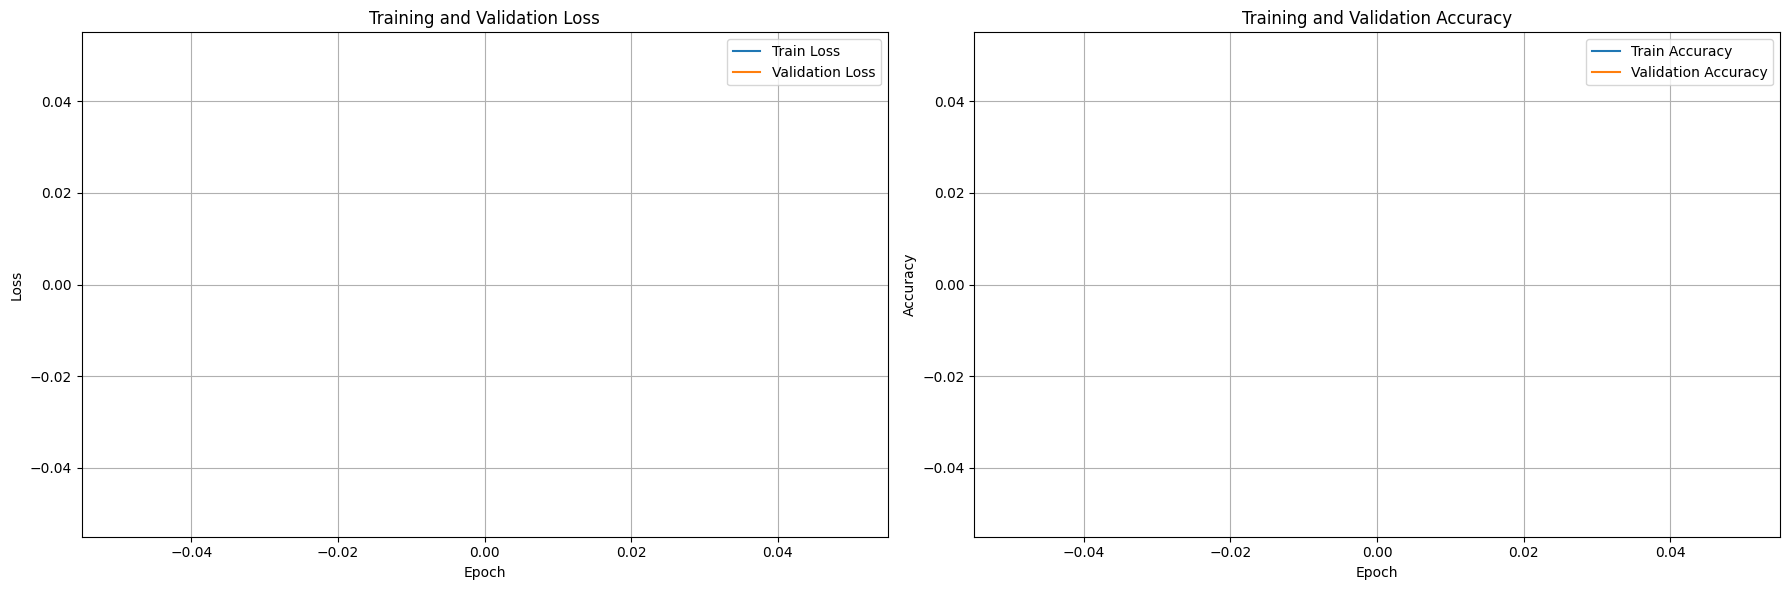

In [3]:
def main():
    # Configuration
    config_path = project_root / 'configs' / 'config.yaml'
    
    try:
        # Initialize trainer with config
        print("Initializing trainer...")
        trainer = Trainer(config_path=config_path)
        
        # Build model
        print("\nBuilding model...")
        model = trainer.build_model()
        trainer.model = model
        
        # Get data loaders
        print("\nPreparing data...")
        
        # First load the diagnostics to ensure data is properly loaded
        df = trainer.data_preprocessor.load_diagnostics()
        print("\nDataFrame loaded with columns:", df.columns.tolist())
        print("Sample data:")
        print(df[['Image', 'Left', 'Right', 'combined_label']].head())
        
        # Create datasets
        print("\nCreating datasets...")
        train_loader, val_loader, _ = trainer.data_preprocessor.create_datasets()
        
        # Print dataset information
        print(f"\nTraining samples: {len(train_loader.dataset)}")
        print(f"Validation samples: {len(val_loader.dataset)}")
        
        # Set batch size
        batch_size = trainer.config['training']['batch_size']
        train_loader = DataLoader(
            train_loader.dataset,
            batch_size=batch_size,
            shuffle=True,
            num_workers=trainer.config['hardware'].get('num_workers', 4),
            pin_memory=True,
            drop_last=True
        )
        val_loader = DataLoader(
            val_loader.dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=trainer.config['hardware'].get('num_workers', 4),
            pin_memory=True
        )
        
        # Initialize optimizer and scaler
        print("\nInitializing optimizer and scaler...")
        optimizer, scheduler = trainer.build_optimizer(model)
        
        # Use BCEWithLogitsLoss for binary classification
        # Note: Ensure your model outputs a single value per sample (not 2 values)
        criterion = nn.CrossEntropyLoss()
        scaler = torch.amp.GradScaler('cuda')
        
        # Update model's final layer for binary classification if needed
        if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Linear):
            if model.classifier.out_features != 1:  # If not already set for binary
                in_features = model.classifier.in_features
                model.classifier = nn.Linear(in_features, 1)
        
        # Start training
        print("\nStarting training...")
        num_epochs = trainer.config['training']['epochs']
        
        for epoch in range(num_epochs):
            # Train for one epoch
            train_loss, train_acc = trainer.train_epoch(
                model=model,
                train_loader=train_loader,
                criterion=criterion,
                optimizer=optimizer,
                scaler=scaler,
                epoch=epoch
            )
            
            # Validate
            val_loss, val_acc, val_metrics = trainer.validate_epoch(
                model=model,
                val_loader=val_loader,
                criterion=criterion,
                epoch=epoch
            )
            
            # Step the scheduler
            scheduler.step()
            
            # Print progress with binary classification metrics
            print(f"Epoch {epoch+1}/{num_epochs} - "
                  f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}% - "
                  f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")
        
        # Save final model
        final_model_path = os.path.join(trainer.config['output']['model_dir'], 'final_model.pth')
        torch.save({
            'model_state_dict': trainer.model.state_dict(),
            'config': trainer.config
        }, final_model_path)
        print(f"\nFinal model saved to: {final_model_path}")
        
        # Plot and save training history
        plot_path = os.path.join(trainer.config['output']['plot_dir'], 'training_history.png')
        TrainingMonitor.plot_training_history(trainer, save_path=plot_path)
        
    except Exception as e:
        print(f"\nError during training: {str(e)}")
        import traceback
        traceback.print_exc()
        raise

if __name__ == "__main__":
    main()